In [1]:
options(repr.matrix.max.cols=124, repr.matrix.max.rows=160)
options(repr.plot.width=18, repr.plot.height=7)
suppressMessages({
    library(tidyverse)
    library(readxl)
    library(cowplot)
    })

# Read in the Paragon semi-spatial TPM data

In [2]:
setwd("C:/Users/mjones/Documents/OneDrive - Norwich BioScience Institutes/PhD/code_and_data/11_Polonicum_NILs/2022_Data")

paragon_tpms <- read.csv("tpms_means_2022_data.csv")

paragon_tpms$X <- NULL

paragon_tpms <- paragon_tpms %>% select(!contains("PI.191837") & !contains("Classic"))

colnames(paragon_tpms) <- c("gene", "P5_EDR_B", "P5_EDR_C", "P8_EDR_B", "P8_EDR_C", 
                                    "P5_LDR_B", "P5_LDR_C", "P8_LDR_B", "P8_LDR_C",
                                    "P5_LP_B",  "P5_LP_C",  "P8_LP_B",  "P8_LP_C",
                                    "P5_LT_B",  "P5_LT_C",  "P8_LT_B",  "P8_LT_C",
                                    "P5_TS_B",  "P5_TS_C",  "P8_TS_B",  "P8_TS_C")

dim(paragon_tpms)
head(paragon_tpms)

[1] 269428     21

,gene,P5_EDR_B,P5_EDR_C,P8_EDR_B,P8_EDR_C,P5_LDR_B,P5_LDR_C,P8_LDR_B,P8_LDR_C,P5_LP_B,P5_LP_C,P8_LP_B,P8_LP_C,P5_LT_B,P5_LT_C,P8_LT_B,P8_LT_C,P5_TS_B,P5_TS_C,P8_TS_B,P8_TS_C
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TraesCS1A02G000100,0.62174025,0.5665898,0.3087720,0.48922975,0.5518455,0.6527072,0.4409515,0.5228432,0.44340633,0.6415070,0.55057200,0.55247683,0.2404175,0.20260833,0.33710625,0.10348650,0.35468243,0.3457533,0.3070964,0.40786600
2,TraesCS1A02G000100LC,306.89375000,282.8560000,256.8097500,298.10675000,197.0900000,233.1840000,212.7332500,195.5806750,185.18066667,190.7570000,215.98550000,195.86233333,162.6432250,124.46136667,134.89845000,105.14207500,122.14496667,170.3172500,156.9026750,199.04966667
3,TraesCS1A02G000200,17.23115000,24.9379237,25.6059800,15.49030725,10.9232325,15.6321300,9.6601825,12.7023550,7.14169000,10.6654867,19.31190000,11.96407333,3.8011775,2.57589667,7.48414000,4.89196250,8.46019667,11.3363010,9.9008842,13.44270667
4,TraesCS1A02G000200LC,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000
5,TraesCS1A02G000300,0.37591525,0.2289293,0.1824092,0.38642250,0.2993615,0.2720247,0.1953845,0.2167833,0.10203647,0.2234241,0.44854550,0.19692543,0.1313065,0.05756453,0.06251972,0.04478148,0.10039767,0.1673374,0.1477751,0.37948833
6,TraesCS1A02G000300LC,0.02434957,0.0000000,0.0000000,0.02193395,0.0235791,0.0000000,0.0000000,0.0000000,0.03102783,0.0000000,0.04732175,0.06651367,0.0000000,0.00000000,0.02141565,0.02314220,0.03128643,0.0000000,0.0000000,0.03138717


# Read in the VizGen panel
And then subset it according to Katie's new list of 200

In [23]:
setwd("C:/Users/mjones/Documents/OneDrive - Norwich BioScience Institutes/PhD/code_and_data/16_VizGen/Data")
panel <- read.table("VizGen_panel.tsv", header=TRUE, sep="\t")

cat("Number of genes in initial panel:")
nrow(panel)

subset200 <- read.table("subset_200_spikegenes_list.txt")
cat("Number of genes in subset200:")
nrow(subset200)
head(subset200)

panel_subset <- panel[panel$gene %in% subset200$V1, ]

cat("Number of genes in subsetted panel:")
dim(panel_subset)
head(panel_subset)

Number of genes in initial panel:

[1] 300

Number of genes in subset200:

[1] 200

,V1
,<chr>
1,TraesCS7D02G261600
2,TraesCS5A02G286800
3,TraesCS3A02G406500
4,TraesCS4D02G301100
5,TraesCS1A02G264300
6,TraesCS4D02G243700


Number of genes in subsetted panel:

[1] 200   6

,gene,target_tissue,control,TF,TF_family,TF_subfamily
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>
4,TraesCS1A02G052000,spike,FALSE,TRUE,HB,HB-WOX
6,TraesCS1A02G077800,spike,FALSE,FALSE,NA,NA
9,TraesCS1A02G154900,spike,FALSE,FALSE,NA,NA
10,TraesCS1A02G156100,spike,FALSE,FALSE,NA,NA
11,TraesCS1A02G199600,spike,FALSE,TRUE,MADS,MADS-MIKC
12,TraesCS1A02G241400,spike,FALSE,TRUE,SRS,SRS


# Reduce the TPM sets to just the 200 panel genes

In [24]:
paragon_panel <- merge(panel_subset, paragon_tpms)
dim(paragon_panel)
head(paragon_panel)

[1] 200  26

,gene,target_tissue,control,TF,TF_family,TF_subfamily,P5_EDR_B,P5_EDR_C,P8_EDR_B,P8_EDR_C,P5_LDR_B,P5_LDR_C,P8_LDR_B,P8_LDR_C,P5_LP_B,P5_LP_C,P8_LP_B,P8_LP_C,P5_LT_B,P5_LT_C,P8_LT_B,P8_LT_C,P5_TS_B,P5_TS_C,P8_TS_B,P8_TS_C
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TraesCS1A02G052000,spike,FALSE,TRUE,HB,HB-WOX,7.4836075,27.673650,9.753177,32.7230500,8.9229100,23.4169750,13.0057500,27.1025750,15.8157667,25.307967,18.7010500,21.8875667,4.583208,3.673740,5.536980,4.988720,10.488000,14.5882500,12.634440,15.284367
2,TraesCS1A02G077800,spike,FALSE,FALSE,NA,NA,11.8001950,12.885150,15.026000,16.8015000,17.9030500,17.2265500,19.2864500,17.4897000,19.7499667,12.739067,17.4713500,9.6031967,14.583950,12.151313,13.974325,12.999675,24.333100,11.1755650,17.257427,17.674333
3,TraesCS1A02G154900,spike,FALSE,FALSE,NA,NA,132.0794750,17.690740,89.625200,12.6443925,57.5463250,10.6661125,29.2635750,4.4582075,6.7788333,1.590907,6.2167300,0.9454463,1.773932,2.000357,1.270798,1.766593,33.437667,0.8985568,8.959146,1.261517
4,TraesCS1A02G156100,spike,FALSE,FALSE,NA,NA,0.2210243,0.119510,0.000000,0.1629259,0.1361771,0.1791249,0.1393919,0.4000948,0.4381663,0.467238,0.4769935,0.6804220,9.090917,7.761920,4.919668,6.867220,1.010916,1.4198730,1.308874,2.803910
5,TraesCS1A02G199600,spike,FALSE,TRUE,MADS,MADS-MIKC,6.9408725,8.639785,11.086298,11.1927175,10.8330725,12.5818300,16.6857825,17.2828500,23.2165867,22.561783,26.3782900,21.1782100,14.409387,11.110194,17.790545,8.840025,23.264357,16.7682300,25.712295,18.220757
6,TraesCS1A02G241400,spike,FALSE,TRUE,SRS,SRS,25.4563750,44.865275,30.287625,45.6005500,23.6924750,35.0587250,26.8969750,33.2744750,21.6984000,18.720000,17.8400500,14.5280667,9.306305,8.920720,9.071203,9.730755,15.887200,13.0342750,15.268825,16.862600


# Set colour scheme and factor levels

In [25]:
### Set colours
colours <- c("palevioletred", "#57A757", "#FFCF55")

### Set factor levels
paragon_panel$target_tissue <- factor(paragon_panel$target_tissue, levels = c("control", "spike", "grain"))

# Loop through all regions

In [ ]:
regions <- c("ROI_1B", "ROI_1C","ROI_2B", "ROI_2C", "ROI_3B", "ROI_3C", 
                "ROI_4B", "ROI_4C", "ROI_5B", "ROI_5C", "ROI_6B", "ROI_6C", 
                "ROI_7B", "ROI_7C", "ROI_8B", "ROI_8C", "ROI_9B", "ROI_9C", 
                "ROI_10B", "ROI_10C", "ROI_11B", "ROI_11C", "ROI_12B", "ROI_12C",
                "ROI_13B", "ROI_13C", "ROI_14B", "ROI_14C", "ROI_15B", "ROI_15C",
                "ROI_16B", "ROI_16C", "ROI_17B", "ROI_17C", "ROI_18B", "ROI_18C",
                "ROI_19B", "ROI_19C")

names <- 

# Testing ROI_1B and ROI_1C against LDR


	Pearson's product-moment correlation

data:  paragon_ROI_1B$P8_LDR_B and paragon_ROI_1B$count
t = 5.1958, df = 198, p-value = 5.05e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2181313 0.4628848
sample estimates:
      cor 
0.3463892 


Warning message in cor.test.default(paragon_ROI_1B$P8_LDR_B, paragon_ROI_1B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_1B$P8_LDR_B and paragon_ROI_1B$count
S = 363496, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7273709 



	Pearson's product-moment correlation

data:  paragon_ROI_1C$P8_LDR_C and paragon_ROI_1C$count
t = 4.8408, df = 198, p-value = 2.599e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1953873 0.4440109
sample estimates:
      cor 
0.3253098 


Warning message in cor.test.default(paragon_ROI_1C$P8_LDR_C, paragon_ROI_1C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_1C$P8_LDR_C and paragon_ROI_1C$count
S = 413494, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6898718 


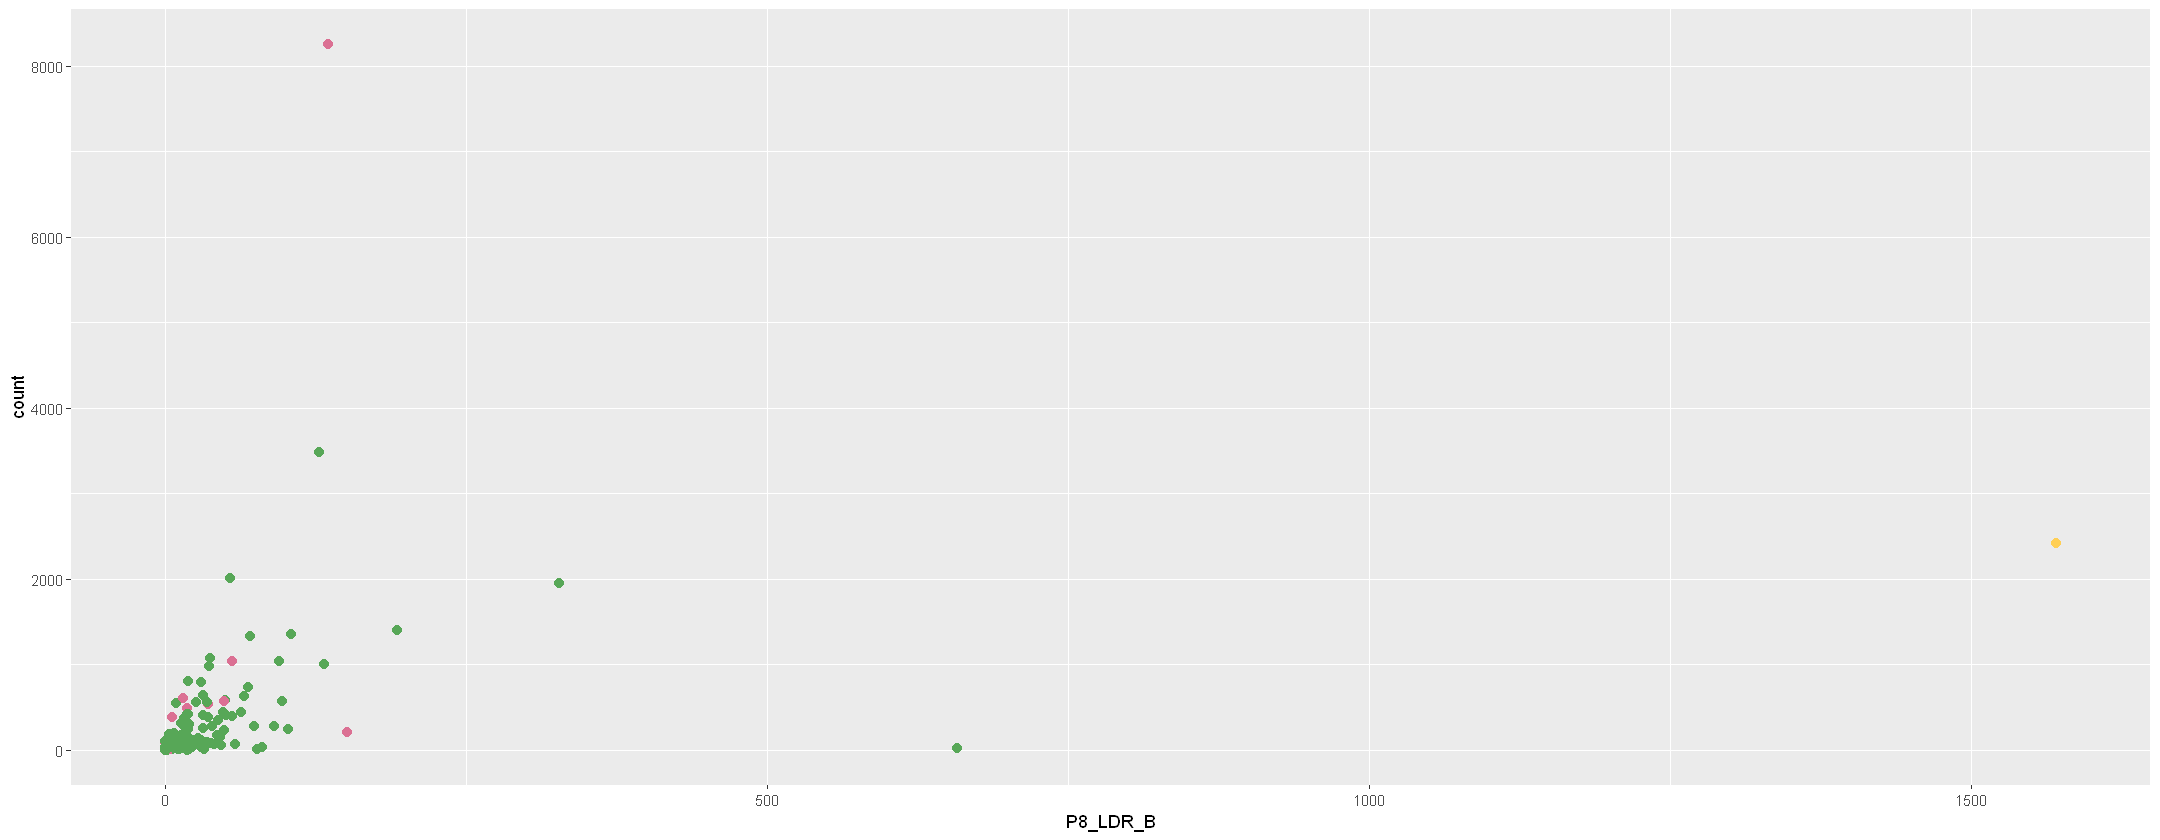

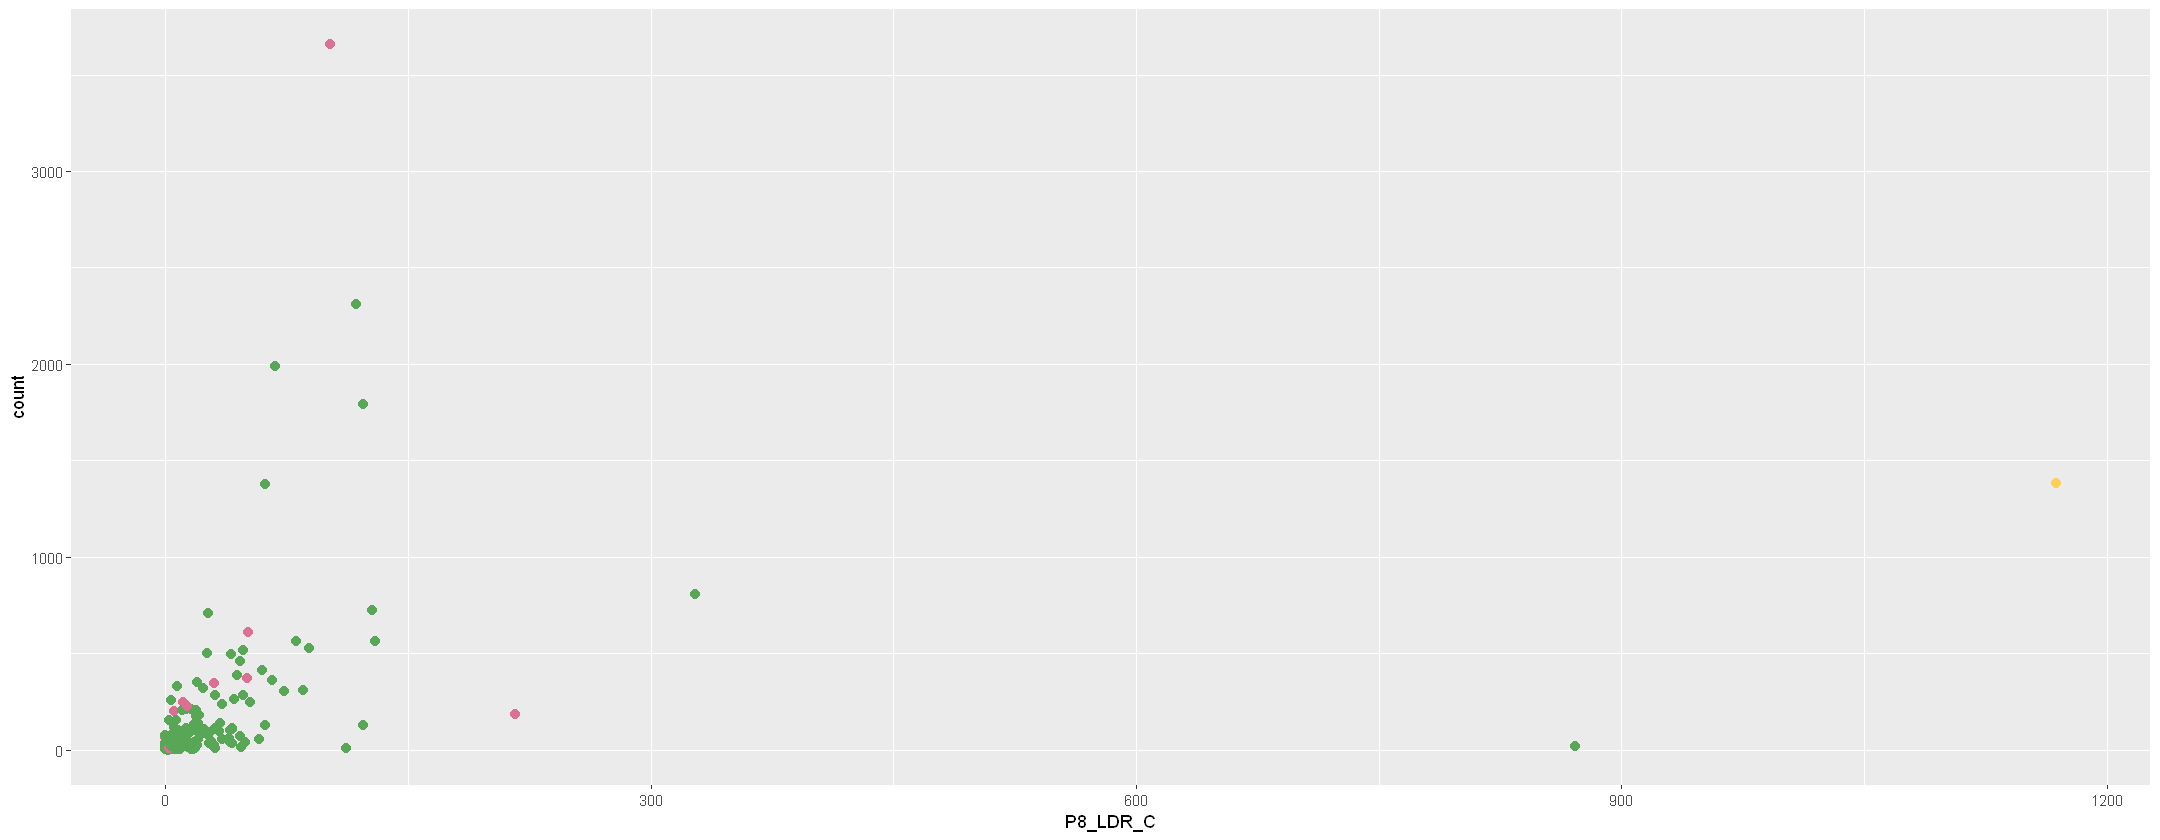

In [54]:
### Testing basal ROI
#####################

ROI_1B <- as.data.frame(t(read.csv("ROI_1B.csv", header=FALSE)))

ROI_1B <- ROI_1B[-1,]
colnames(ROI_1B) <- c("gene", "count")
rownames(ROI_1B) <- NULL
ROI_1B$count <- as.numeric(ROI_1B$count)

paragon_ROI_1B <- merge(paragon_panel, ROI_1B)

cor.test(paragon_ROI_1B$P8_LDR_B, paragon_ROI_1B$count)
cor.test(paragon_ROI_1B$P8_LDR_B, paragon_ROI_1B$count, method="spearman")

ggplot(paragon_ROI_1B, aes(x=P8_LDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_1C <- as.data.frame(t(read.csv("ROI_1C.csv", header=FALSE)))

ROI_1C <- ROI_1C[-1,]
colnames(ROI_1C) <- c("gene", "count")
rownames(ROI_1C) <- NULL
ROI_1C$count <- as.numeric(ROI_1C$count)

paragon_ROI_1C <- merge(paragon_panel, ROI_1C)

cor.test(paragon_ROI_1C$P8_LDR_C, paragon_ROI_1C$count)
cor.test(paragon_ROI_1C$P8_LDR_C, paragon_ROI_1C$count, method="spearman")

ggplot(paragon_ROI_1C, aes(x=P8_LDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_2B and 2C against LDR


	Pearson's product-moment correlation

data:  paragon_ROI_2B$P8_LDR_B and paragon_ROI_2B$count
t = 3.1736, df = 198, p-value = 0.001746
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08382732 0.34812431
sample estimates:
      cor 
0.2200096 


Warning message in cor.test.default(paragon_ROI_2B$P8_LDR_B, paragon_ROI_2B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_2B$P8_LDR_B and paragon_ROI_2B$count
S = 433260, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6750469 



	Pearson's product-moment correlation

data:  paragon_ROI_2C$P8_LDR_C and paragon_ROI_2C$count
t = 3.3511, df = 198, p-value = 0.0009639
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09602007 0.35888034
sample estimates:
      cor 
0.2316747 


Warning message in cor.test.default(paragon_ROI_2C$P8_LDR_C, paragon_ROI_2C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_2C$P8_LDR_C and paragon_ROI_2C$count
S = 486857, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.634848 


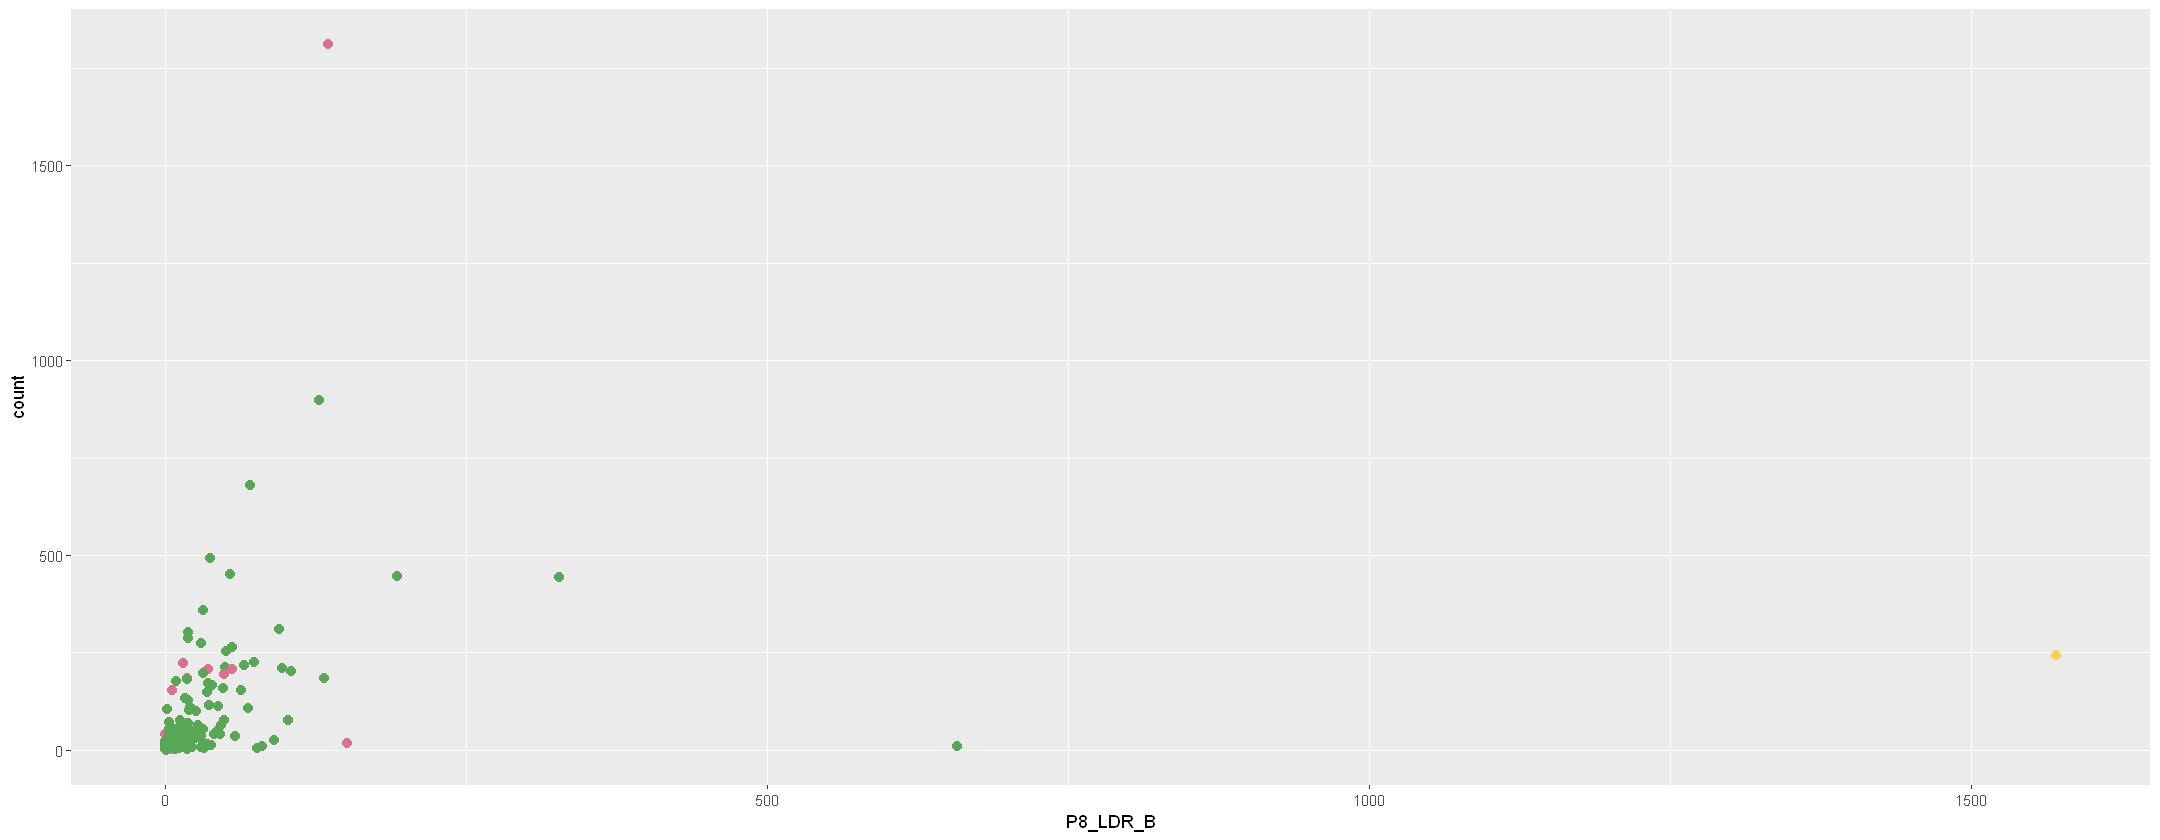

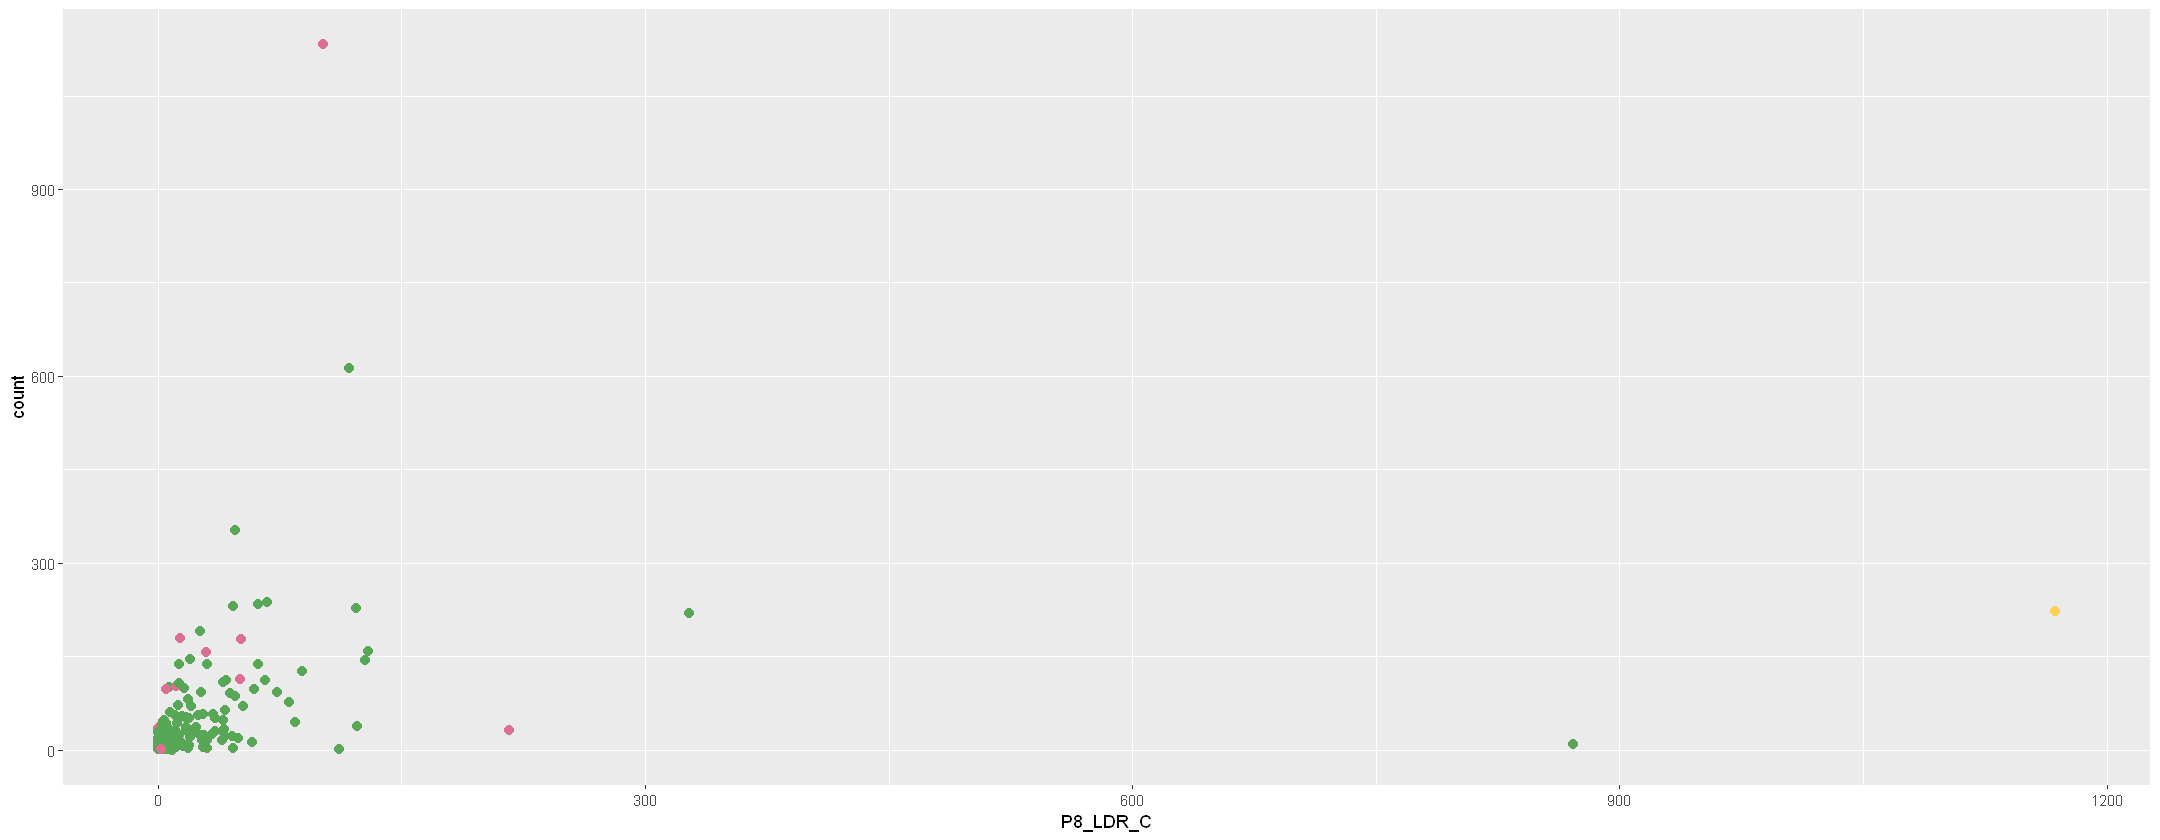

In [27]:
### Testing basal ROI
#####################

ROI_2B <- as.data.frame(t(read.csv("ROI_2B.csv", header=FALSE)))

ROI_2B <- ROI_2B[-1,]
colnames(ROI_2B) <- c("gene", "count")
rownames(ROI_2B) <- NULL
ROI_2B$count <- as.numeric(ROI_2B$count)

paragon_ROI_2B <- merge(paragon_panel, ROI_2B)

# dim(paragon_ROI_2B)
# head(paragon_ROI_2B)

cor.test(paragon_ROI_2B$P8_LDR_B, paragon_ROI_2B$count)
cor.test(paragon_ROI_2B$P8_LDR_B, paragon_ROI_2B$count, method="spearman")

ggplot(paragon_ROI_2B, aes(x=P8_LDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_2C <- as.data.frame(t(read.csv("ROI_2C.csv", header=FALSE)))

ROI_2C <- ROI_2C[-1,]
colnames(ROI_2C) <- c("gene", "count")
rownames(ROI_2C) <- NULL
ROI_2C$count <- as.numeric(ROI_2C$count)

paragon_ROI_2C <- merge(paragon_panel, ROI_2C)

# dim(paragon_ROI_2C)
# head(paragon_ROI_2C)

cor.test(paragon_ROI_2C$P8_LDR_C, paragon_ROI_2C$count)
cor.test(paragon_ROI_2C$P8_LDR_C, paragon_ROI_2C$count, method="spearman")

ggplot(paragon_ROI_2C, aes(x=P8_LDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_2B and 2C against EDR
(To see whether EDR fits these samples better than LDR... no real difference in strength of correlations though, suggests intermediate between EDR and LDR?)


	Pearson's product-moment correlation

data:  paragon_ROI_2B$P8_EDR_B and paragon_ROI_2B$count
t = 2.9222, df = 198, p-value = 0.00388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06646607 0.33268777
sample estimates:
     cor 
0.203332 


Warning message in cor.test.default(paragon_ROI_2B$P8_EDR_B, paragon_ROI_2B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_2B$P8_EDR_B and paragon_ROI_2B$count
S = 449839, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6626121 



	Pearson's product-moment correlation

data:  paragon_ROI_2C$P8_EDR_C and paragon_ROI_2C$count
t = 3.4635, df = 198, p-value = 0.0006535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1037011 0.3656207
sample estimates:
      cor 
0.2390035 


Warning message in cor.test.default(paragon_ROI_2C$P8_EDR_C, paragon_ROI_2C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_2C$P8_EDR_C and paragon_ROI_2C$count
S = 472346, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6457319 


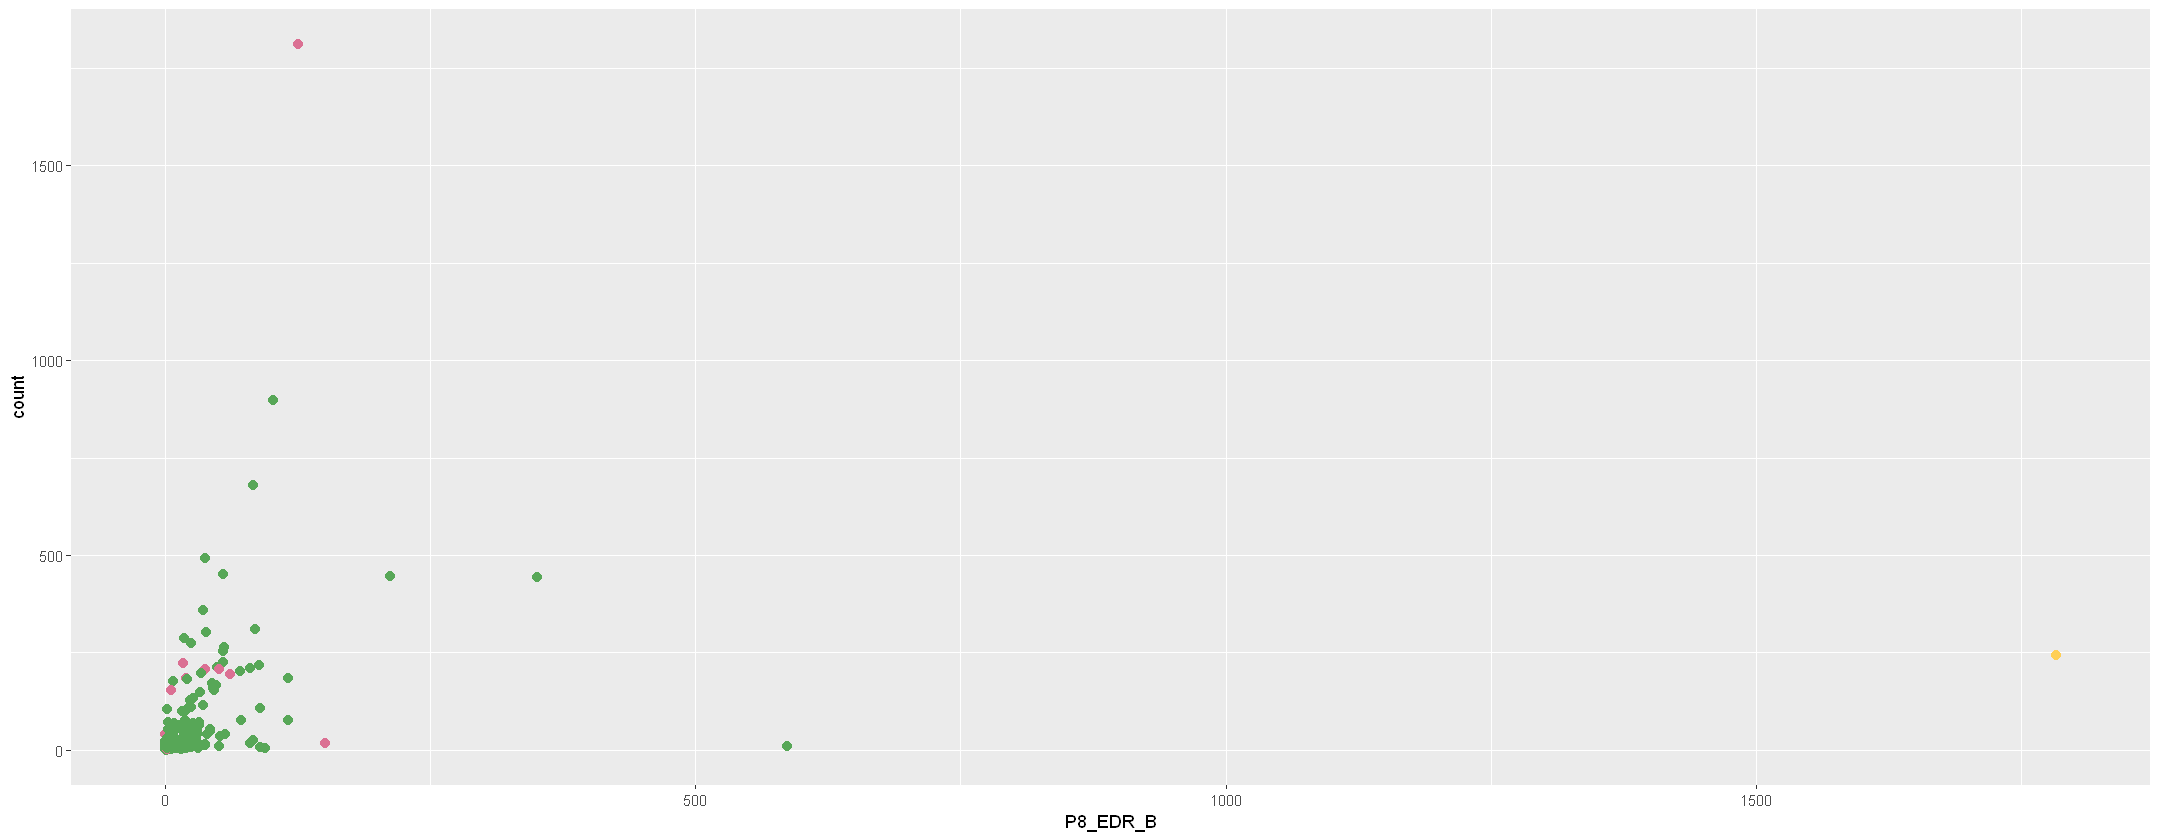

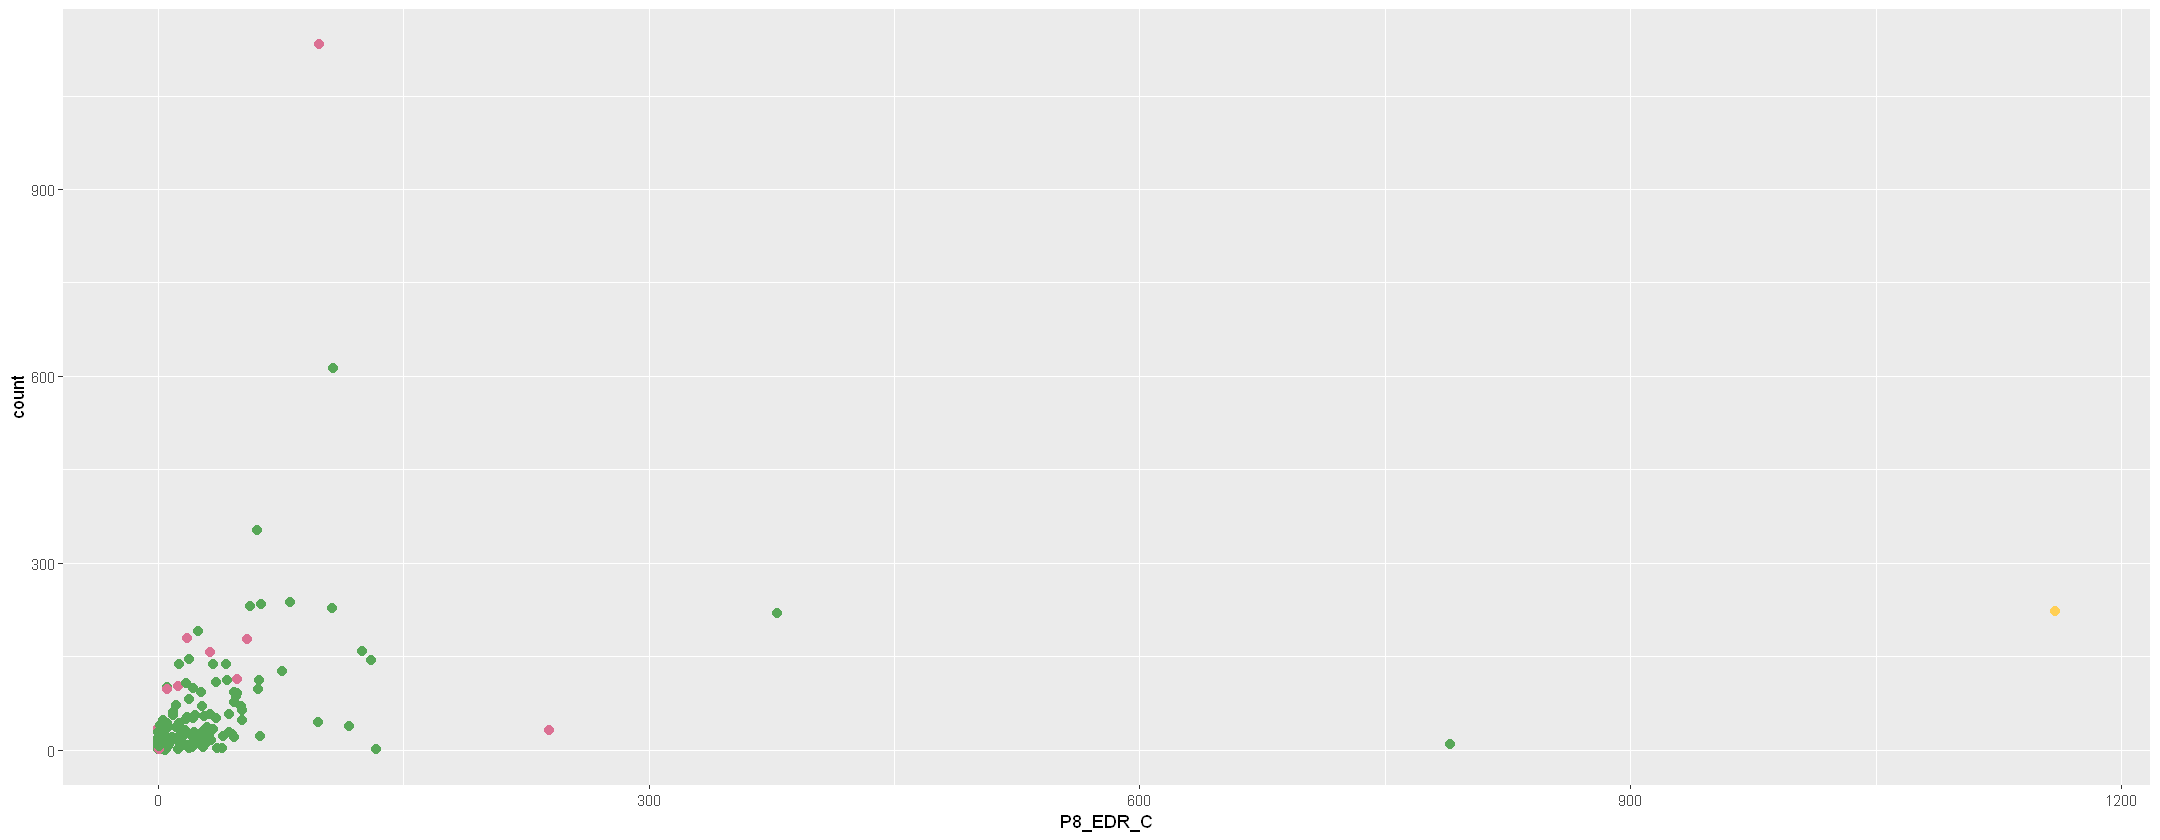

In [28]:
### Testing basal ROI
#####################

ROI_2B <- as.data.frame(t(read.csv("ROI_2B.csv", header=FALSE)))

ROI_2B <- ROI_2B[-1,]
colnames(ROI_2B) <- c("gene", "count")
rownames(ROI_2B) <- NULL
ROI_2B$count <- as.numeric(ROI_2B$count)

paragon_ROI_2B <- merge(paragon_panel, ROI_2B)

# dim(paragon_ROI_2B)
# head(paragon_ROI_2B)

cor.test(paragon_ROI_2B$P8_EDR_B, paragon_ROI_2B$count)
cor.test(paragon_ROI_2B$P8_EDR_B, paragon_ROI_2B$count, method="spearman")

ggplot(paragon_ROI_2B, aes(x=P8_EDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_2C <- as.data.frame(t(read.csv("ROI_2C.csv", header=FALSE)))

ROI_2C <- ROI_2C[-1,]
colnames(ROI_2C) <- c("gene", "count")
rownames(ROI_2C) <- NULL
ROI_2C$count <- as.numeric(ROI_2C$count)

paragon_ROI_2C <- merge(paragon_panel, ROI_2C)

# dim(paragon_ROI_2C)
# head(paragon_ROI_2C)

cor.test(paragon_ROI_2C$P8_EDR_C, paragon_ROI_2C$count)
cor.test(paragon_ROI_2C$P8_EDR_C, paragon_ROI_2C$count, method="spearman")

ggplot(paragon_ROI_2C, aes(x=P8_EDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_3


	Pearson's product-moment correlation

data:  paragon_ROI_3B$P8_EDR_B and paragon_ROI_3B$count
t = 3.4569, df = 198, p-value = 0.0006688
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1032516 0.3652269
sample estimates:
     cor 
0.238575 


Warning message in cor.test.default(paragon_ROI_3B$P8_EDR_B, paragon_ROI_3B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_3B$P8_EDR_B and paragon_ROI_3B$count
S = 462104, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.653413 



	Pearson's product-moment correlation

data:  paragon_ROI_3C$P8_EDR_C and paragon_ROI_3C$count
t = 5.0992, df = 198, p-value = 7.952e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2119805 0.4578024
sample estimates:
      cor 
0.3407013 


Warning message in cor.test.default(paragon_ROI_3C$P8_EDR_C, paragon_ROI_3C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_3C$P8_EDR_C and paragon_ROI_3C$count
S = 466038, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6504627 


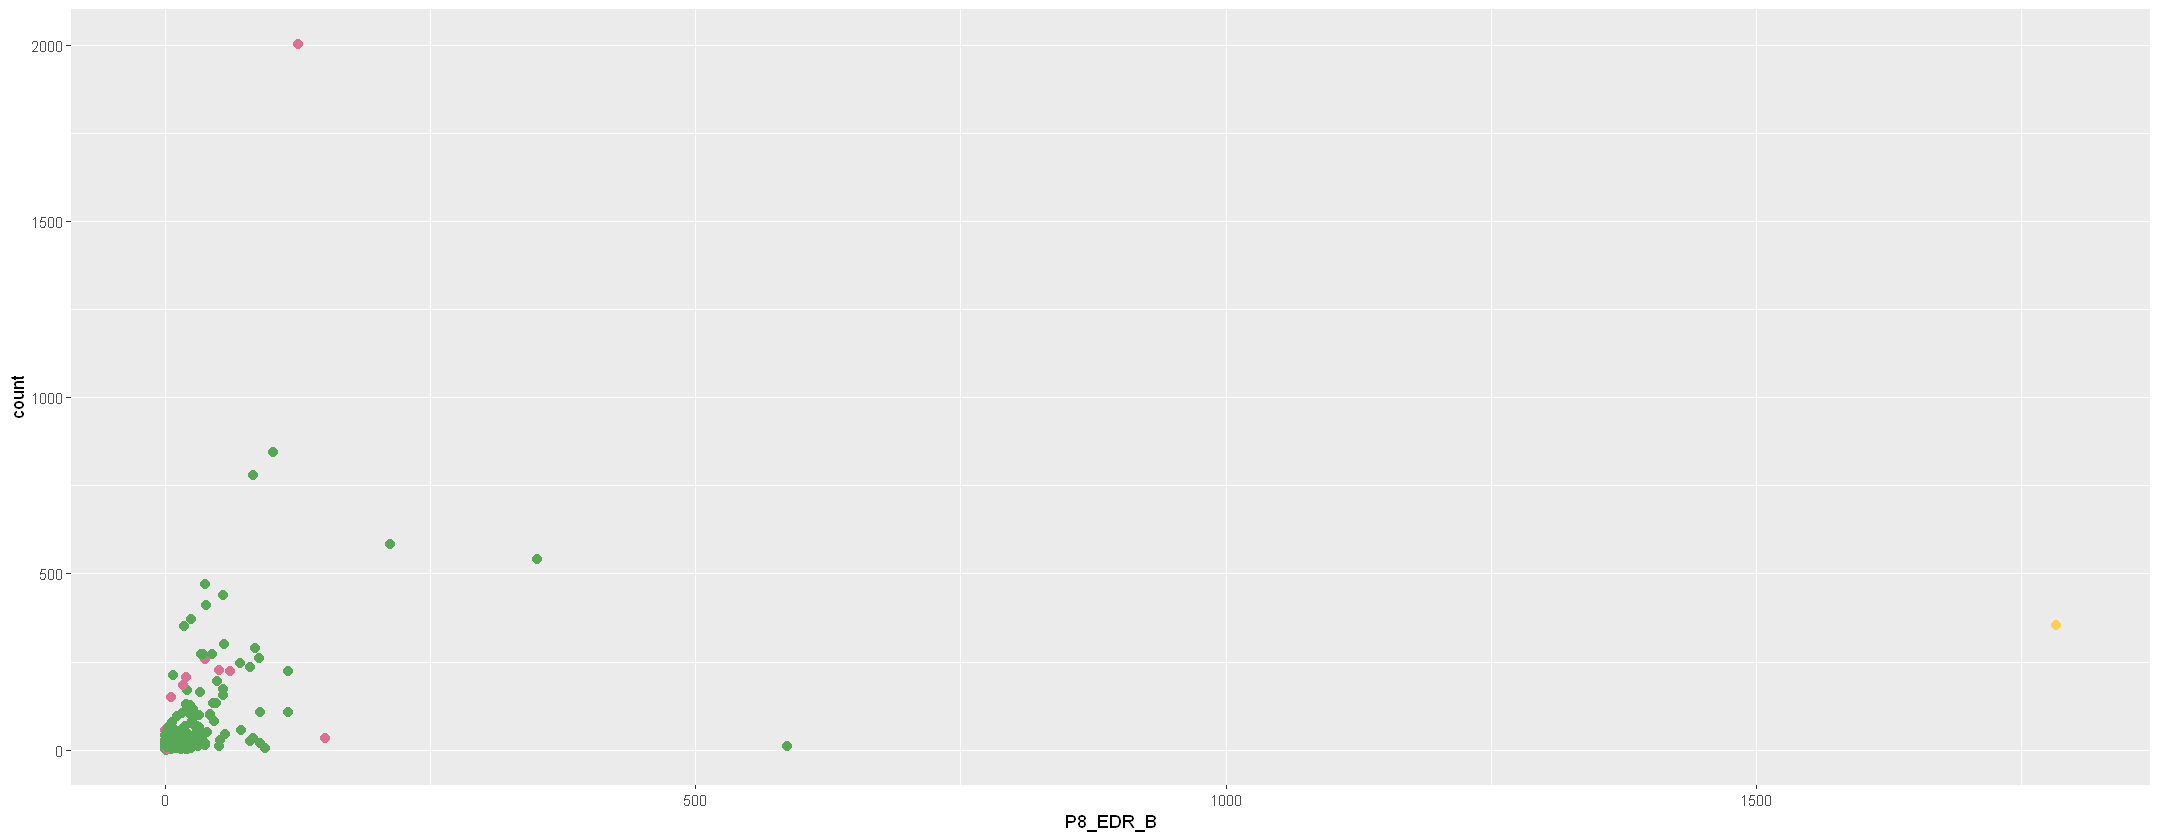

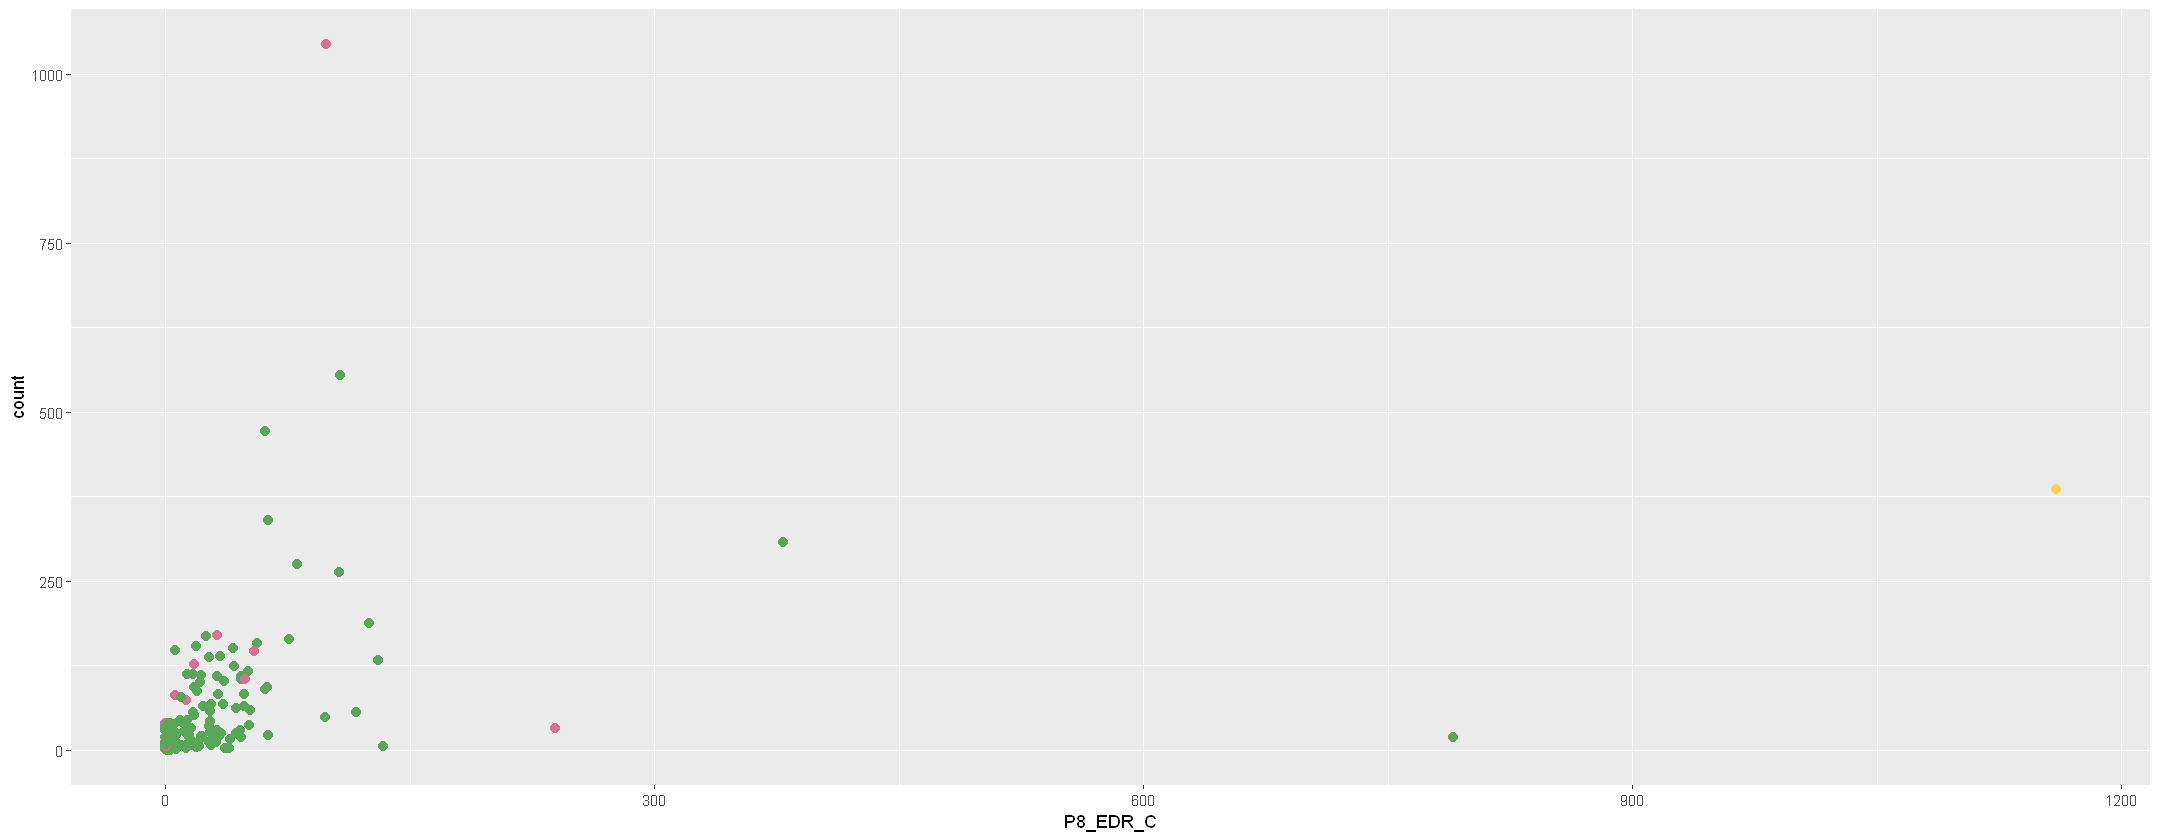

In [29]:
### Testing basal ROI
#####################

ROI_3B <- as.data.frame(t(read.csv("ROI_3B.csv", header=FALSE)))

ROI_3B <- ROI_3B[-1,]
colnames(ROI_3B) <- c("gene", "count")
rownames(ROI_3B) <- NULL
ROI_3B$count <- as.numeric(ROI_3B$count)

paragon_ROI_3B <- merge(paragon_panel, ROI_3B)

# dim(paragon_ROI_3B)
# head(paragon_ROI_3B)

cor.test(paragon_ROI_3B$P8_EDR_B, paragon_ROI_3B$count)
cor.test(paragon_ROI_3B$P8_EDR_B, paragon_ROI_3B$count, method="spearman")

ggplot(paragon_ROI_3B, aes(x=P8_EDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_3C <- as.data.frame(t(read.csv("ROI_3C.csv", header=FALSE)))

ROI_3C <- ROI_3C[-1,]
colnames(ROI_3C) <- c("gene", "count")
rownames(ROI_3C) <- NULL
ROI_3C$count <- as.numeric(ROI_3C$count)

paragon_ROI_3C <- merge(paragon_panel, ROI_3C)

# dim(paragon_ROI_3C)
# head(paragon_ROI_3C)

cor.test(paragon_ROI_3C$P8_EDR_C, paragon_ROI_3C$count)
cor.test(paragon_ROI_3C$P8_EDR_C, paragon_ROI_3C$count, method="spearman")

ggplot(paragon_ROI_3C, aes(x=P8_EDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_4


	Pearson's product-moment correlation

data:  paragon_ROI_4B$P8_EDR_B and paragon_ROI_4B$count
t = 2.3273, df = 198, p-value = 0.02096
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02500407 0.29523599
sample estimates:
     cor 
0.163179 


Warning message in cor.test.default(paragon_ROI_4B$P8_EDR_B, paragon_ROI_4B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_4B$P8_EDR_B and paragon_ROI_4B$count
S = 477259, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6420465 



	Pearson's product-moment correlation

data:  paragon_ROI_4C$P8_EDR_C and paragon_ROI_4C$count
t = 3.2755, df = 198, p-value = 0.001245
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09083159 0.35431175
sample estimates:
      cor 
0.2267155 


Warning message in cor.test.default(paragon_ROI_4C$P8_EDR_C, paragon_ROI_4C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_4C$P8_EDR_C and paragon_ROI_4C$count
S = 491291, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6315229 


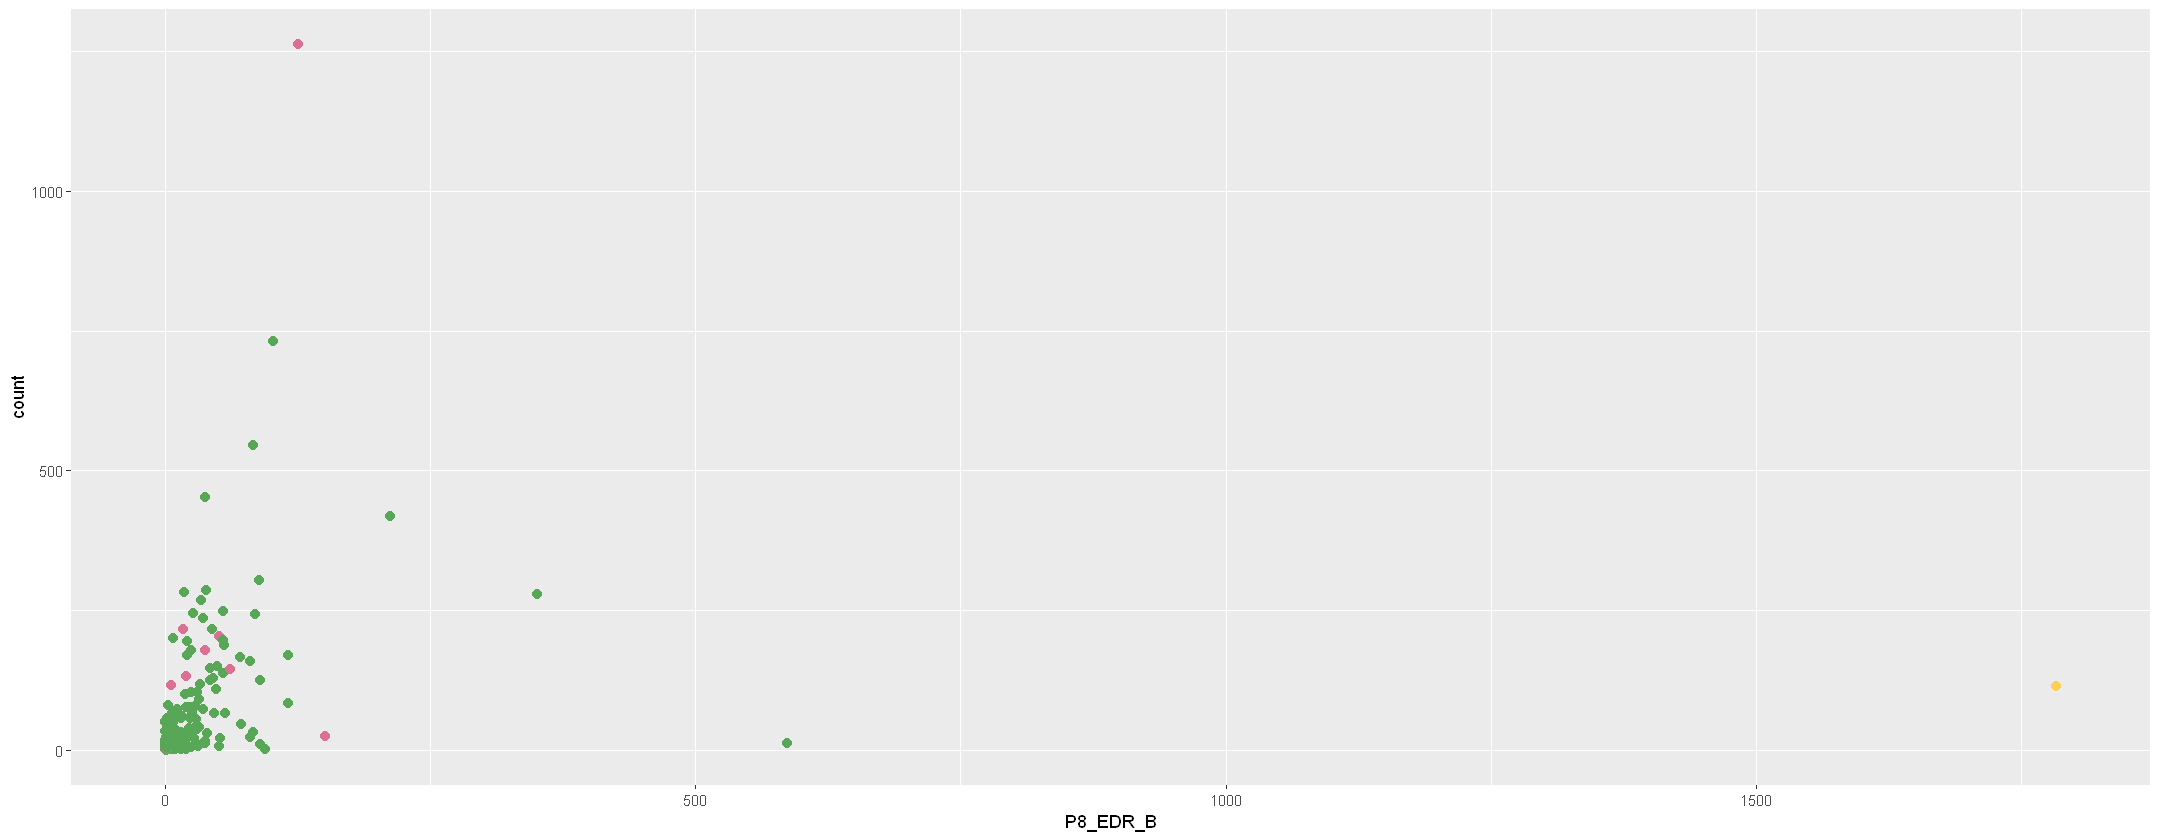

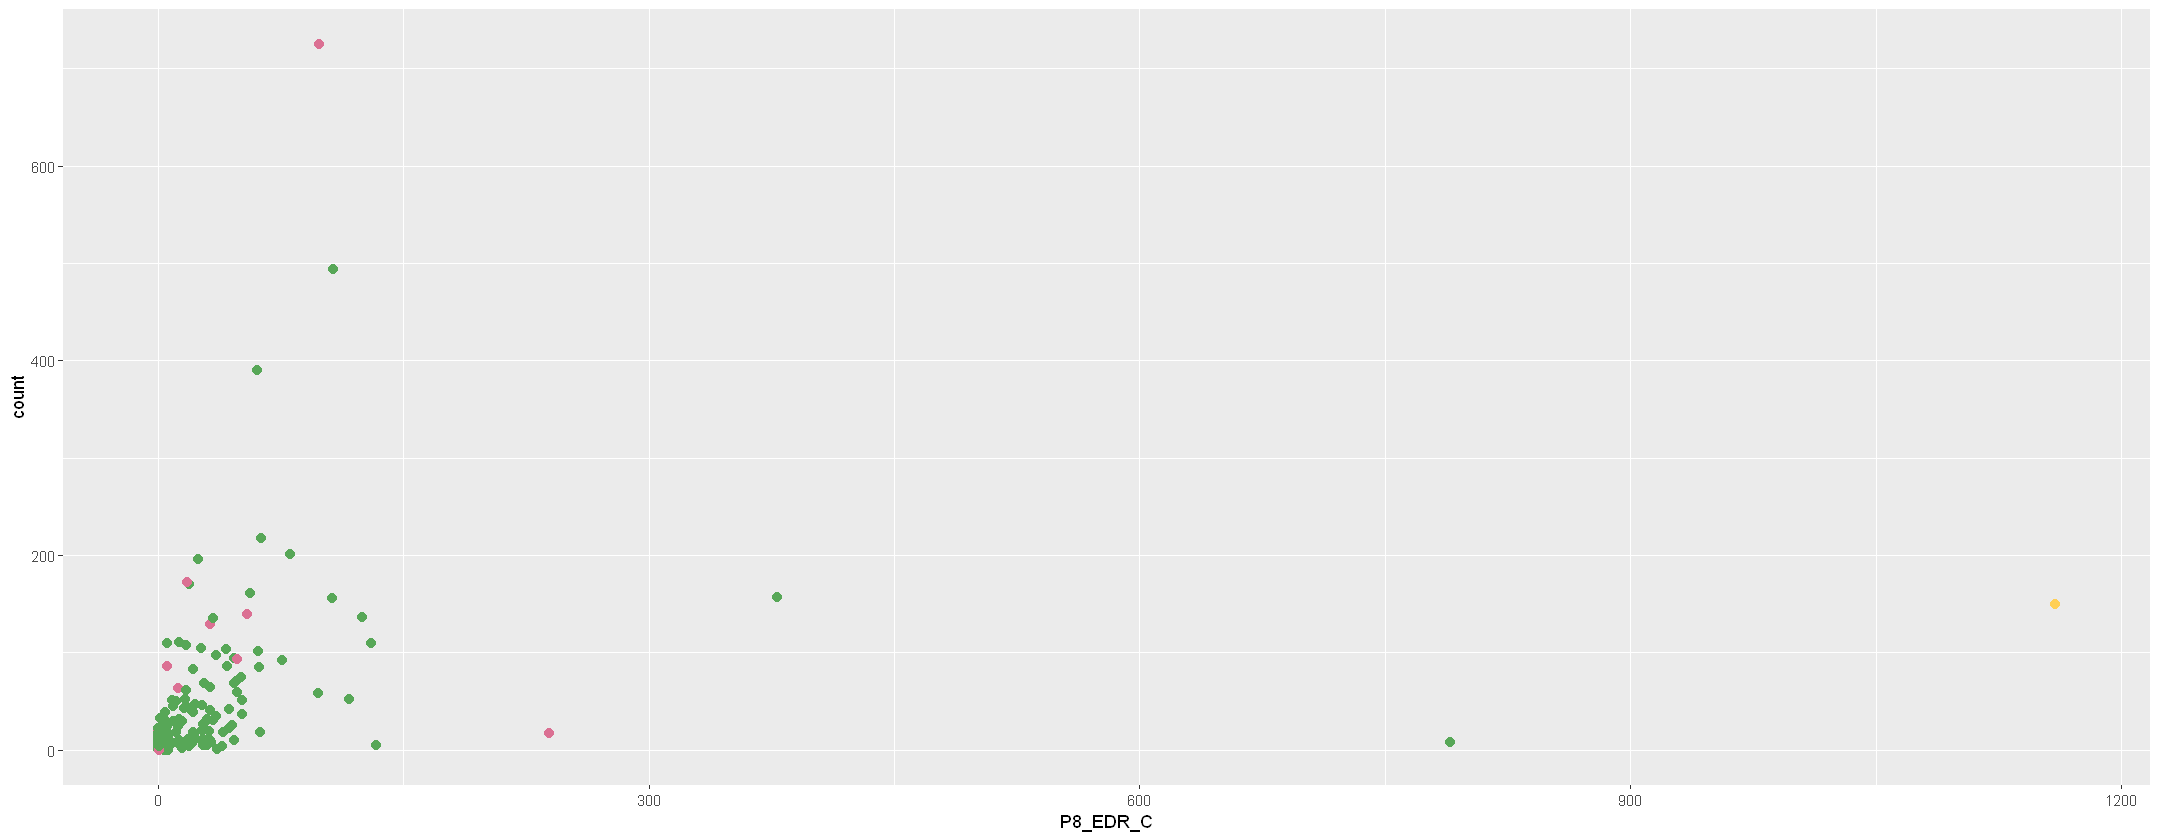

In [30]:
### Testing basal ROI
#####################

ROI_4B <- as.data.frame(t(read.csv("ROI_4B.csv", header=FALSE)))

ROI_4B <- ROI_4B[-1,]
colnames(ROI_4B) <- c("gene", "count")
rownames(ROI_4B) <- NULL
ROI_4B$count <- as.numeric(ROI_4B$count)

paragon_ROI_4B <- merge(paragon_panel, ROI_4B)

# dim(paragon_ROI_4B)
# head(paragon_ROI_4B)

cor.test(paragon_ROI_4B$P8_EDR_B, paragon_ROI_4B$count)
cor.test(paragon_ROI_4B$P8_EDR_B, paragon_ROI_4B$count, method="spearman")

ggplot(paragon_ROI_4B, aes(x=P8_EDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_4C <- as.data.frame(t(read.csv("ROI_4C.csv", header=FALSE)))

ROI_4C <- ROI_4C[-1,]
colnames(ROI_4C) <- c("gene", "count")
rownames(ROI_4C) <- NULL
ROI_4C$count <- as.numeric(ROI_4C$count)

paragon_ROI_4C <- merge(paragon_panel, ROI_4C)

# dim(paragon_ROI_4C)
# head(paragon_ROI_4C)

cor.test(paragon_ROI_4C$P8_EDR_C, paragon_ROI_4C$count)
cor.test(paragon_ROI_4C$P8_EDR_C, paragon_ROI_4C$count, method="spearman")

ggplot(paragon_ROI_4C, aes(x=P8_EDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_5


	Pearson's product-moment correlation

data:  paragon_ROI_5B$P8_LP_B and paragon_ROI_5B$count
t = 5.2552, df = 198, p-value = 3.808e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2218994 0.4659905
sample estimates:
      cor 
0.3498692 


Warning message in cor.test.default(paragon_ROI_5B$P8_LP_B, paragon_ROI_5B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_5B$P8_LP_B and paragon_ROI_5B$count
S = 449372, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6629627 



	Pearson's product-moment correlation

data:  paragon_ROI_5C$P8_LP_C and paragon_ROI_5C$count
t = 3.2784, df = 198, p-value = 0.001233
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09103427 0.35449046
sample estimates:
      cor 
0.2269094 


Warning message in cor.test.default(paragon_ROI_5C$P8_LP_C, paragon_ROI_5C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_5C$P8_LP_C and paragon_ROI_5C$count
S = 454780, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6589067 


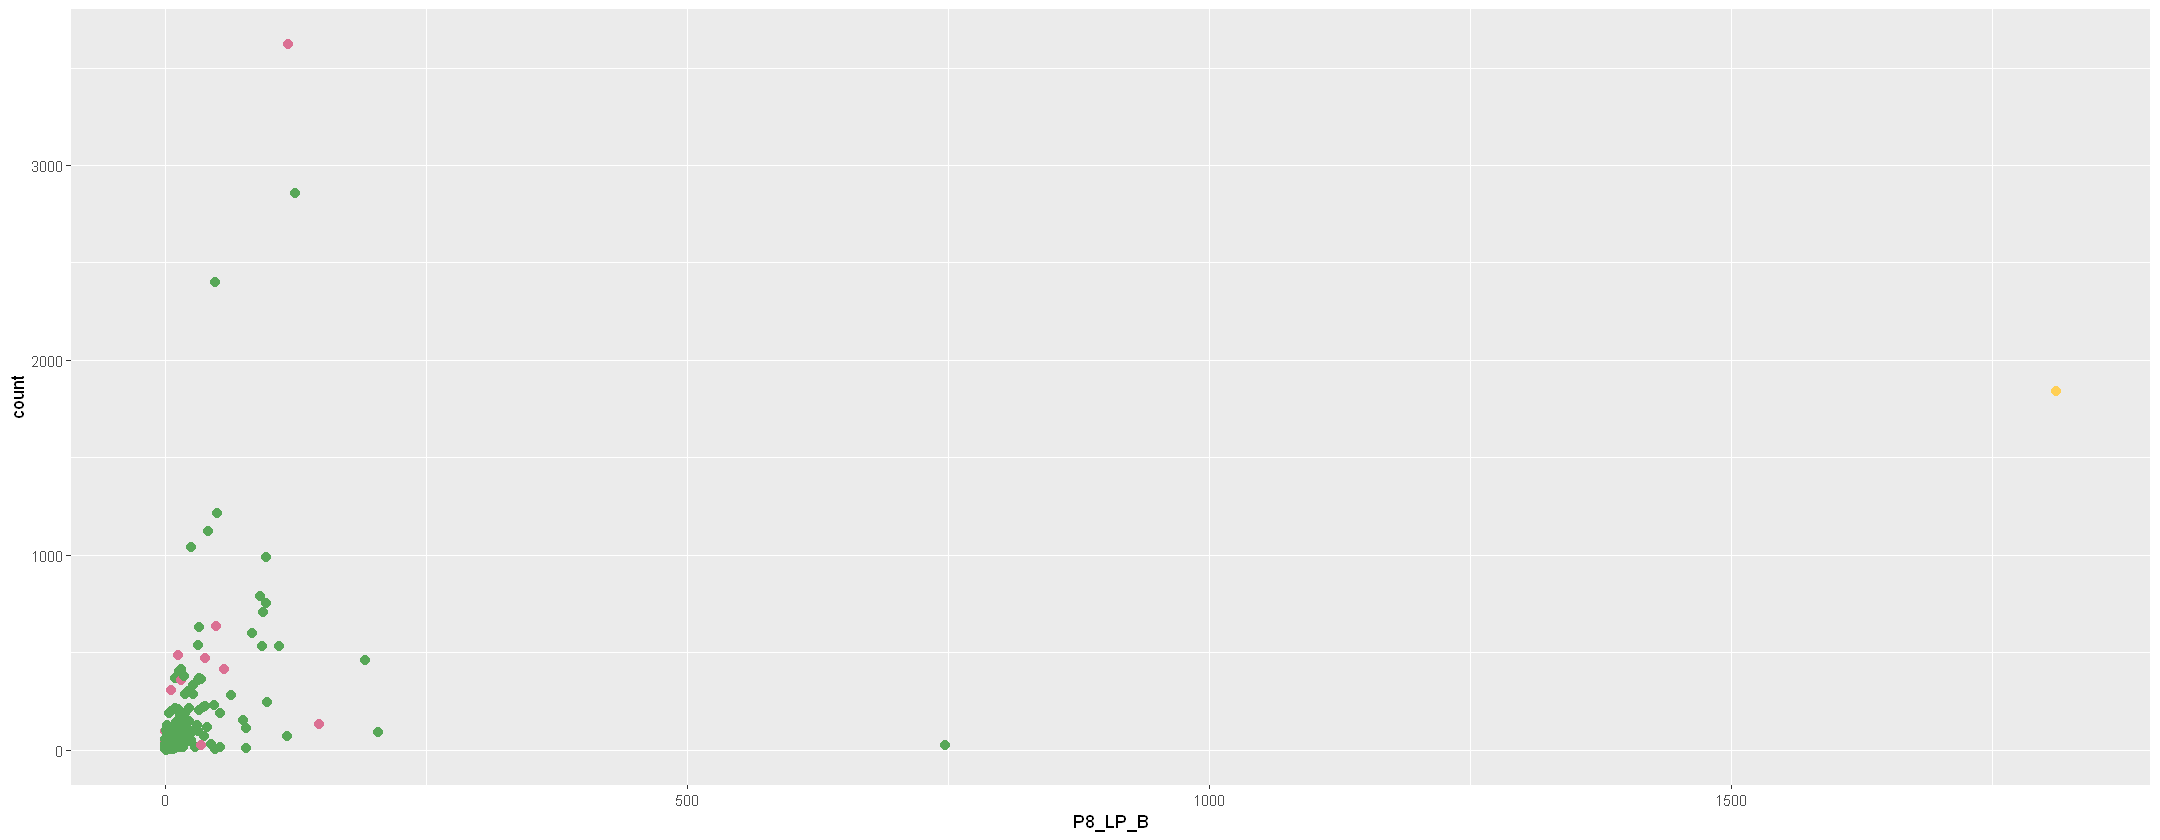

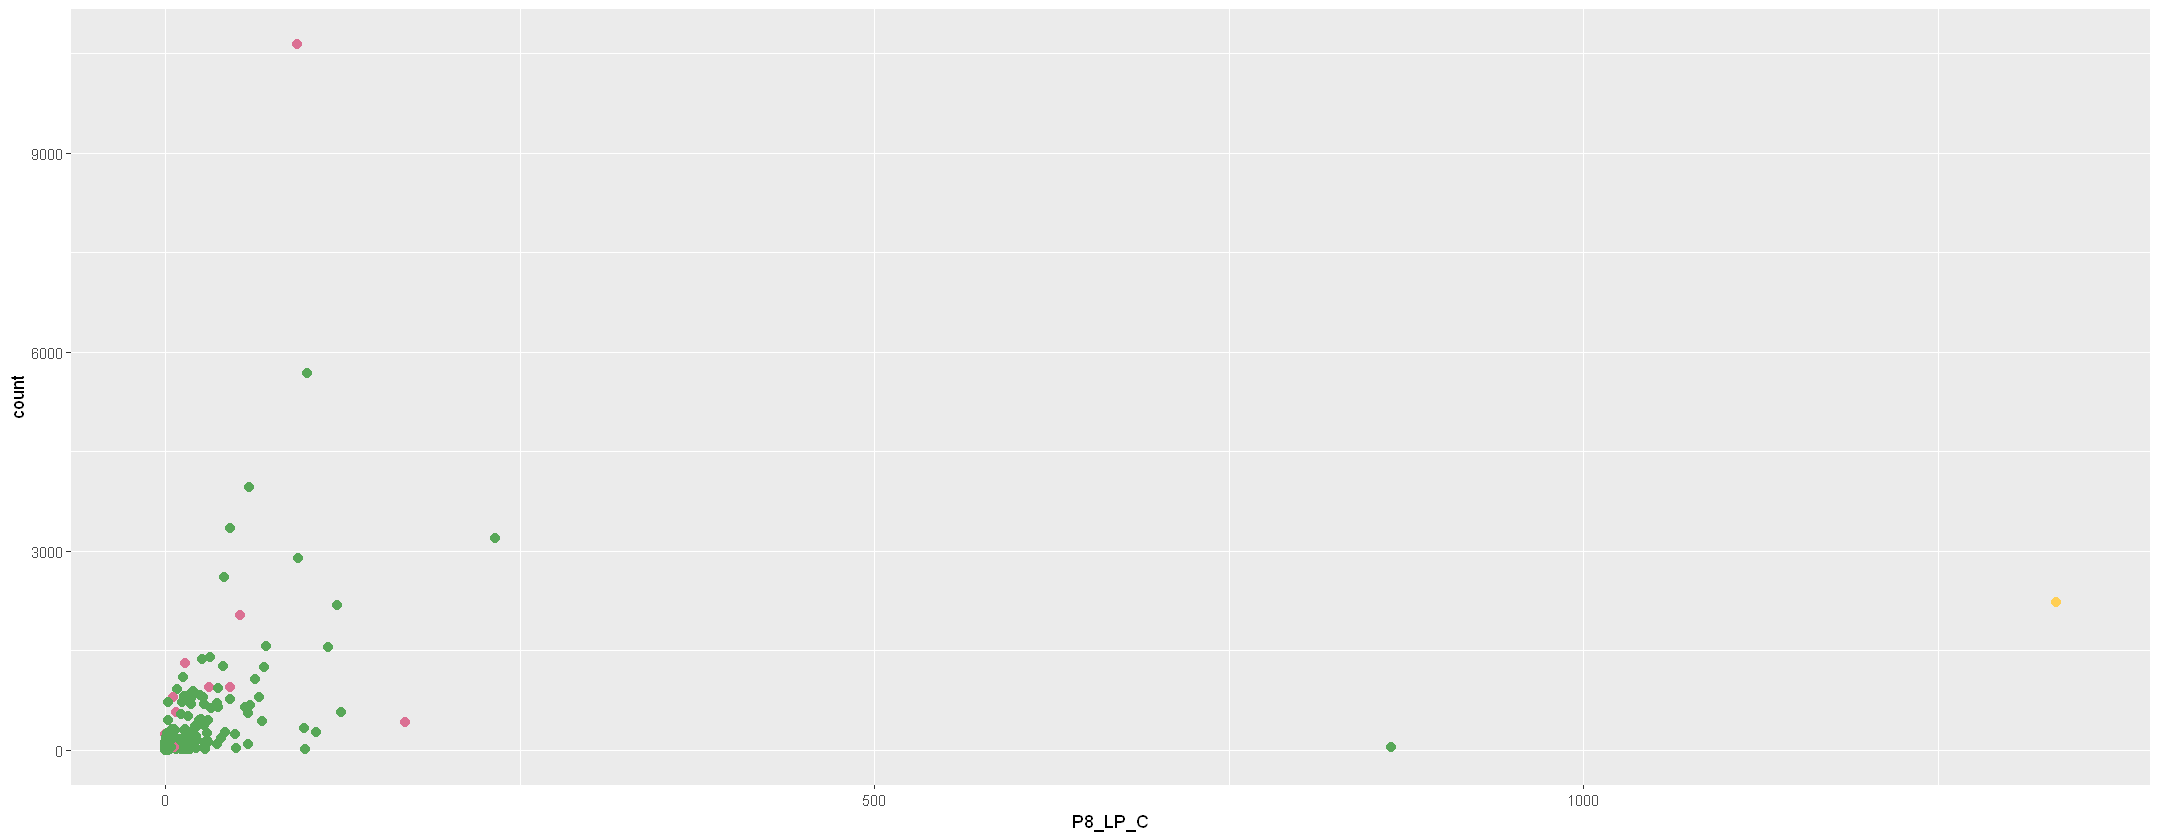

In [31]:
### Testing basal ROI
#####################

ROI_5B <- as.data.frame(t(read.csv("ROI_5B.csv", header=FALSE)))

ROI_5B <- ROI_5B[-1,]
colnames(ROI_5B) <- c("gene", "count")
rownames(ROI_5B) <- NULL
ROI_5B$count <- as.numeric(ROI_5B$count)

paragon_ROI_5B <- merge(paragon_panel, ROI_5B)

# dim(paragon_ROI_5B)
# head(paragon_ROI_5B)

cor.test(paragon_ROI_5B$P8_LP_B, paragon_ROI_5B$count)
cor.test(paragon_ROI_5B$P8_LP_B, paragon_ROI_5B$count, method="spearman")

ggplot(paragon_ROI_5B, aes(x=P8_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_5C <- as.data.frame(t(read.csv("ROI_5C.csv", header=FALSE)))

ROI_5C <- ROI_5C[-1,]
colnames(ROI_5C) <- c("gene", "count")
rownames(ROI_5C) <- NULL
ROI_5C$count <- as.numeric(ROI_5C$count)

paragon_ROI_5C <- merge(paragon_panel, ROI_5C)

# dim(paragon_ROI_5C)
# head(paragon_ROI_5C)

cor.test(paragon_ROI_5C$P8_LP_C, paragon_ROI_5C$count)
cor.test(paragon_ROI_5C$P8_LP_C, paragon_ROI_5C$count, method="spearman")

ggplot(paragon_ROI_5C, aes(x=P8_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_6


	Pearson's product-moment correlation

data:  paragon_ROI_6B$P8_LP_B and paragon_ROI_6B$count
t = 4.2893, df = 198, p-value = 2.801e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1592816 0.4135887
sample estimates:
     cor 
0.291579 


Warning message in cor.test.default(paragon_ROI_6B$P8_LP_B, paragon_ROI_6B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_6B$P8_LP_B and paragon_ROI_6B$count
S = 425911, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6805584 



	Pearson's product-moment correlation

data:  paragon_ROI_6C$P8_LP_C and paragon_ROI_6C$count
t = 3.5401, df = 198, p-value = 0.0004985
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1089282 0.3701919
sample estimates:
     cor 
0.243982 


Warning message in cor.test.default(paragon_ROI_6C$P8_LP_C, paragon_ROI_6C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_6C$P8_LP_C and paragon_ROI_6C$count
S = 411824, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6911246 


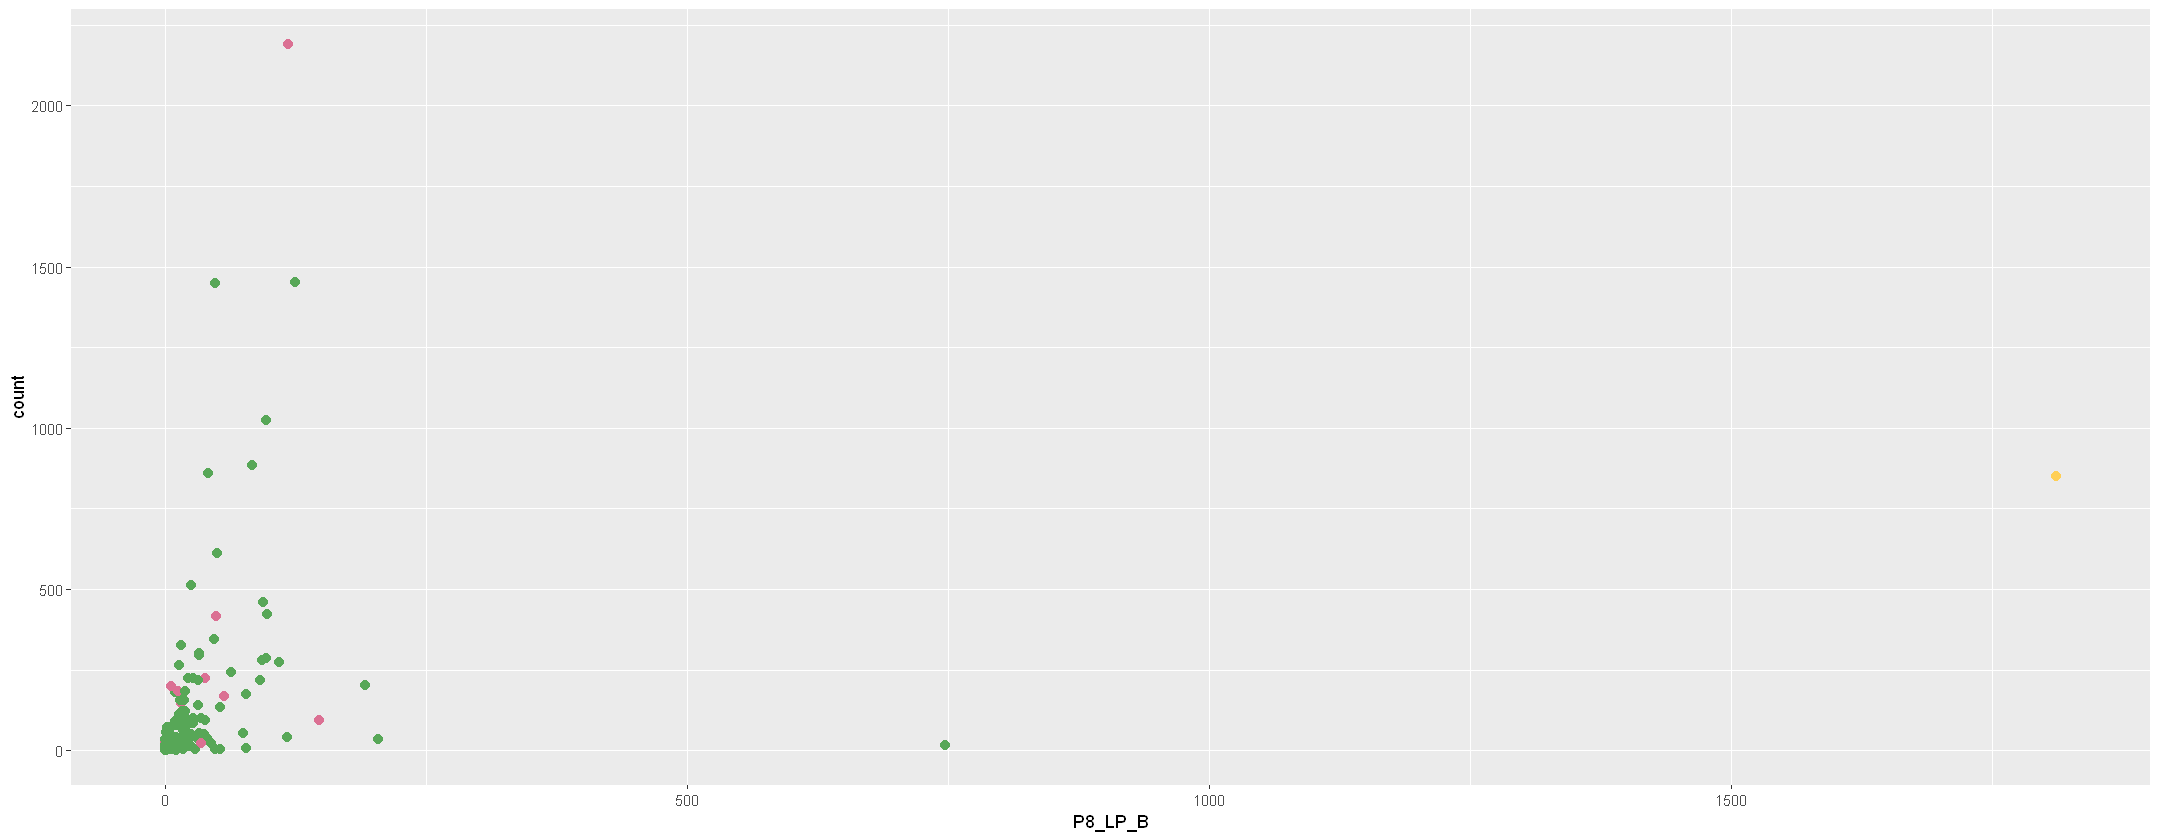

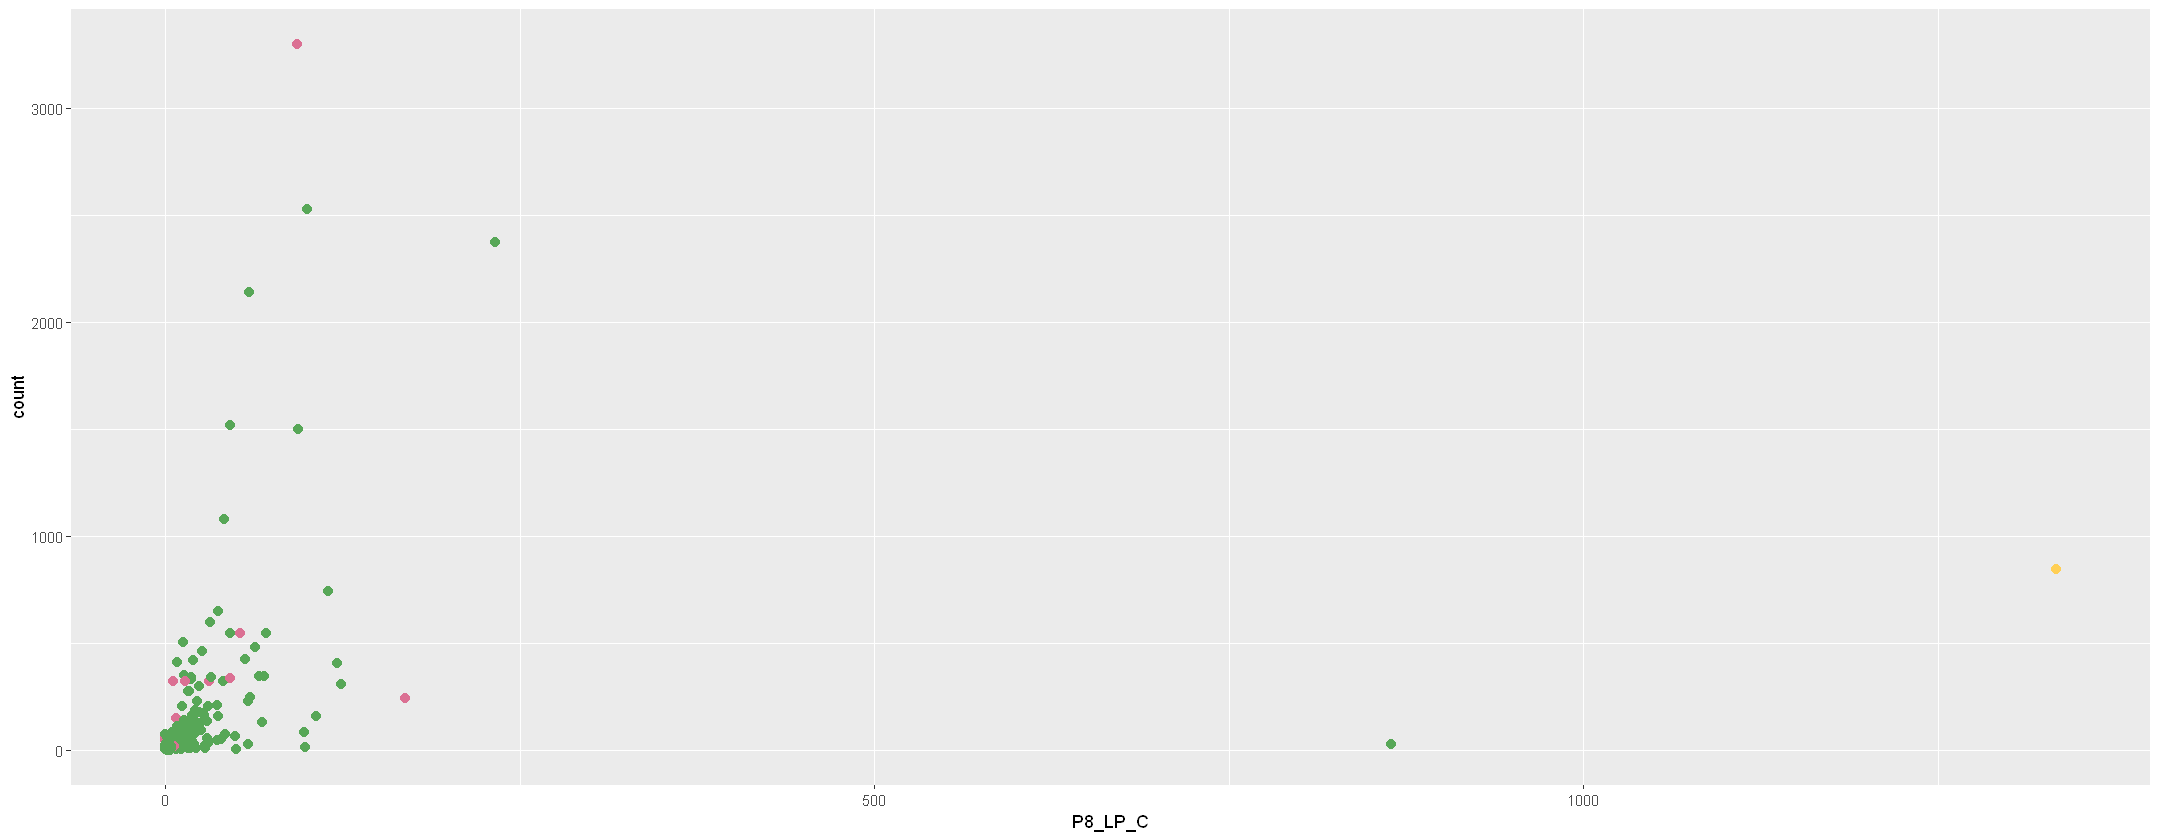

In [32]:
### Testing basal ROI
#####################

ROI_6B <- as.data.frame(t(read.csv("ROI_6B.csv", header=FALSE)))

ROI_6B <- ROI_6B[-1,]
colnames(ROI_6B) <- c("gene", "count")
rownames(ROI_6B) <- NULL
ROI_6B$count <- as.numeric(ROI_6B$count)

paragon_ROI_6B <- merge(paragon_panel, ROI_6B)

# dim(paragon_ROI_6B)
# head(paragon_ROI_6B)

cor.test(paragon_ROI_6B$P8_LP_B, paragon_ROI_6B$count)
cor.test(paragon_ROI_6B$P8_LP_B, paragon_ROI_6B$count, method="spearman")

ggplot(paragon_ROI_6B, aes(x=P8_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_6C <- as.data.frame(t(read.csv("ROI_6C.csv", header=FALSE)))

ROI_6C <- ROI_6C[-1,]
colnames(ROI_6C) <- c("gene", "count")
rownames(ROI_6C) <- NULL
ROI_6C$count <- as.numeric(ROI_6C$count)

paragon_ROI_6C <- merge(paragon_panel, ROI_6C)

# dim(paragon_ROI_6C)
# head(paragon_ROI_6C)

cor.test(paragon_ROI_6C$P8_LP_C, paragon_ROI_6C$count)
cor.test(paragon_ROI_6C$P8_LP_C, paragon_ROI_6C$count, method="spearman")

ggplot(paragon_ROI_6C, aes(x=P8_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_7


	Pearson's product-moment correlation

data:  paragon_ROI_7B$P8_LP_B and paragon_ROI_7B$count
t = 4.5338, df = 198, p-value = 1.002e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1753995 0.4272400
sample estimates:
      cor 
0.3066775 


Warning message in cor.test.default(paragon_ROI_7B$P8_LP_B, paragon_ROI_7B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_7B$P8_LP_B and paragon_ROI_7B$count
S = 482556, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6380743 



	Pearson's product-moment correlation

data:  paragon_ROI_7C$P8_LP_C and paragon_ROI_7C$count
t = 2.8356, df = 198, p-value = 0.005049
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06046324 0.32731704
sample estimates:
      cor 
0.1975471 


Warning message in cor.test.default(paragon_ROI_7C$P8_LP_C, paragon_ROI_7C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_7C$P8_LP_C and paragon_ROI_7C$count
S = 477575, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6418098 


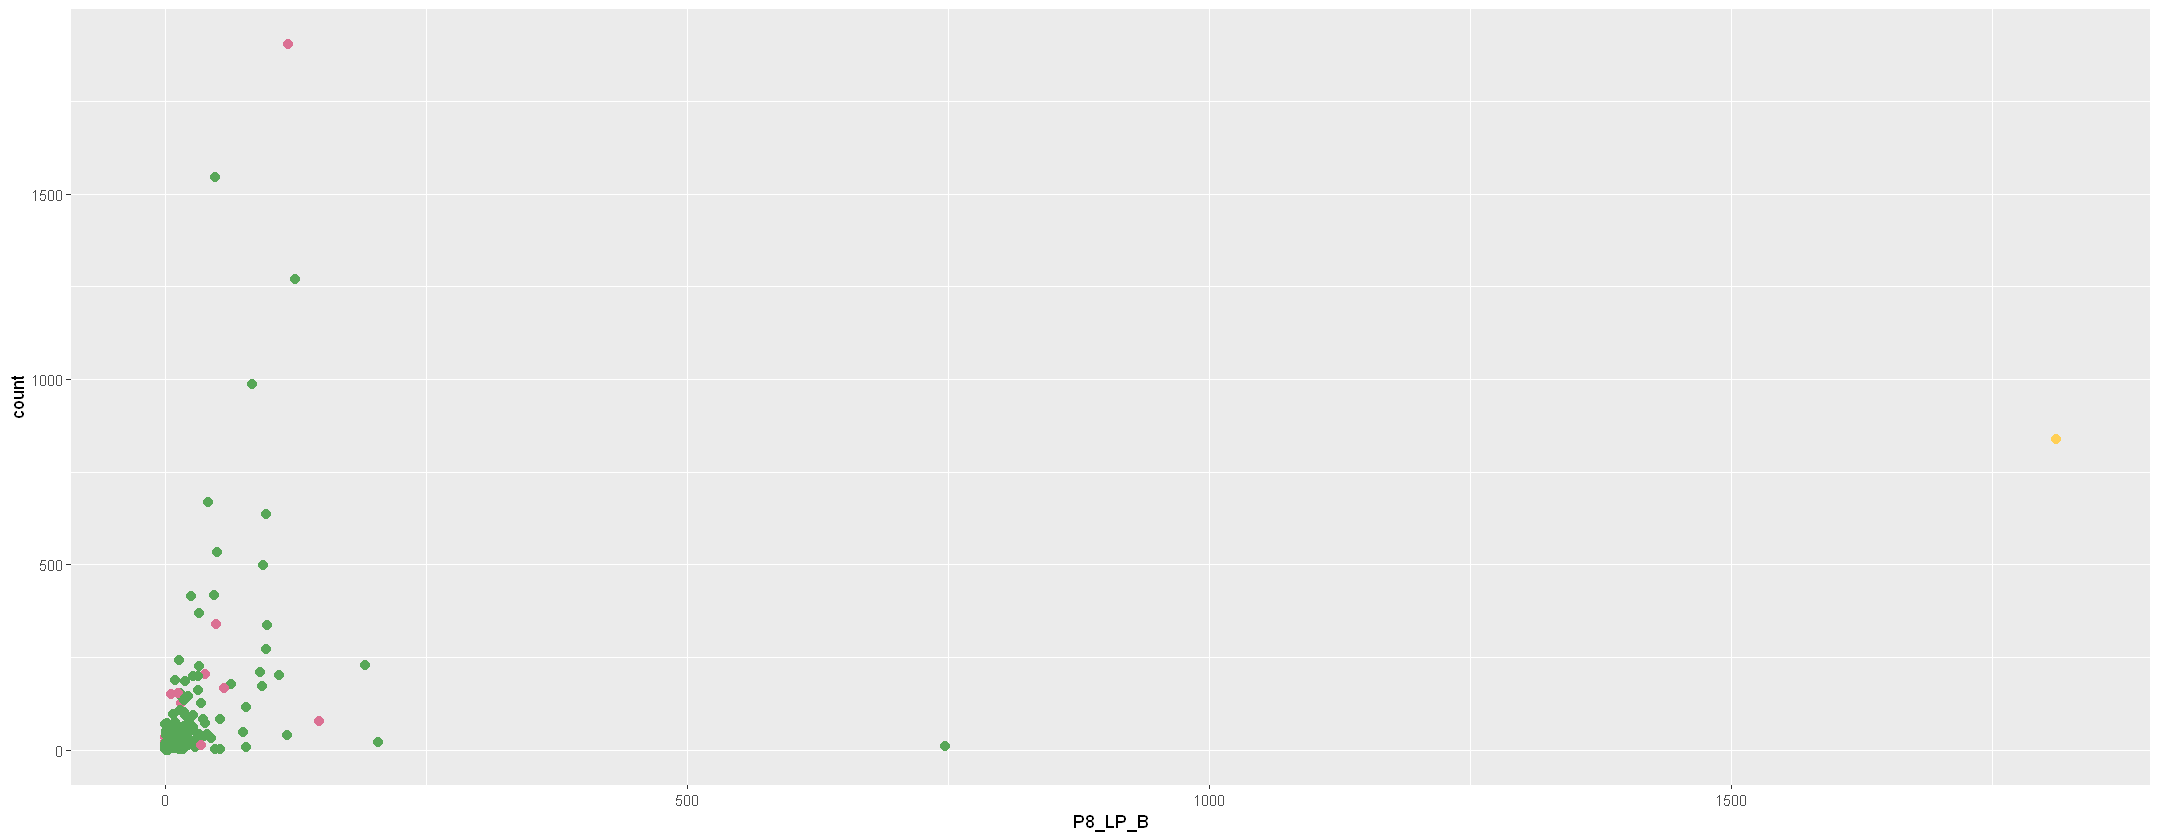

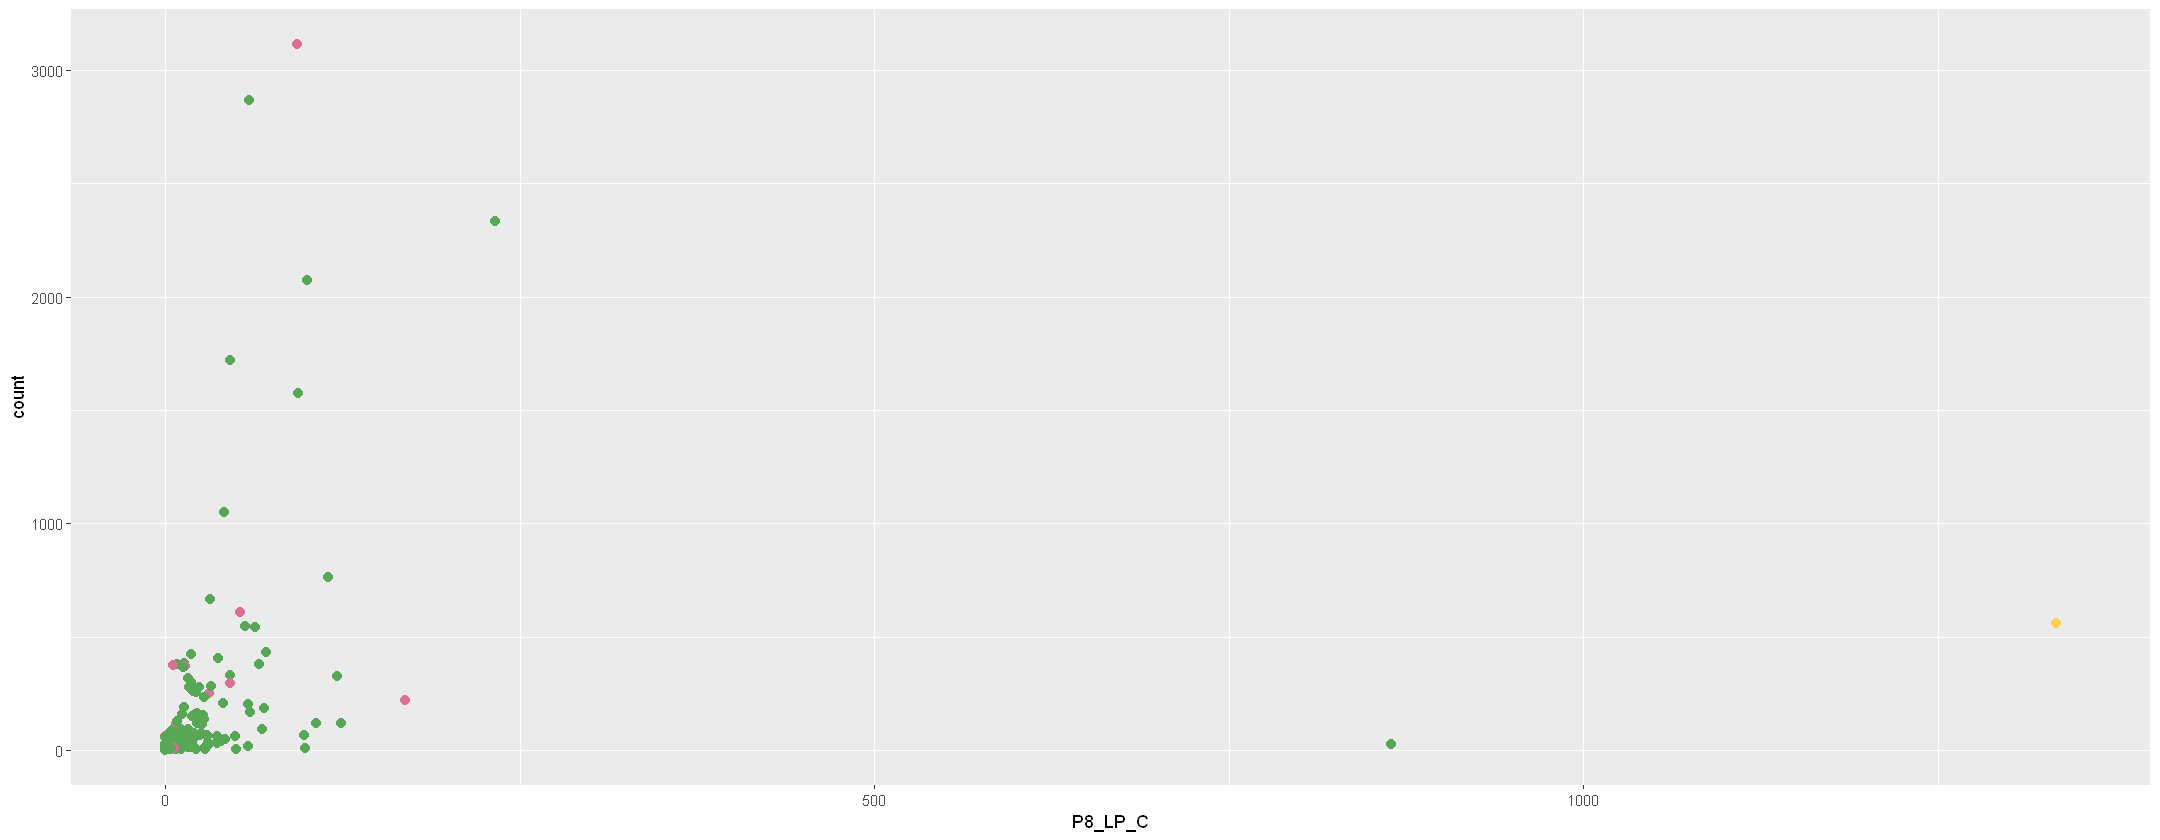

In [33]:
### Testing basal ROI
#####################

ROI_7B <- as.data.frame(t(read.csv("ROI_7B.csv", header=FALSE)))

ROI_7B <- ROI_7B[-1,]
colnames(ROI_7B) <- c("gene", "count")
rownames(ROI_7B) <- NULL
ROI_7B$count <- as.numeric(ROI_7B$count)

paragon_ROI_7B <- merge(paragon_panel, ROI_7B)

# dim(paragon_ROI_7B)
# head(paragon_ROI_7B)

cor.test(paragon_ROI_7B$P8_LP_B, paragon_ROI_7B$count)
cor.test(paragon_ROI_7B$P8_LP_B, paragon_ROI_7B$count, method="spearman")

ggplot(paragon_ROI_7B, aes(x=P8_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_7C <- as.data.frame(t(read.csv("ROI_7C.csv", header=FALSE)))

ROI_7C <- ROI_7C[-1,]
colnames(ROI_7C) <- c("gene", "count")
rownames(ROI_7C) <- NULL
ROI_7C$count <- as.numeric(ROI_7C$count)

paragon_ROI_7C <- merge(paragon_panel, ROI_7C)

# dim(paragon_ROI_7C)
# head(paragon_ROI_7C)

cor.test(paragon_ROI_7C$P8_LP_C, paragon_ROI_7C$count)
cor.test(paragon_ROI_7C$P8_LP_C, paragon_ROI_7C$count, method="spearman")

ggplot(paragon_ROI_7C, aes(x=P8_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_8


	Pearson's product-moment correlation

data:  paragon_ROI_8B$P8_LP_B and paragon_ROI_8B$count
t = 4.1948, df = 198, p-value = 4.119e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1530112 0.4082469
sample estimates:
      cor 
0.2856874 


Warning message in cor.test.default(paragon_ROI_8B$P8_LP_B, paragon_ROI_8B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_8B$P8_LP_B and paragon_ROI_8B$count
S = 437910, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6715597 



	Pearson's product-moment correlation

data:  paragon_ROI_8C$P8_LP_C and paragon_ROI_8C$count
t = 4.0957, df = 198, p-value = 6.133e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1464033 0.4025985
sample estimates:
      cor 
0.2794677 


Warning message in cor.test.default(paragon_ROI_8C$P8_LP_C, paragon_ROI_8C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_8C$P8_LP_C and paragon_ROI_8C$count
S = 441088, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6691755 


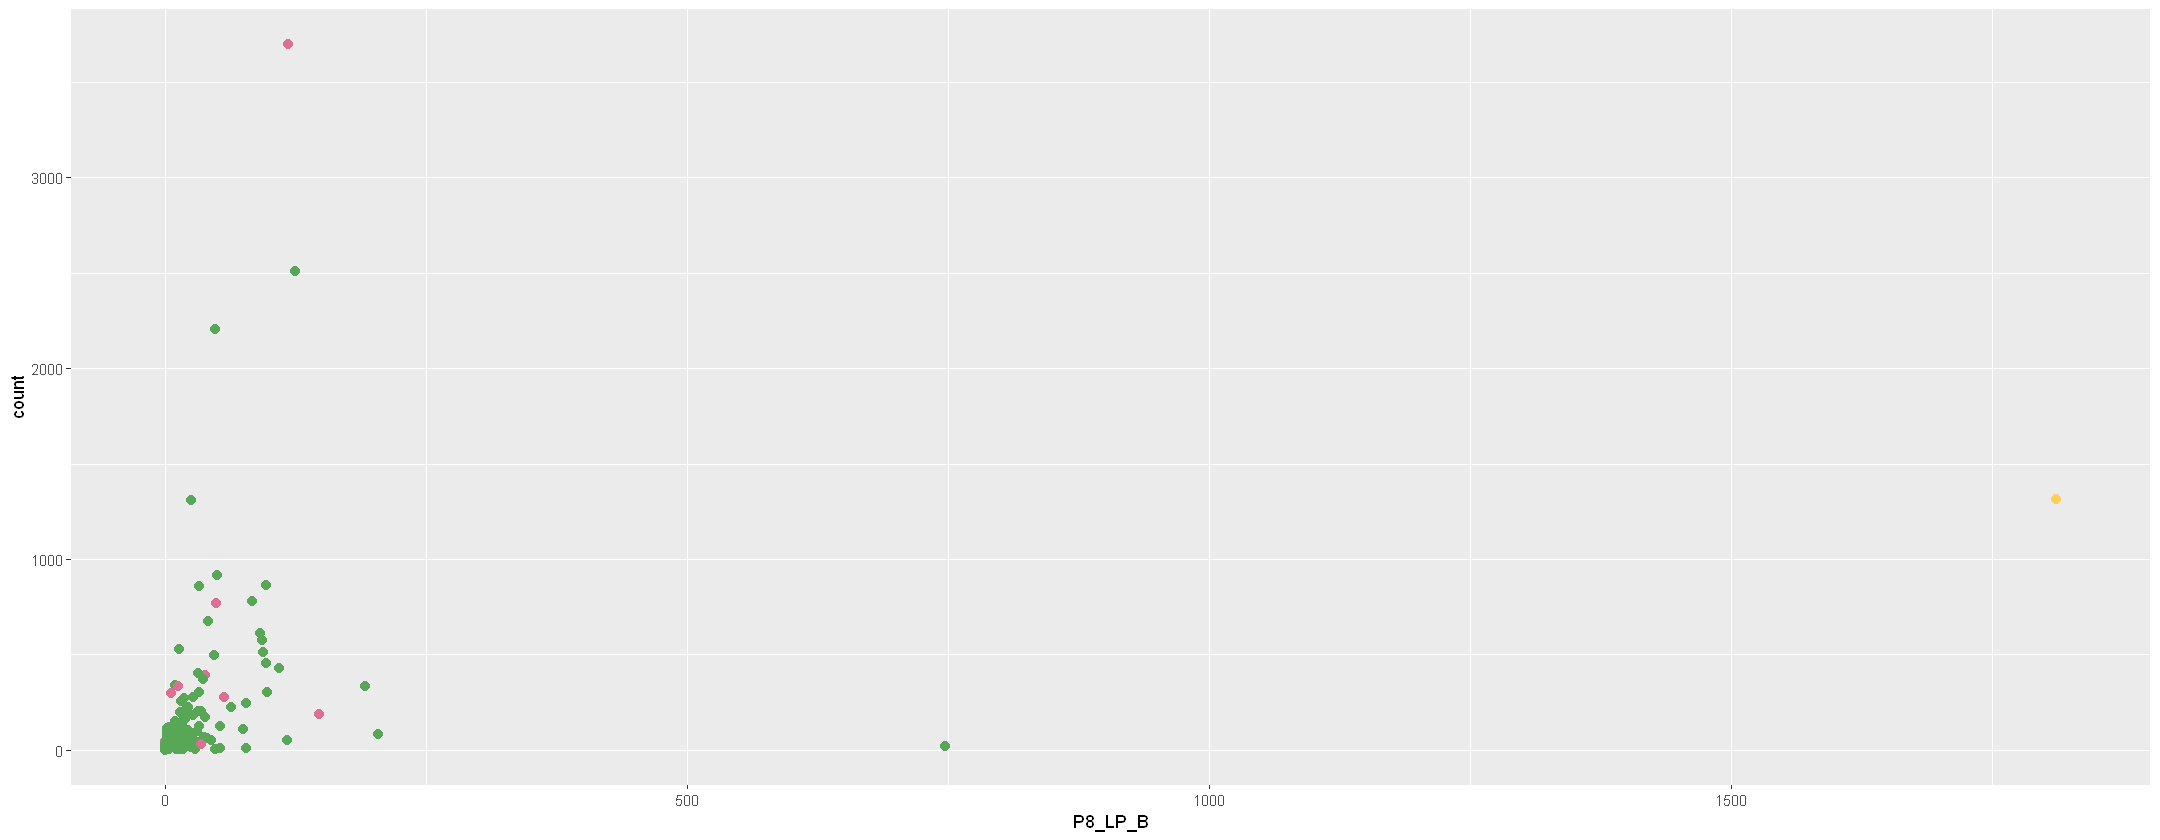

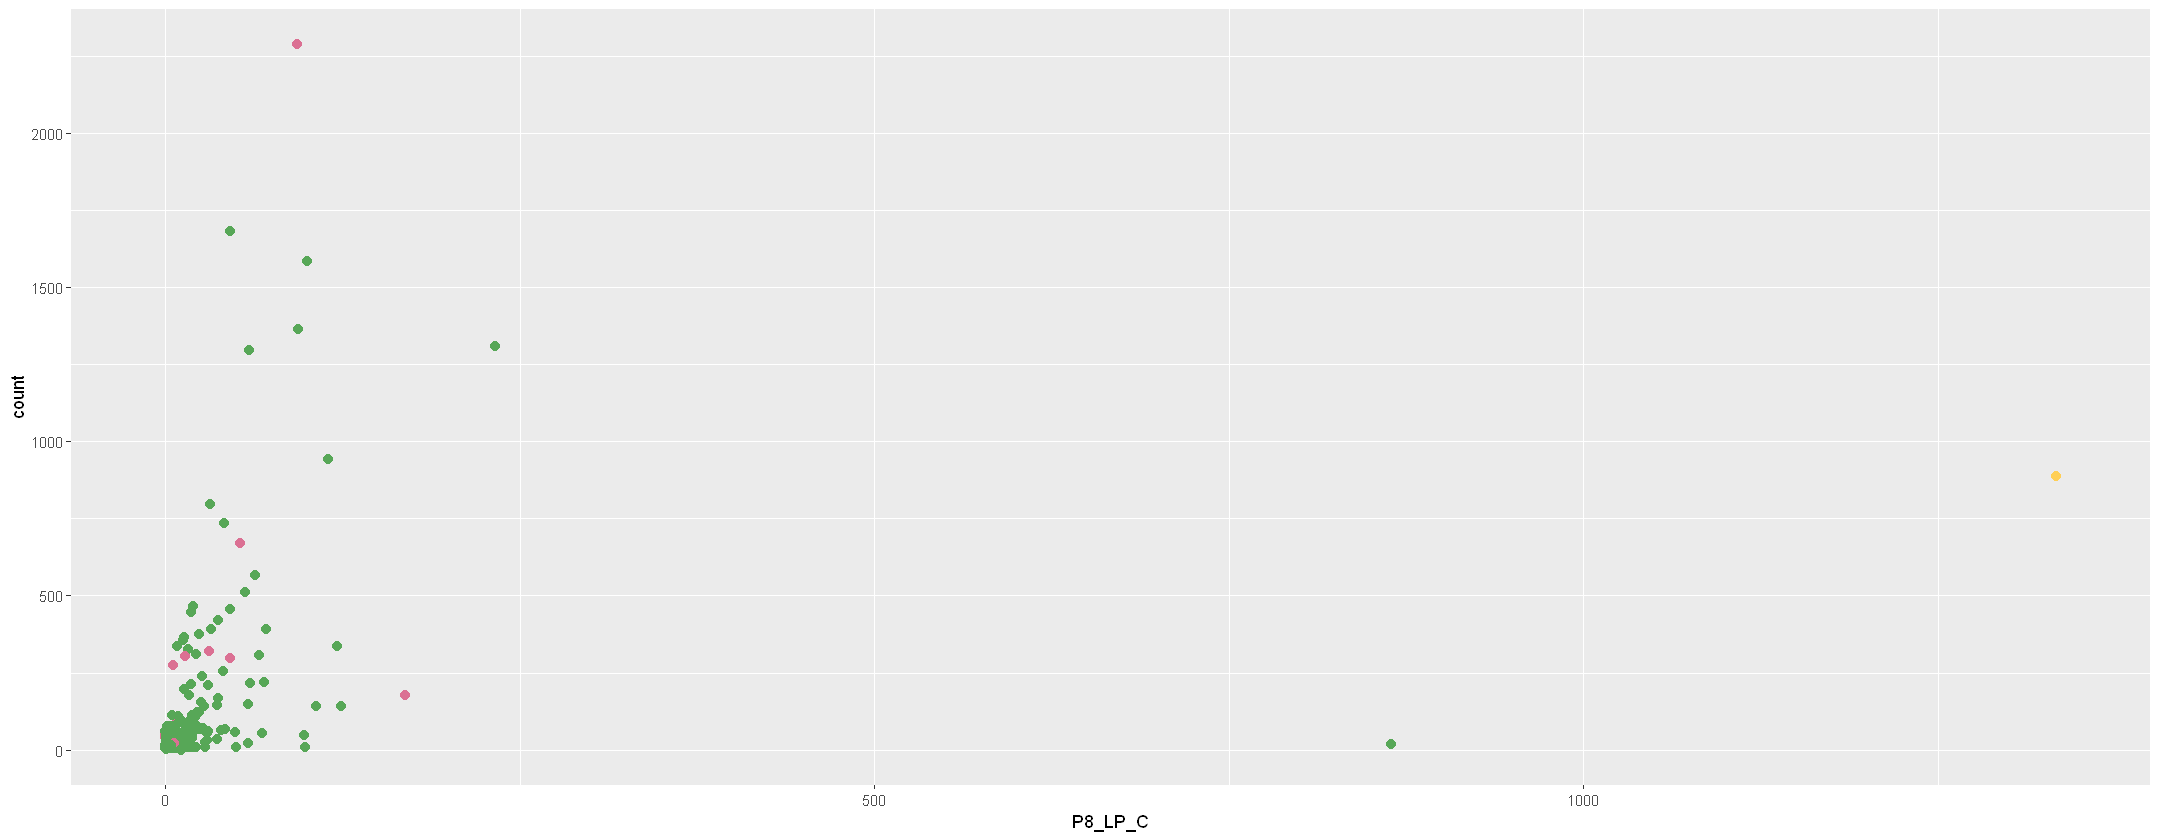

In [34]:
### Testing basal ROI
#####################

ROI_8B <- as.data.frame(t(read.csv("ROI_8B.csv", header=FALSE)))

ROI_8B <- ROI_8B[-1,]
colnames(ROI_8B) <- c("gene", "count")
rownames(ROI_8B) <- NULL
ROI_8B$count <- as.numeric(ROI_8B$count)

paragon_ROI_8B <- merge(paragon_panel, ROI_8B)

# dim(paragon_ROI_8B)
# head(paragon_ROI_8B)

cor.test(paragon_ROI_8B$P8_LP_B, paragon_ROI_8B$count)
cor.test(paragon_ROI_8B$P8_LP_B, paragon_ROI_8B$count, method="spearman")

ggplot(paragon_ROI_8B, aes(x=P8_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_8C <- as.data.frame(t(read.csv("ROI_8C.csv", header=FALSE)))

ROI_8C <- ROI_8C[-1,]
colnames(ROI_8C) <- c("gene", "count")
rownames(ROI_8C) <- NULL
ROI_8C$count <- as.numeric(ROI_8C$count)

paragon_ROI_8C <- merge(paragon_panel, ROI_8C)

# dim(paragon_ROI_8C)
# head(paragon_ROI_8C)

cor.test(paragon_ROI_8C$P8_LP_C, paragon_ROI_8C$count)
cor.test(paragon_ROI_8C$P8_LP_C, paragon_ROI_8C$count, method="spearman")

ggplot(paragon_ROI_8C, aes(x=P8_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_9


	Pearson's product-moment correlation

data:  paragon_ROI_9B$P8_LP_B and paragon_ROI_9B$count
t = 2.9804, df = 198, p-value = 0.00324
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07049394 0.33628186
sample estimates:
      cor 
0.2072084 


Warning message in cor.test.default(paragon_ROI_9B$P8_LP_B, paragon_ROI_9B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_9B$P8_LP_B and paragon_ROI_9B$count
S = 497046, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.627206 



	Pearson's product-moment correlation

data:  paragon_ROI_9C$P8_LP_C and paragon_ROI_9C$count
t = 3.8517, df = 198, p-value = 0.0001583
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1300396 0.3885265
sample estimates:
      cor 
0.2640173 


Warning message in cor.test.default(paragon_ROI_9C$P8_LP_C, paragon_ROI_9C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_9C$P8_LP_C and paragon_ROI_9C$count
S = 463231, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6525677 


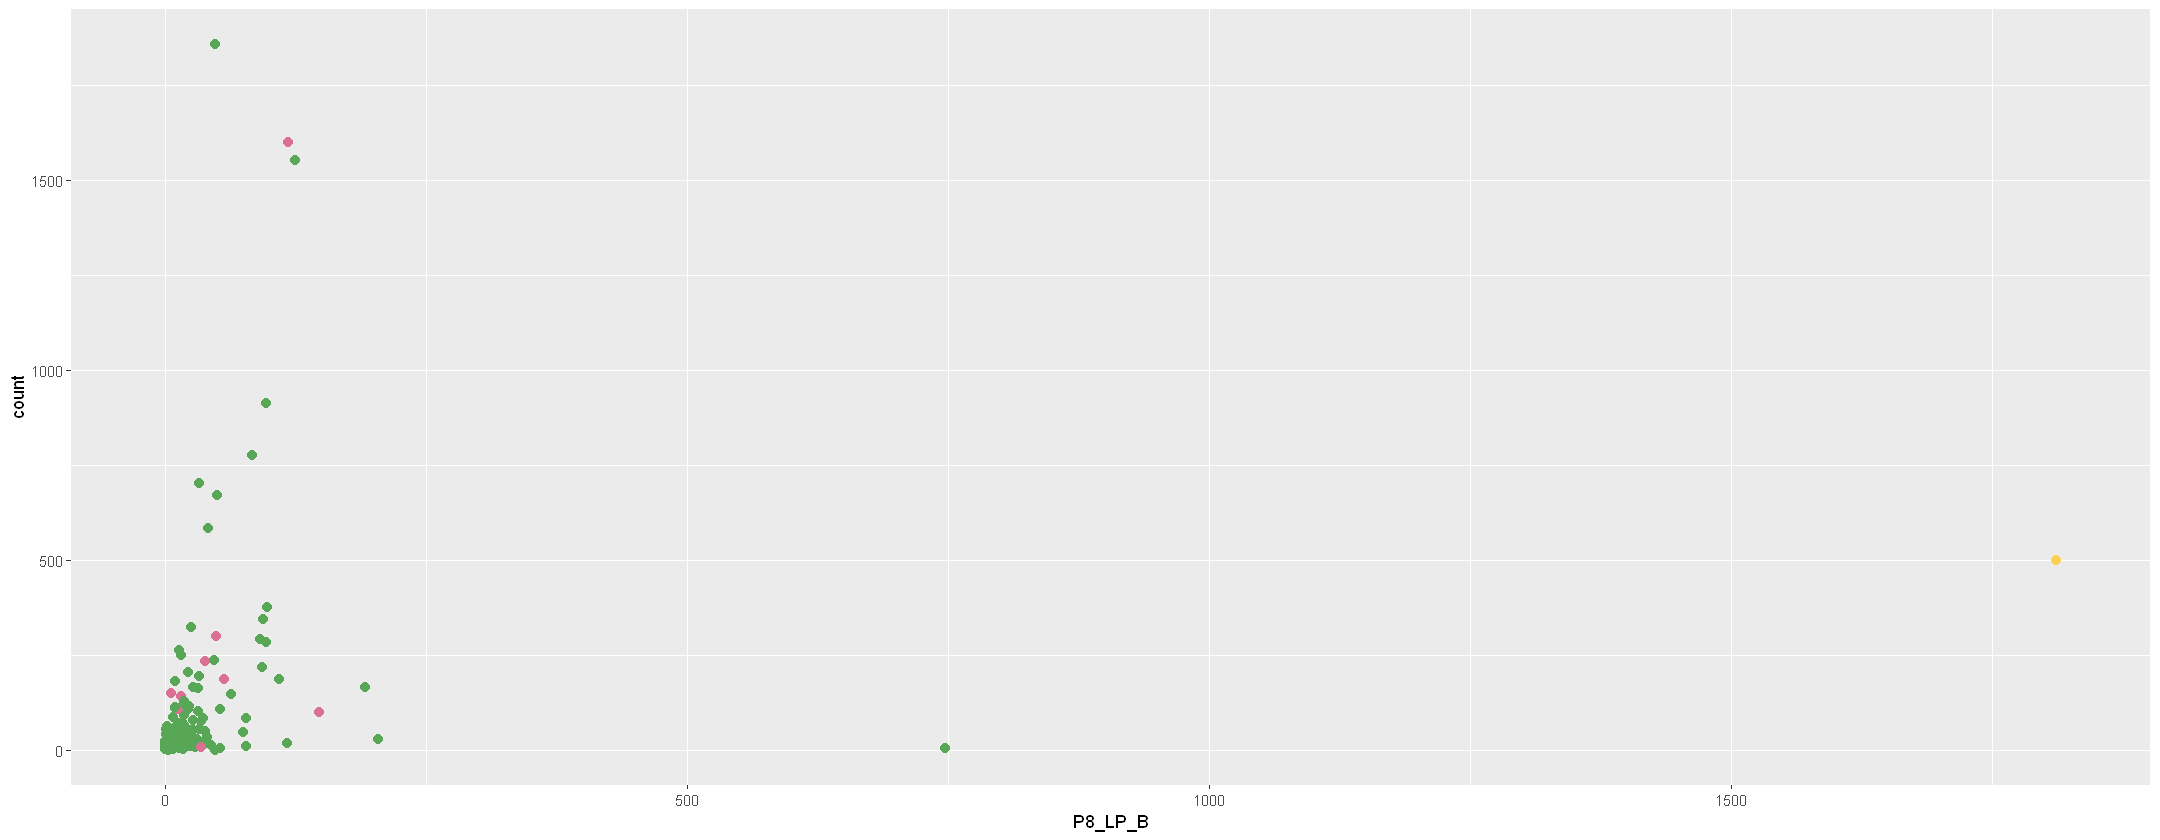

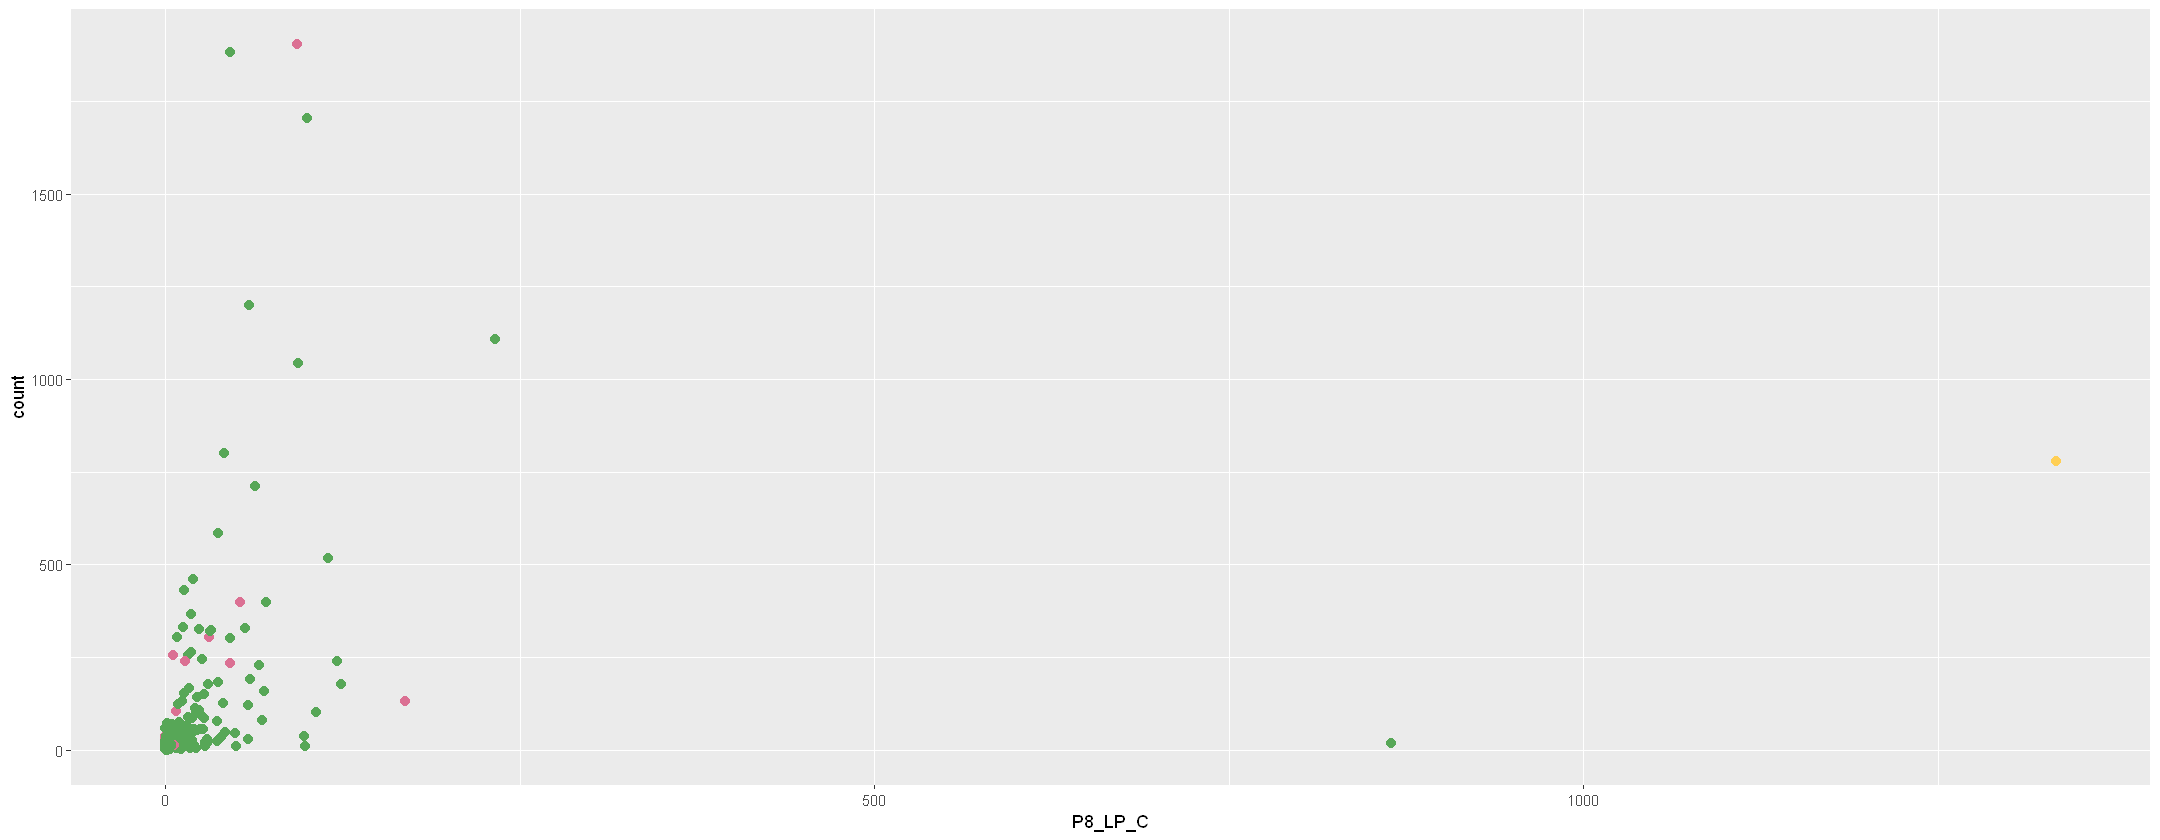

In [35]:
### Testing basal ROI
#####################

ROI_9B <- as.data.frame(t(read.csv("ROI_9B.csv", header=FALSE)))

ROI_9B <- ROI_9B[-1,]
colnames(ROI_9B) <- c("gene", "count")
rownames(ROI_9B) <- NULL
ROI_9B$count <- as.numeric(ROI_9B$count)

paragon_ROI_9B <- merge(paragon_panel, ROI_9B)

# dim(paragon_ROI_9B)
# head(paragon_ROI_9B)

cor.test(paragon_ROI_9B$P8_LP_B, paragon_ROI_9B$count)
cor.test(paragon_ROI_9B$P8_LP_B, paragon_ROI_9B$count, method="spearman")

ggplot(paragon_ROI_9B, aes(x=P8_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_9C <- as.data.frame(t(read.csv("ROI_9C.csv", header=FALSE)))

ROI_9C <- ROI_9C[-1,]
colnames(ROI_9C) <- c("gene", "count")
rownames(ROI_9C) <- NULL
ROI_9C$count <- as.numeric(ROI_9C$count)

paragon_ROI_9C <- merge(paragon_panel, ROI_9C)

# dim(paragon_ROI_9C)
# head(paragon_ROI_9C)

cor.test(paragon_ROI_9C$P8_LP_C, paragon_ROI_9C$count)
cor.test(paragon_ROI_9C$P8_LP_C, paragon_ROI_9C$count, method="spearman")

ggplot(paragon_ROI_9C, aes(x=P8_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_10


	Pearson's product-moment correlation

data:  paragon_ROI_10B$P8_TS_B and paragon_ROI_10B$count
t = 4.6383, df = 198, p-value = 6.374e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1822353 0.4329952
sample estimates:
      cor 
0.3130611 


Warning message in cor.test.default(paragon_ROI_10B$P8_TS_B, paragon_ROI_10B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_10B$P8_TS_B and paragon_ROI_10B$count
S = 415690, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6882248 


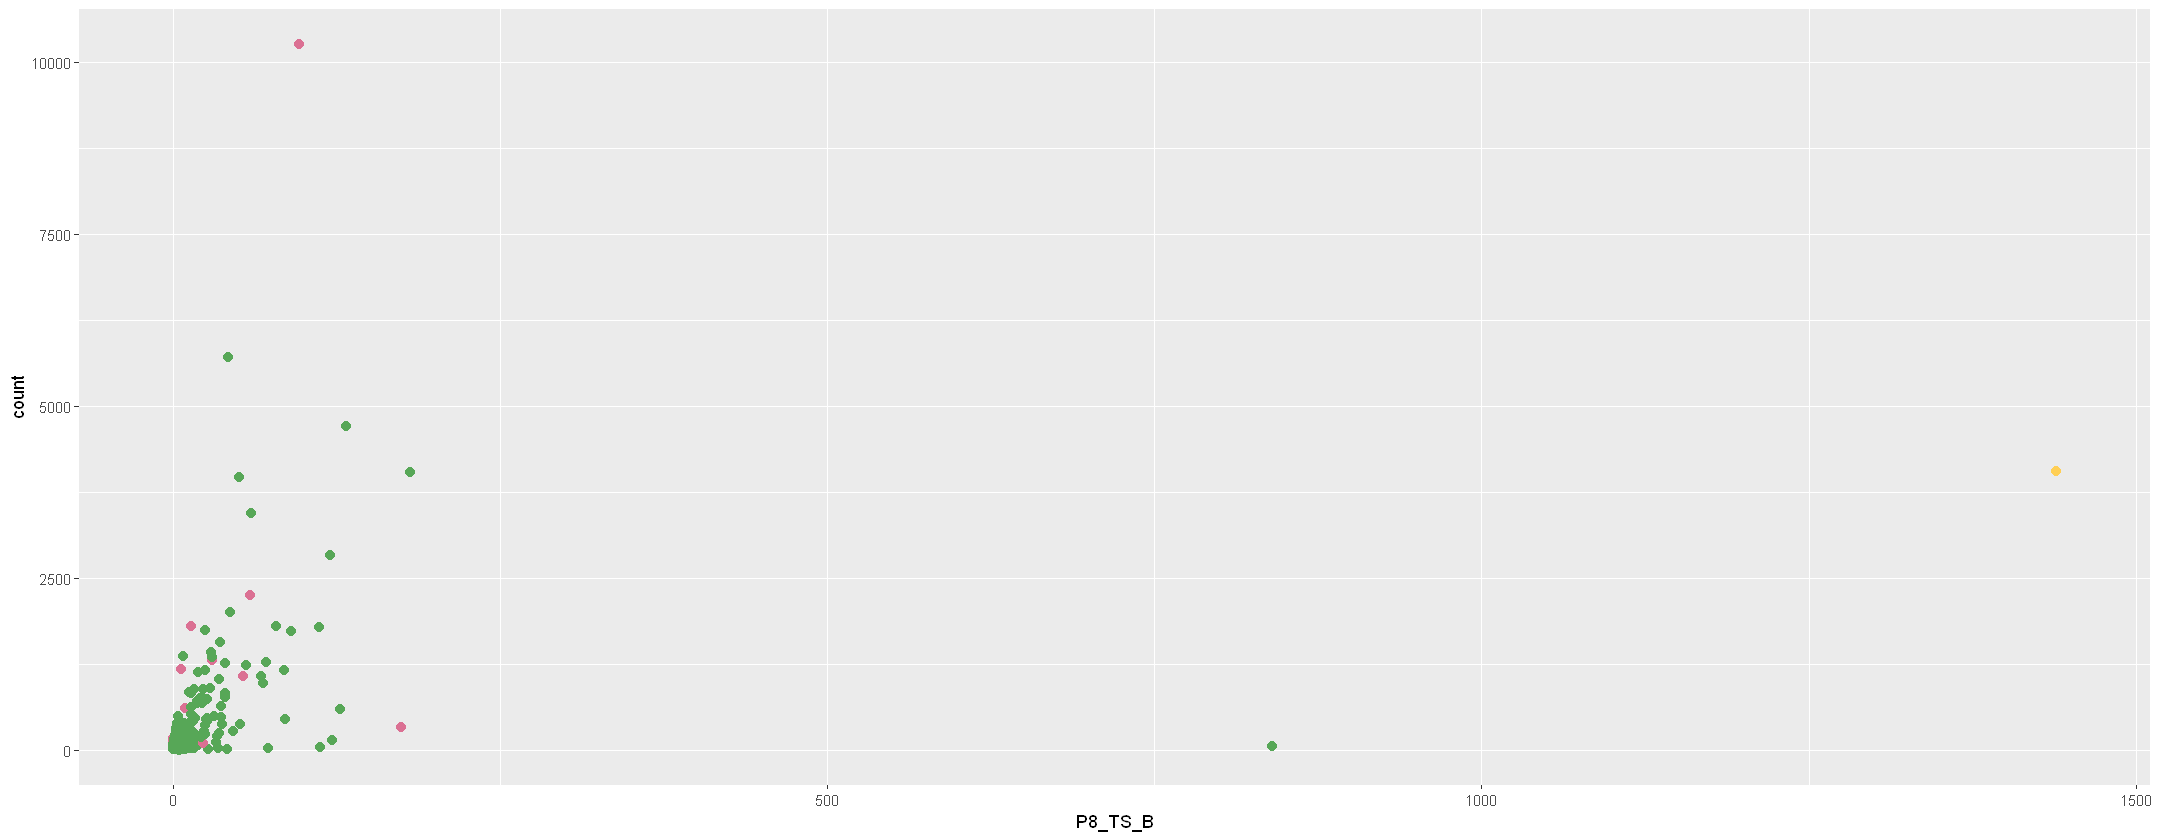

In [36]:
### Testing basal ROI
#####################

ROI_10B <- as.data.frame(t(read.csv("ROI_10B.csv", header=FALSE)))

ROI_10B <- ROI_10B[-1,]
colnames(ROI_10B) <- c("gene", "count")
rownames(ROI_10B) <- NULL
ROI_10B$count <- as.numeric(ROI_10B$count)

paragon_ROI_10B <- merge(paragon_panel, ROI_10B)

# dim(paragon_ROI_10B)
# head(paragon_ROI_10B)

cor.test(paragon_ROI_10B$P8_TS_B, paragon_ROI_10B$count)
cor.test(paragon_ROI_10B$P8_TS_B, paragon_ROI_10B$count, method="spearman")

ggplot(paragon_ROI_10B, aes(x=P8_TS_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_11


	Pearson's product-moment correlation

data:  paragon_ROI_11B$P8_LT_B and paragon_ROI_11B$count
t = 2.9568, df = 198, p-value = 0.003487
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06886226 0.33482683
sample estimates:
      cor 
0.2056386 


Warning message in cor.test.default(paragon_ROI_11B$P8_LT_B, paragon_ROI_11B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_11B$P8_LT_B and paragon_ROI_11B$count
S = 432712, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6754575 



	Pearson's product-moment correlation

data:  paragon_ROI_11C$P8_LT_C and paragon_ROI_11C$count
t = 2.7644, df = 198, p-value = 0.006242
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05551438 0.32287628
sample estimates:
      cor 
0.1927707 


Warning message in cor.test.default(paragon_ROI_11C$P8_LT_C, paragon_ROI_11C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_11C$P8_LT_C and paragon_ROI_11C$count
S = 397017, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7022299 


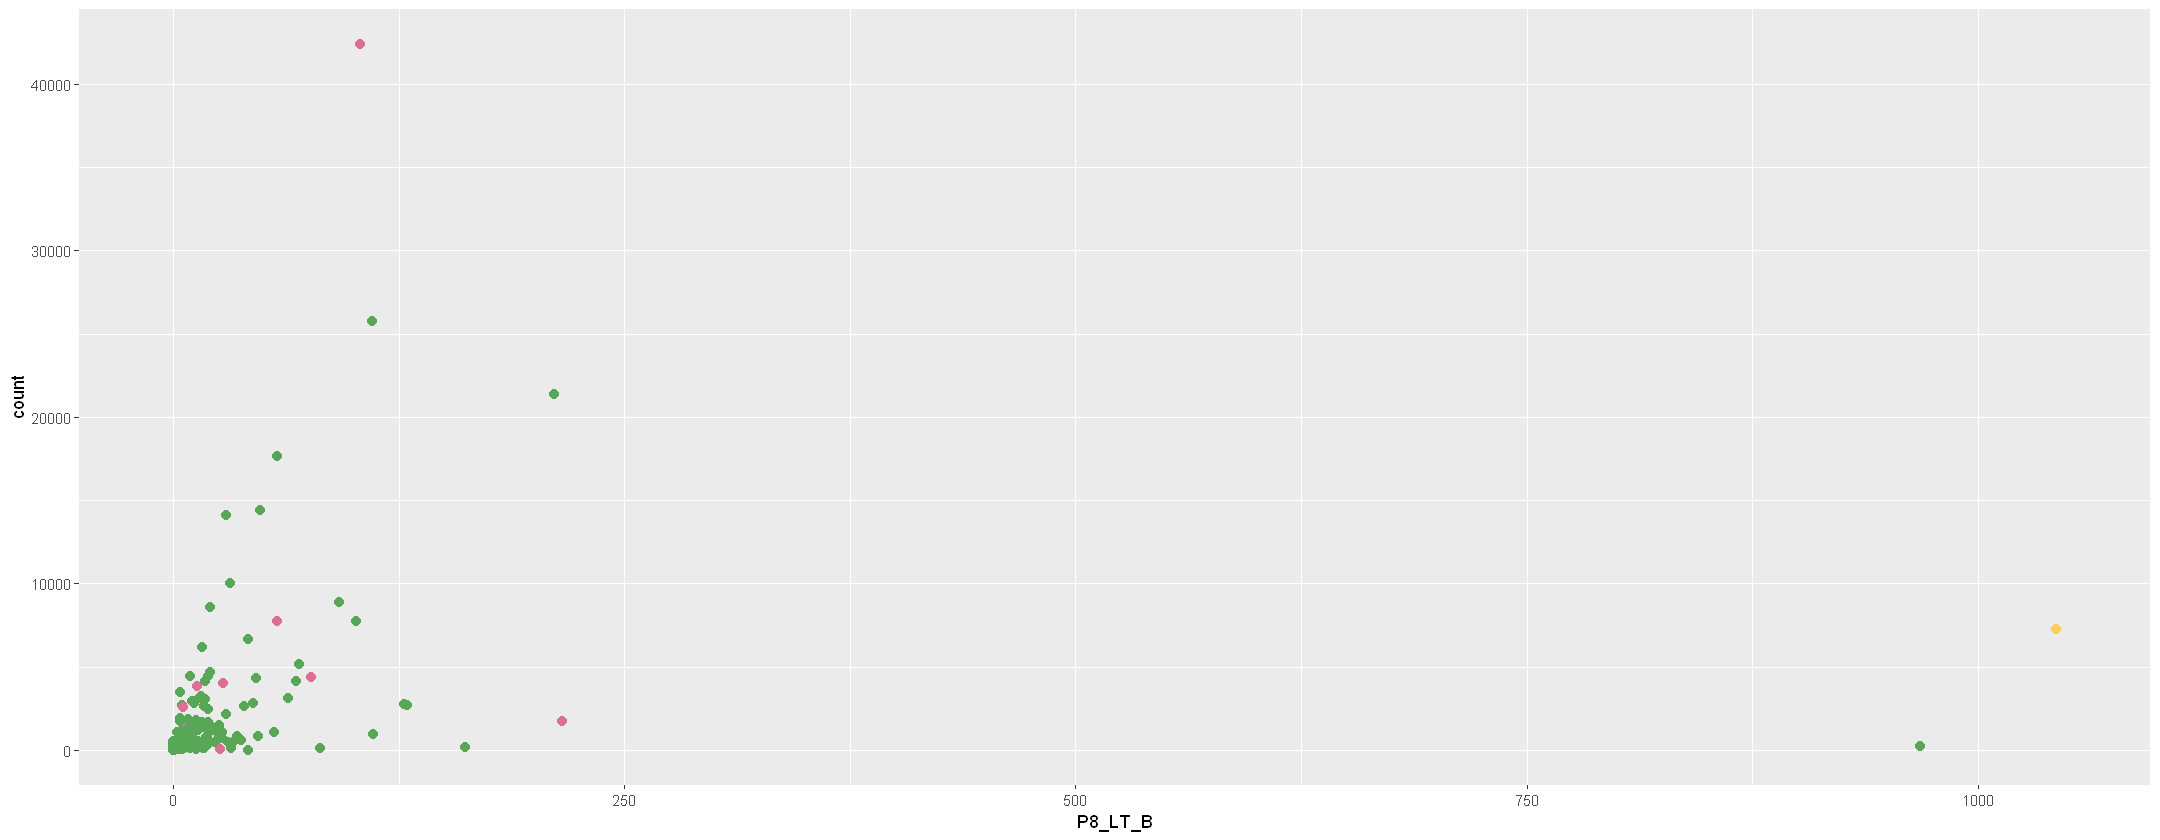

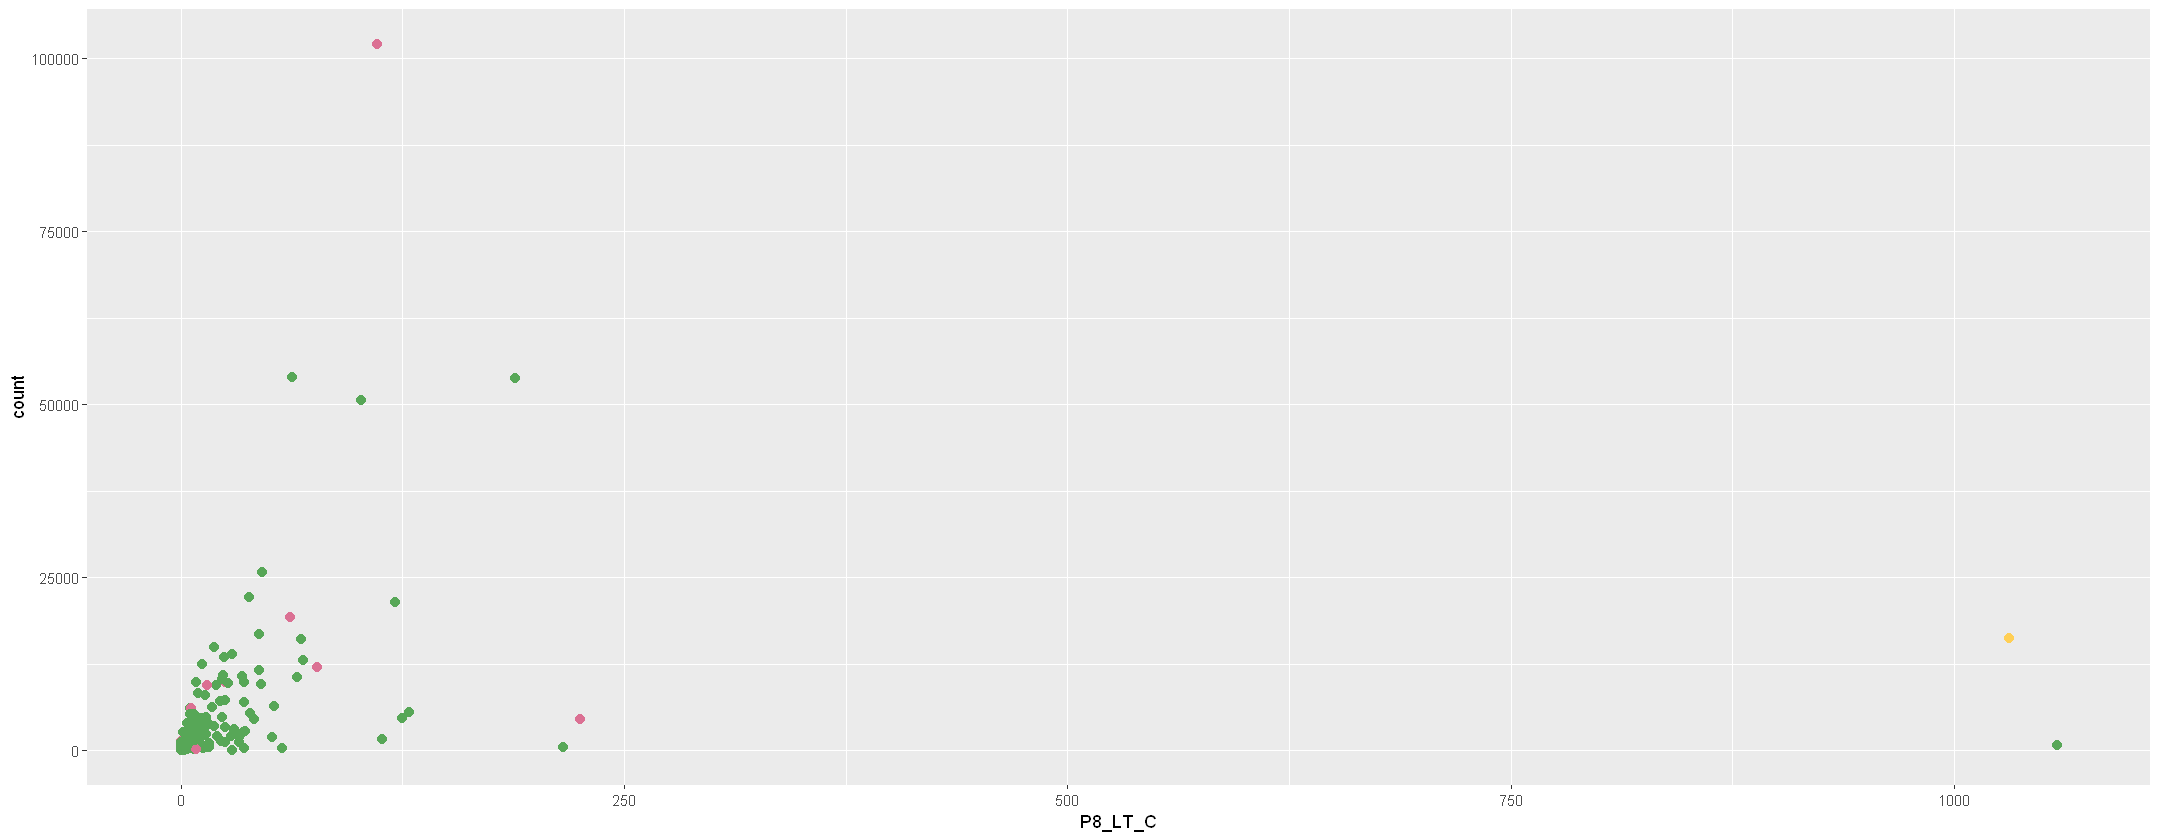

In [56]:
### Testing basal ROI
#####################

ROI_11B <- as.data.frame(t(read.csv("ROI_11B.csv", header=FALSE)))

ROI_11B <- ROI_11B[-1,]
colnames(ROI_11B) <- c("gene", "count")
rownames(ROI_11B) <- NULL
ROI_11B$count <- as.numeric(ROI_11B$count)

paragon_ROI_11B <- merge(paragon_panel, ROI_11B)

# dim(paragon_ROI_11B)
# head(paragon_ROI_11B)

cor.test(paragon_ROI_11B$P8_LT_B, paragon_ROI_11B$count)
cor.test(paragon_ROI_11B$P8_LT_B, paragon_ROI_11B$count, method="spearman")

ggplot(paragon_ROI_11B, aes(x=P8_LT_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_11C <- as.data.frame(t(read.csv("ROI_11C.csv", header=FALSE)))

ROI_11C <- ROI_11C[-1,]
colnames(ROI_11C) <- c("gene", "count")
rownames(ROI_11C) <- NULL
ROI_11C$count <- as.numeric(ROI_11C$count)

paragon_ROI_11C <- merge(paragon_panel, ROI_11C)

# dim(paragon_ROI_11C)
# head(paragon_ROI_11C)

cor.test(paragon_ROI_11C$P8_LT_C, paragon_ROI_11C$count)
cor.test(paragon_ROI_11C$P8_LT_C, paragon_ROI_11C$count, method="spearman")

ggplot(paragon_ROI_11C, aes(x=P8_LT_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_12


	Pearson's product-moment correlation

data:  paragon_ROI_12B$P8_LT_B and paragon_ROI_12B$count
t = 2.8646, df = 198, p-value = 0.004625
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06247712 0.32912078
sample estimates:
      cor 
0.1994889 


Warning message in cor.test.default(paragon_ROI_12B$P8_LT_B, paragon_ROI_12B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_12B$P8_LT_B and paragon_ROI_12B$count
S = 410439, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6921631 



	Pearson's product-moment correlation

data:  paragon_ROI_12C$P8_LT_C and paragon_ROI_12C$count
t = 2.9946, df = 198, p-value = 0.003098
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07148042 0.33716092
sample estimates:
      cor 
0.2081571 


Warning message in cor.test.default(paragon_ROI_12C$P8_LT_C, paragon_ROI_12C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_12C$P8_LT_C and paragon_ROI_12C$count
S = 388771, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7084144 


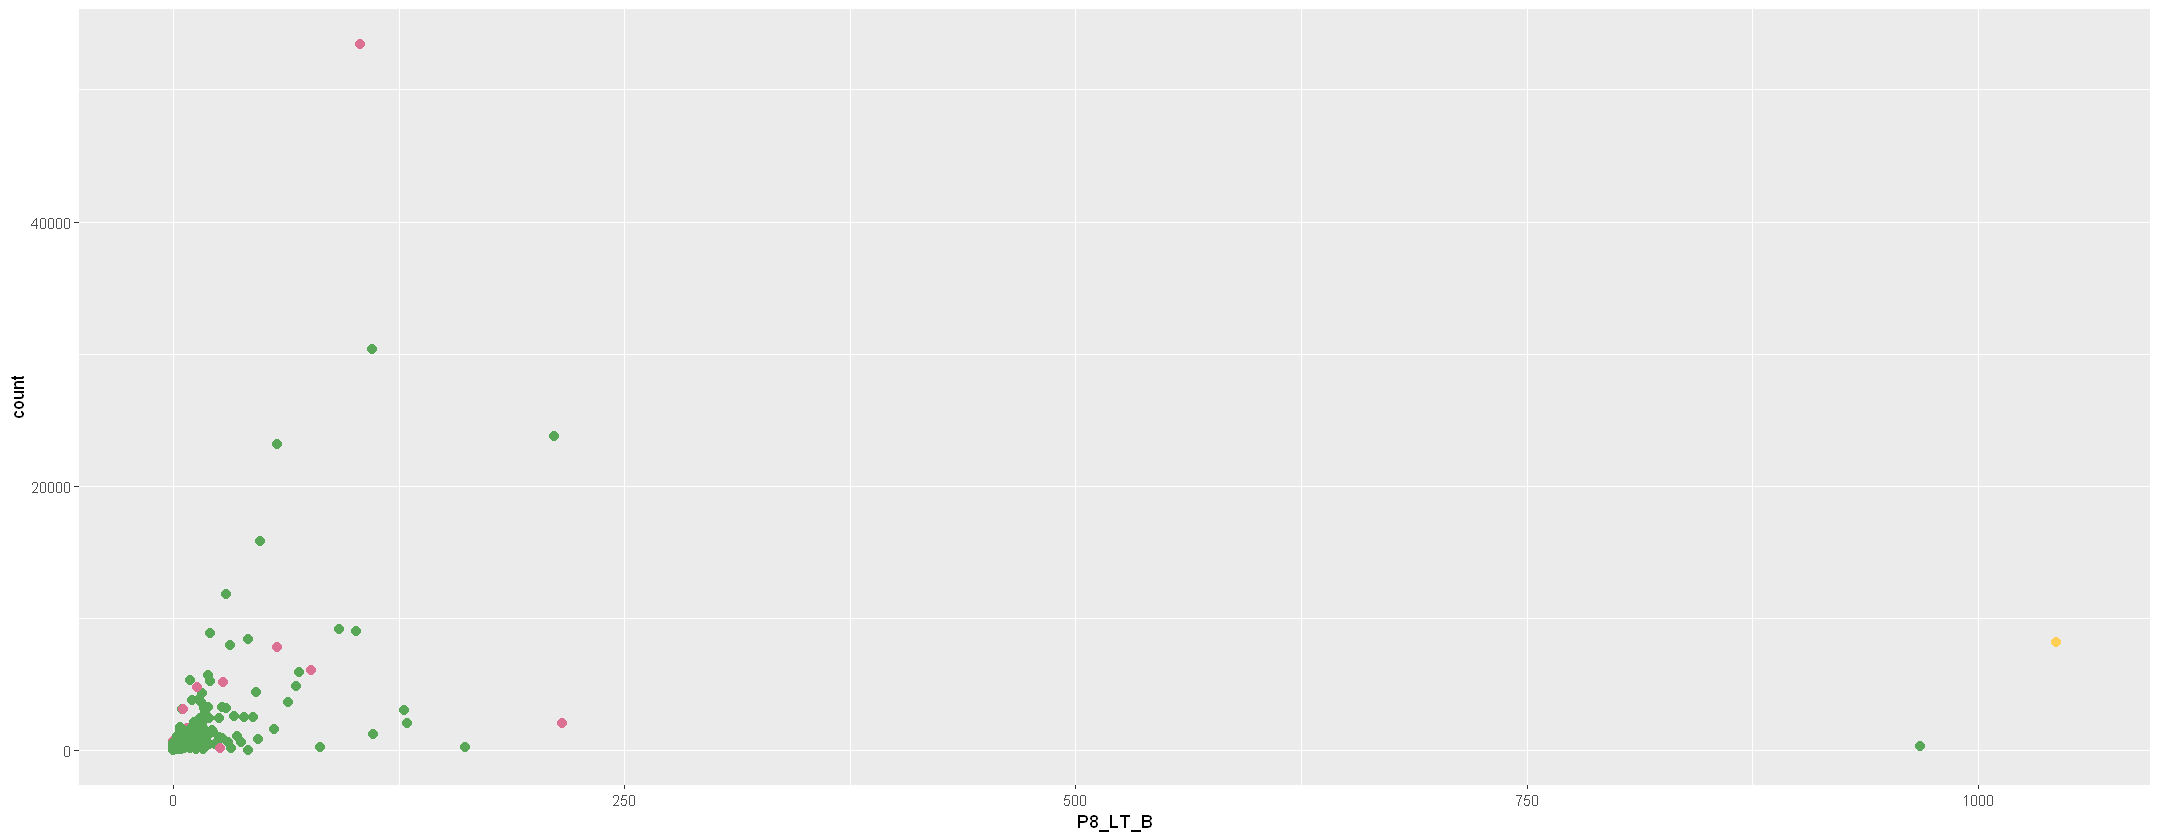

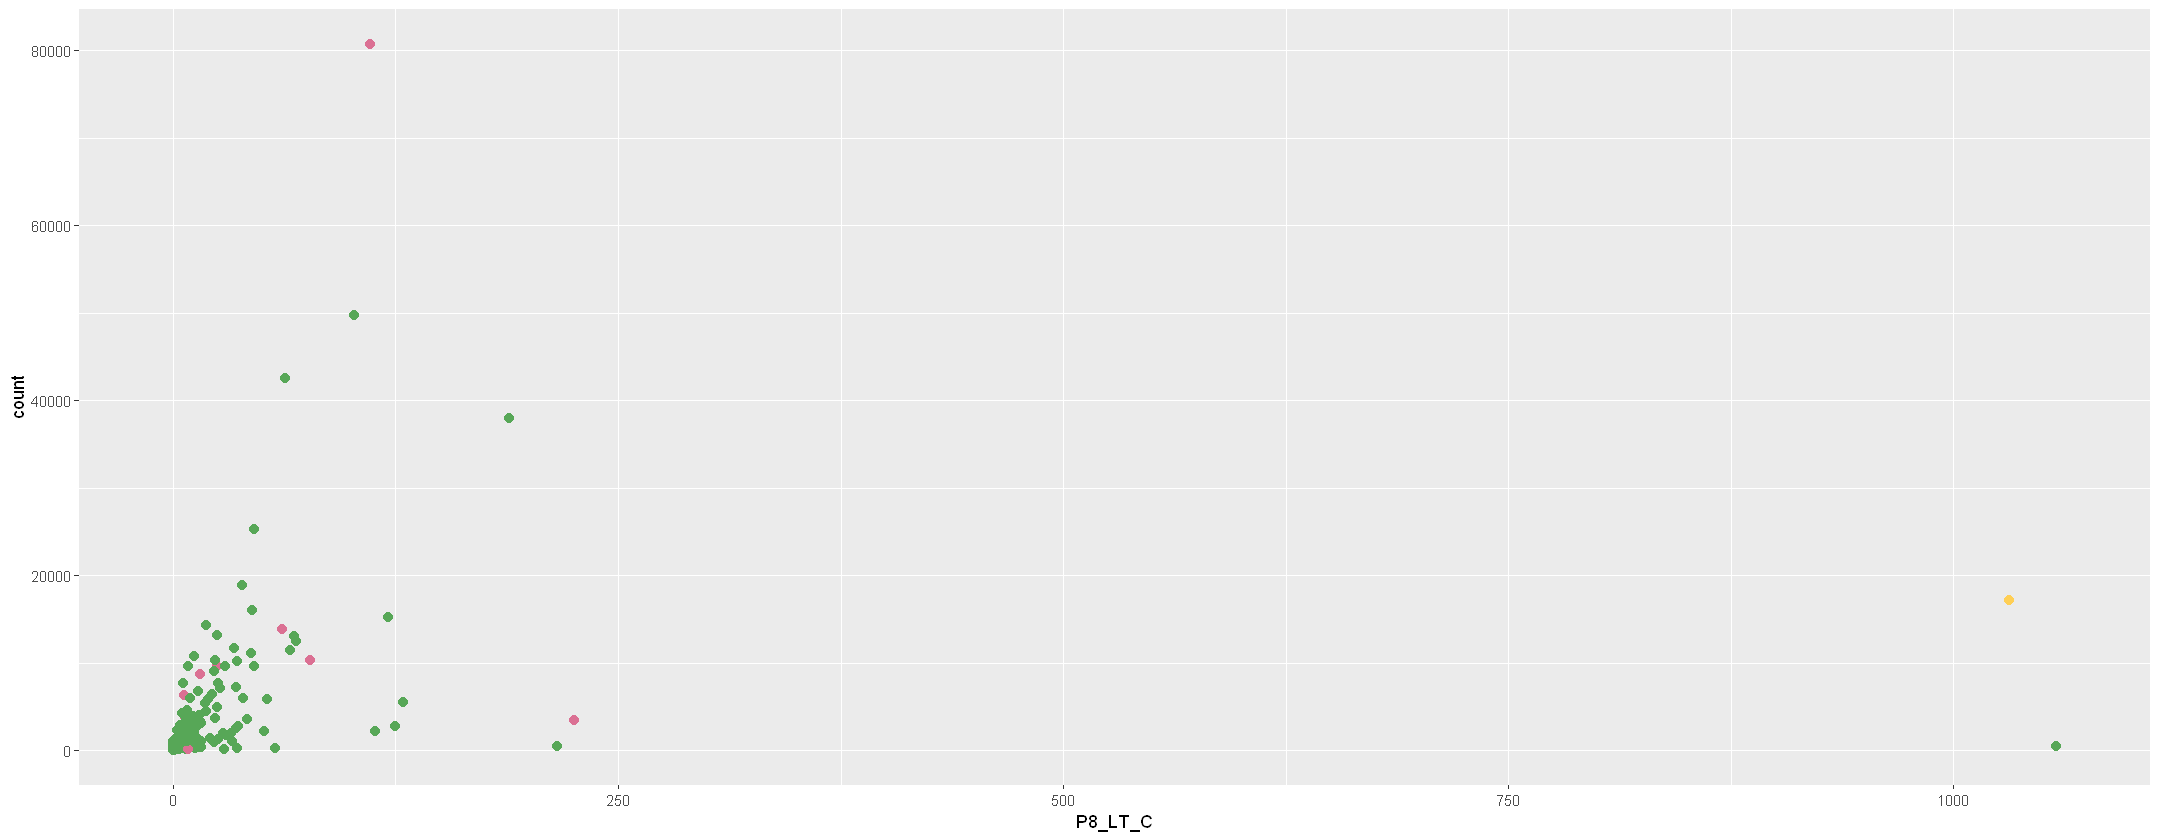

In [57]:
### Testing basal ROI
#####################

ROI_12B <- as.data.frame(t(read.csv("ROI_12B.csv", header=FALSE)))

ROI_12B <- ROI_12B[-1,]
colnames(ROI_12B) <- c("gene", "count")
rownames(ROI_12B) <- NULL
ROI_12B$count <- as.numeric(ROI_12B$count)

paragon_ROI_12B <- merge(paragon_panel, ROI_12B)

# dim(paragon_ROI_12B)
# head(paragon_ROI_12B)

cor.test(paragon_ROI_12B$P8_LT_B, paragon_ROI_12B$count)
cor.test(paragon_ROI_12B$P8_LT_B, paragon_ROI_12B$count, method="spearman")

ggplot(paragon_ROI_12B, aes(x=P8_LT_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_12C <- as.data.frame(t(read.csv("ROI_12C.csv", header=FALSE)))

ROI_12C <- ROI_12C[-1,]
colnames(ROI_12C) <- c("gene", "count")
rownames(ROI_12C) <- NULL
ROI_12C$count <- as.numeric(ROI_12C$count)

paragon_ROI_12C <- merge(paragon_panel, ROI_12C)

# dim(paragon_ROI_12C)
# head(paragon_ROI_12C)

cor.test(paragon_ROI_12C$P8_LT_C, paragon_ROI_12C$count)
cor.test(paragon_ROI_12C$P8_LT_C, paragon_ROI_12C$count, method="spearman")

ggplot(paragon_ROI_12C, aes(x=P8_LT_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_13


	Pearson's product-moment correlation

data:  paragon_ROI_13B$P5_LDR_B and paragon_ROI_13B$count
t = 6.8144, df = 198, p-value = 1.113e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3162383 0.5418318
sample estimates:
     cor 
0.435856 


Warning message in cor.test.default(paragon_ROI_13B$P5_LDR_C, paragon_ROI_13B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_13B$P5_LDR_C and paragon_ROI_13B$count
S = 539973, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5950099 



	Pearson's product-moment correlation

data:  paragon_ROI_13C$P5_LDR_C and paragon_ROI_13C$count
t = 7.3144, df = 198, p-value = 6.278e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3445294 0.5638816
sample estimates:
      cor 
0.4612237 


Warning message in cor.test.default(paragon_ROI_13C$P5_LDR_C, paragon_ROI_13C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_13C$P5_LDR_C and paragon_ROI_13C$count
S = 450926, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.661797 


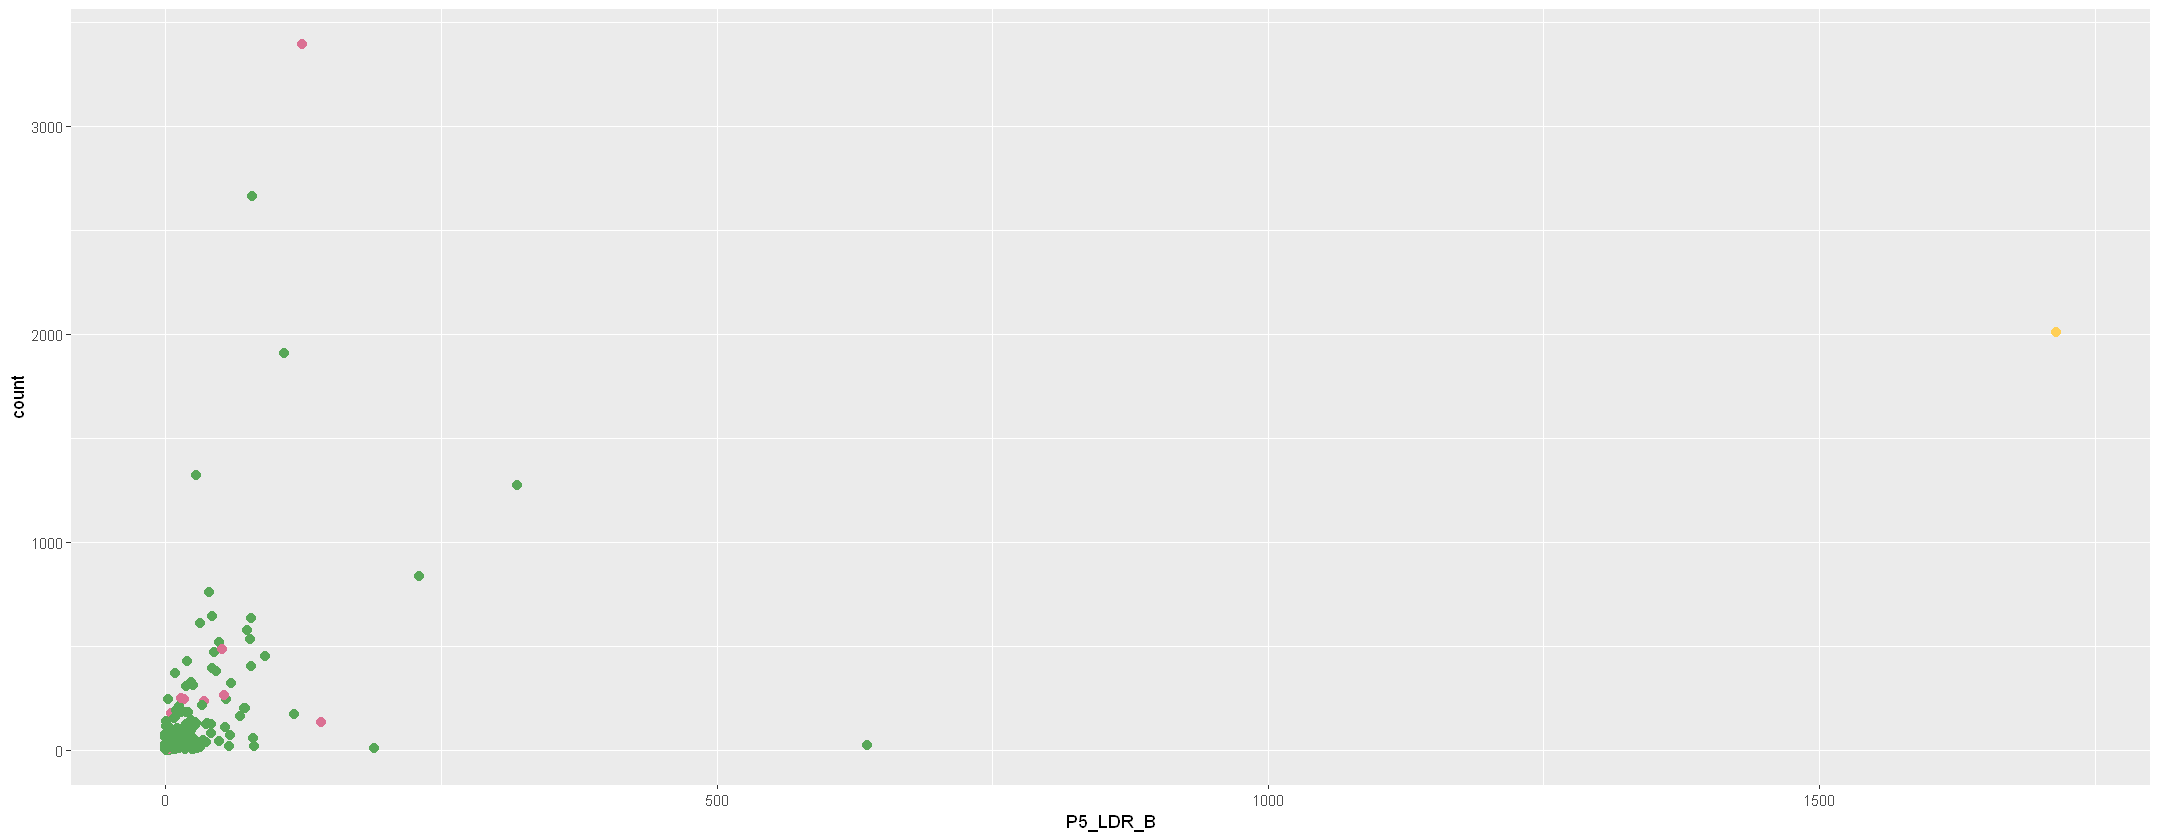

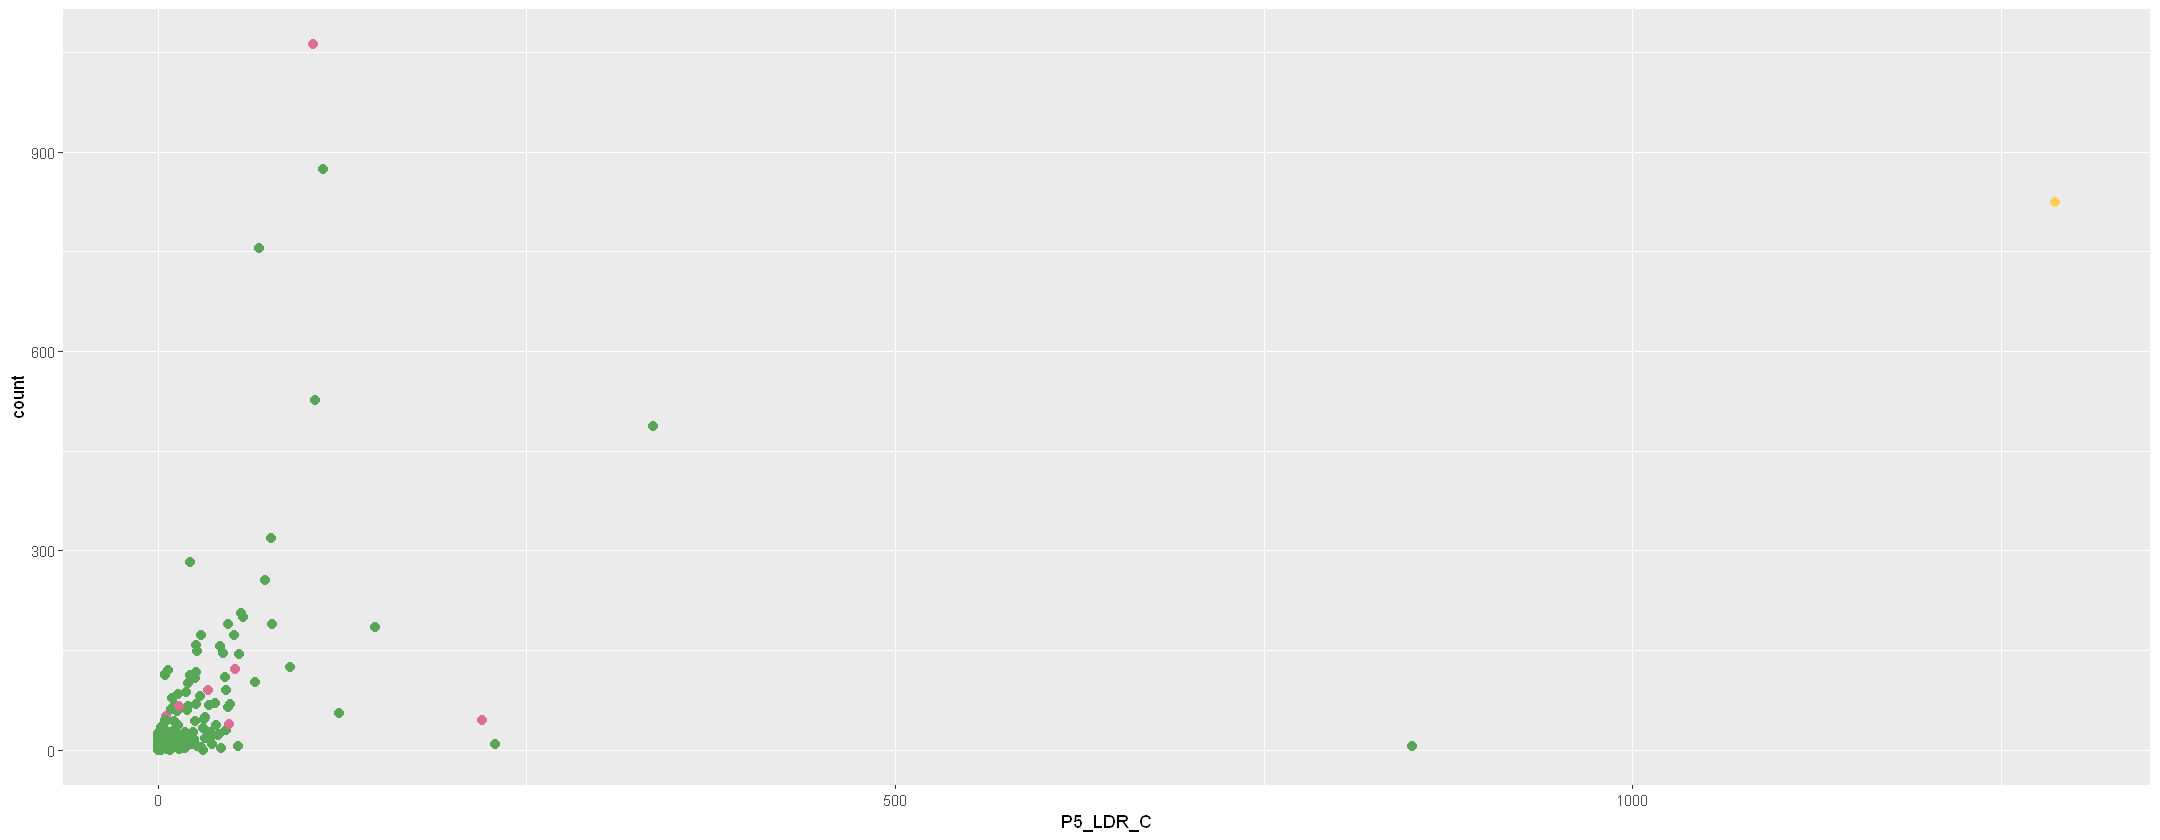

In [37]:
### Testing basal ROI
#####################

ROI_13B <- as.data.frame(t(read.csv("ROI_13B.csv", header=FALSE)))

ROI_13B <- ROI_13B[-1,]
colnames(ROI_13B) <- c("gene", "count")
rownames(ROI_13B) <- NULL
ROI_13B$count <- as.numeric(ROI_13B$count)

paragon_ROI_13B <- merge(paragon_panel, ROI_13B)

# dim(paragon_ROI_13B)
# head(paragon_ROI_13B)

cor.test(paragon_ROI_13B$P5_LDR_B, paragon_ROI_13B$count)
cor.test(paragon_ROI_13B$P5_LDR_C, paragon_ROI_13B$count, method="spearman")

ggplot(paragon_ROI_13B, aes(x=P5_LDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_13C <- as.data.frame(t(read.csv("ROI_13C.csv", header=FALSE)))

ROI_13C <- ROI_13C[-1,]
colnames(ROI_13C) <- c("gene", "count")
rownames(ROI_13C) <- NULL
ROI_13C$count <- as.numeric(ROI_13C$count)

paragon_ROI_13C <- merge(paragon_panel, ROI_13C)

# dim(paragon_ROI_13C)
# head(paragon_ROI_13C)

cor.test(paragon_ROI_13C$P5_LDR_C, paragon_ROI_13C$count)
cor.test(paragon_ROI_13C$P5_LDR_C, paragon_ROI_13C$count, method="spearman")

ggplot(paragon_ROI_13C, aes(x=P5_LDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_14


	Pearson's product-moment correlation

data:  paragon_ROI_14B$P5_LDR_B and paragon_ROI_14B$count
t = 2.1842, df = 198, p-value = 0.03012
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01496486 0.28604115
sample estimates:
      cor 
0.1533874 


Warning message in cor.test.default(paragon_ROI_14B$P5_LDR_B, paragon_ROI_14B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_14B$P5_LDR_B and paragon_ROI_14B$count
S = 490448, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6321546 



	Pearson's product-moment correlation

data:  paragon_ROI_14C$P5_LDR_C and paragon_ROI_14C$count
t = 2.3058, df = 198, p-value = 0.02216
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02349513 0.29385715
sample estimates:
     cor 
0.161709 


Warning message in cor.test.default(paragon_ROI_14C$P5_LDR_C, paragon_ROI_14C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_14C$P5_LDR_C and paragon_ROI_14C$count
S = 482855, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6378496 


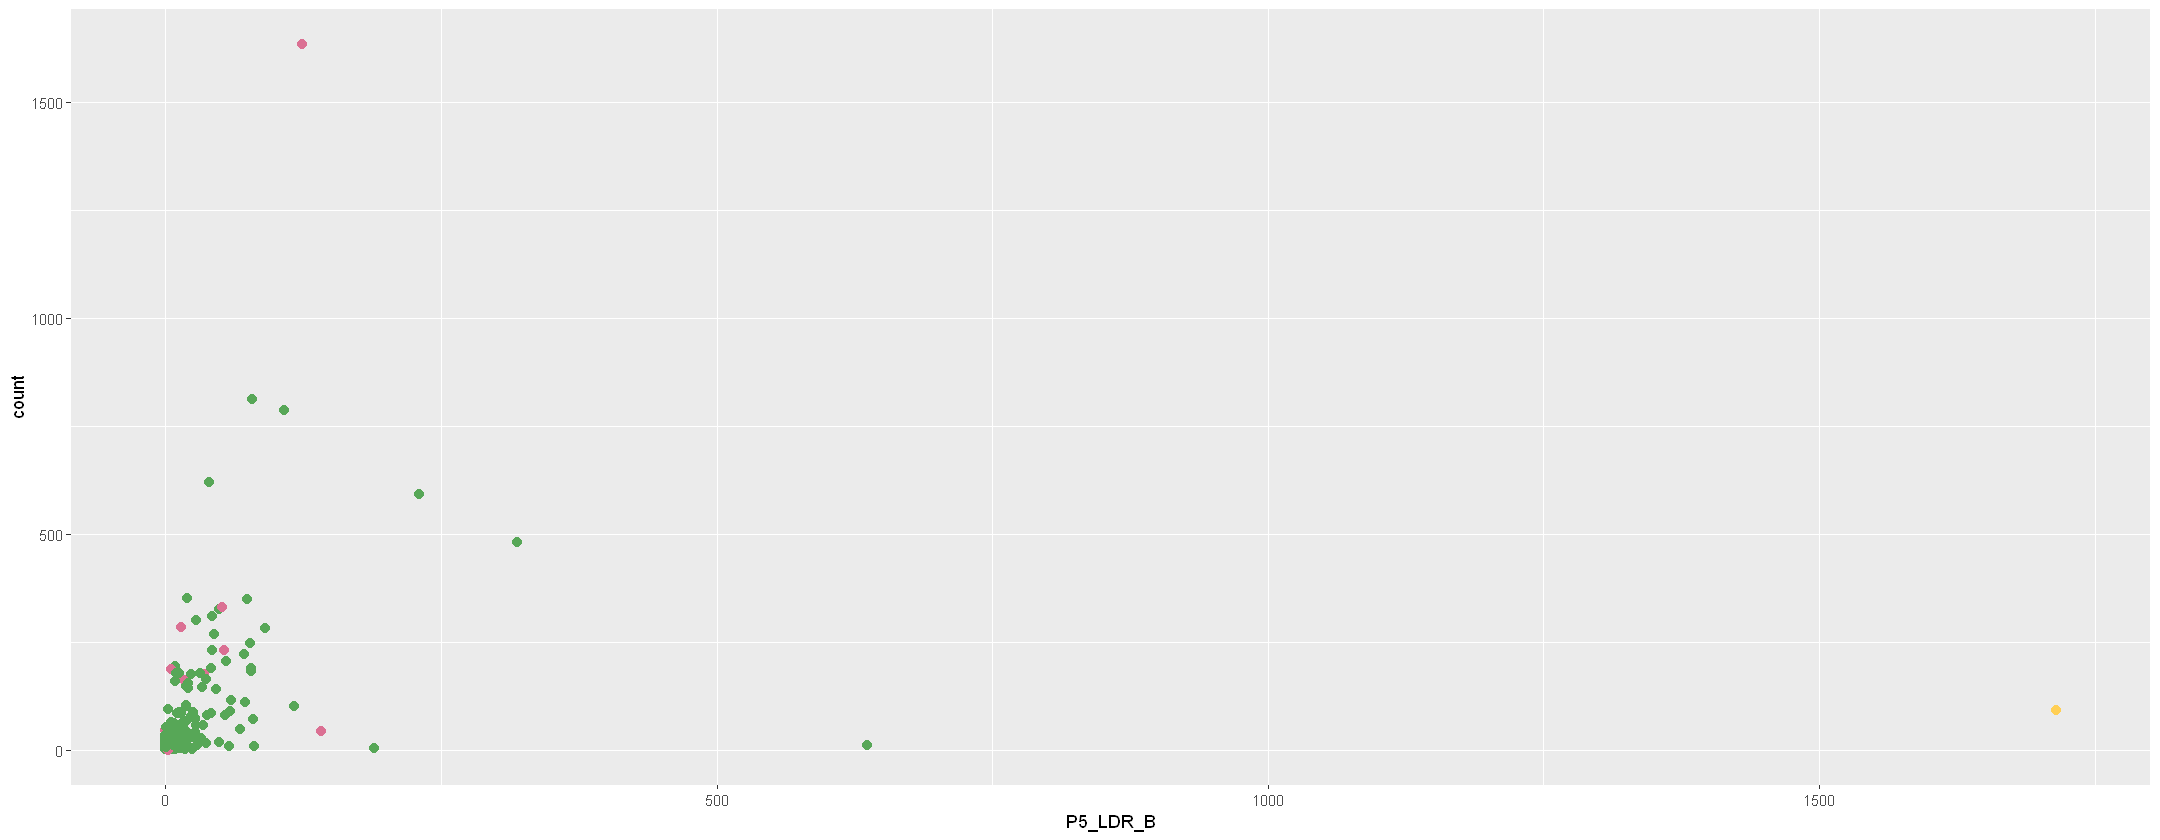

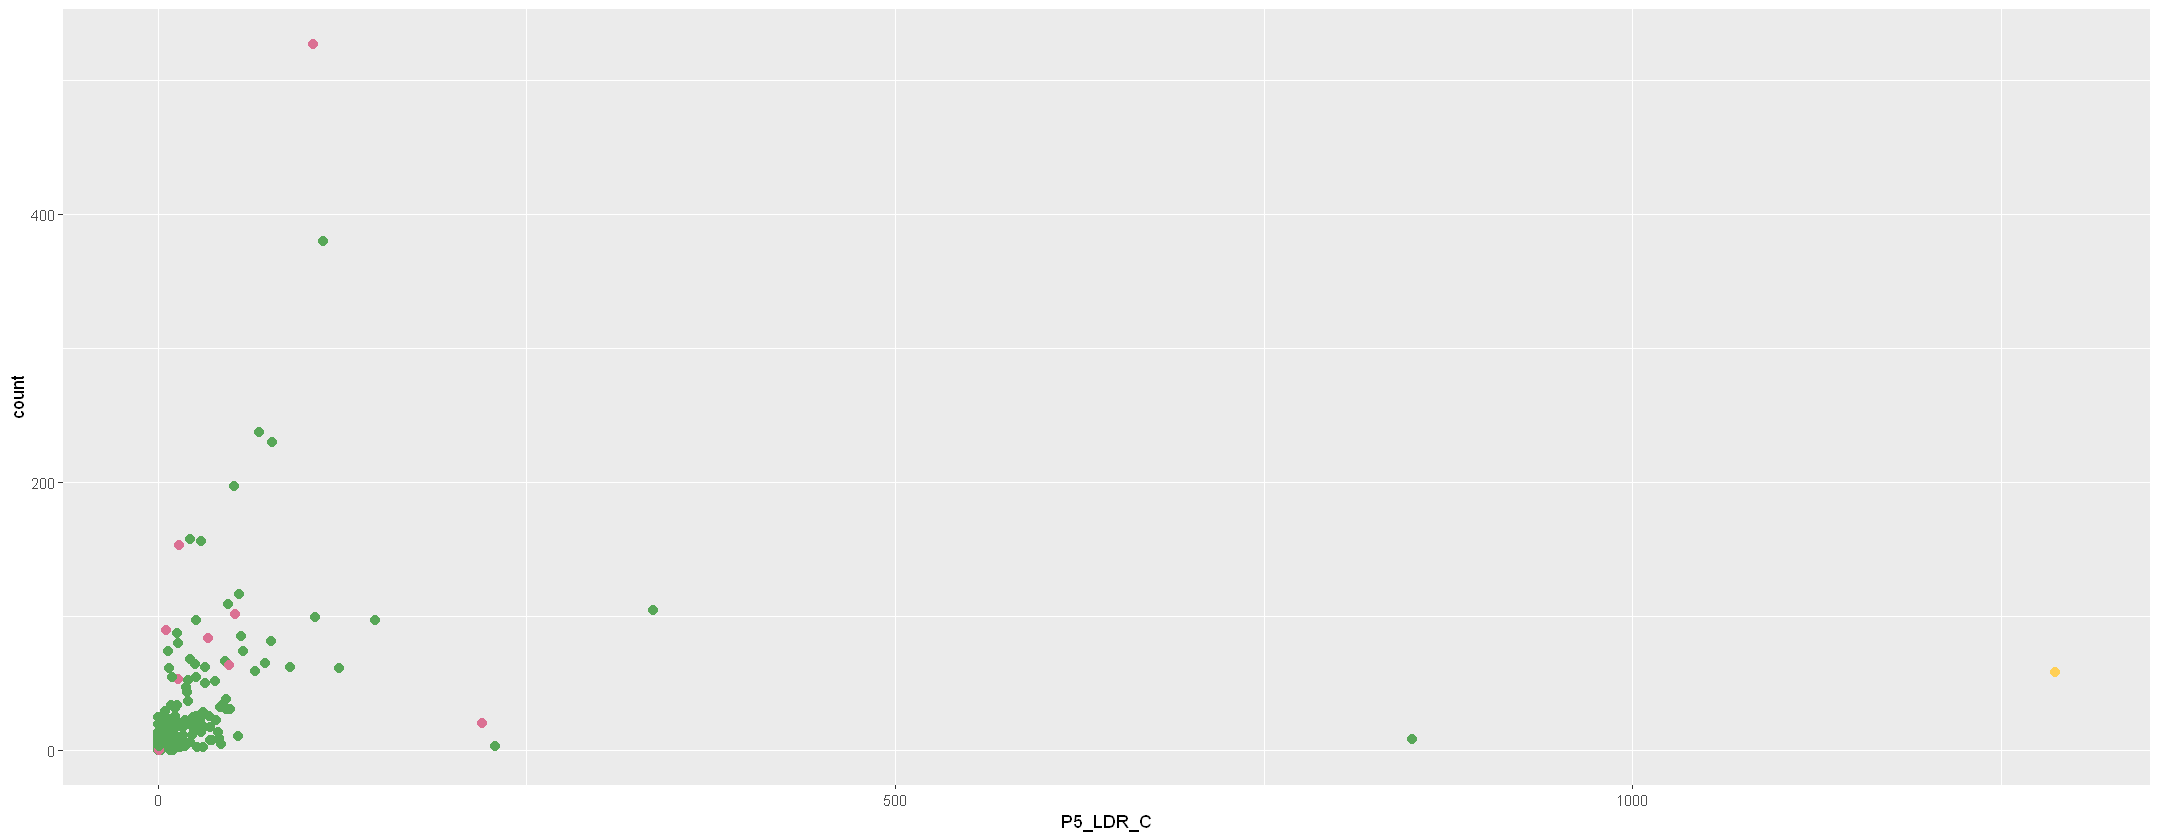

In [38]:
### Testing basal ROI
#####################

ROI_14B <- as.data.frame(t(read.csv("ROI_14B.csv", header=FALSE)))

ROI_14B <- ROI_14B[-1,]
colnames(ROI_14B) <- c("gene", "count")
rownames(ROI_14B) <- NULL
ROI_14B$count <- as.numeric(ROI_14B$count)

paragon_ROI_14B <- merge(paragon_panel, ROI_14B)

# dim(paragon_ROI_14B)
# head(paragon_ROI_14B)

cor.test(paragon_ROI_14B$P5_LDR_B, paragon_ROI_14B$count)
cor.test(paragon_ROI_14B$P5_LDR_B, paragon_ROI_14B$count, method="spearman")

ggplot(paragon_ROI_14B, aes(x=P5_LDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_14C <- as.data.frame(t(read.csv("ROI_14C.csv", header=FALSE)))

ROI_14C <- ROI_14C[-1,]
colnames(ROI_14C) <- c("gene", "count")
rownames(ROI_14C) <- NULL
ROI_14C$count <- as.numeric(ROI_14C$count)

paragon_ROI_14C <- merge(paragon_panel, ROI_14C)

# dim(paragon_ROI_14C)
# head(paragon_ROI_14C)

cor.test(paragon_ROI_14C$P5_LDR_C, paragon_ROI_14C$count)
cor.test(paragon_ROI_14C$P5_LDR_C, paragon_ROI_14C$count, method="spearman")

ggplot(paragon_ROI_14C, aes(x=P5_LDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_15


	Pearson's product-moment correlation

data:  paragon_ROI_15B$P5_LDR_B and paragon_ROI_15B$count
t = 3.5782, df = 198, p-value = 0.000435
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1115229 0.3724563
sample estimates:
      cor 
0.2464506 


Warning message in cor.test.default(paragon_ROI_15B$P5_LDR_B, paragon_ROI_15B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_15B$P5_LDR_B and paragon_ROI_15B$count
S = 470901, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6468154 



	Pearson's product-moment correlation

data:  paragon_ROI_15C$P5_LDR_C and paragon_ROI_15C$count
t = 3.7159, df = 198, p-value = 0.0002634
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1208684 0.3805867
sample estimates:
      cor 
0.2553277 


Warning message in cor.test.default(paragon_ROI_15C$P5_LDR_C, paragon_ROI_15C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_15C$P5_LDR_C and paragon_ROI_15C$count
S = 498816, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6258789 


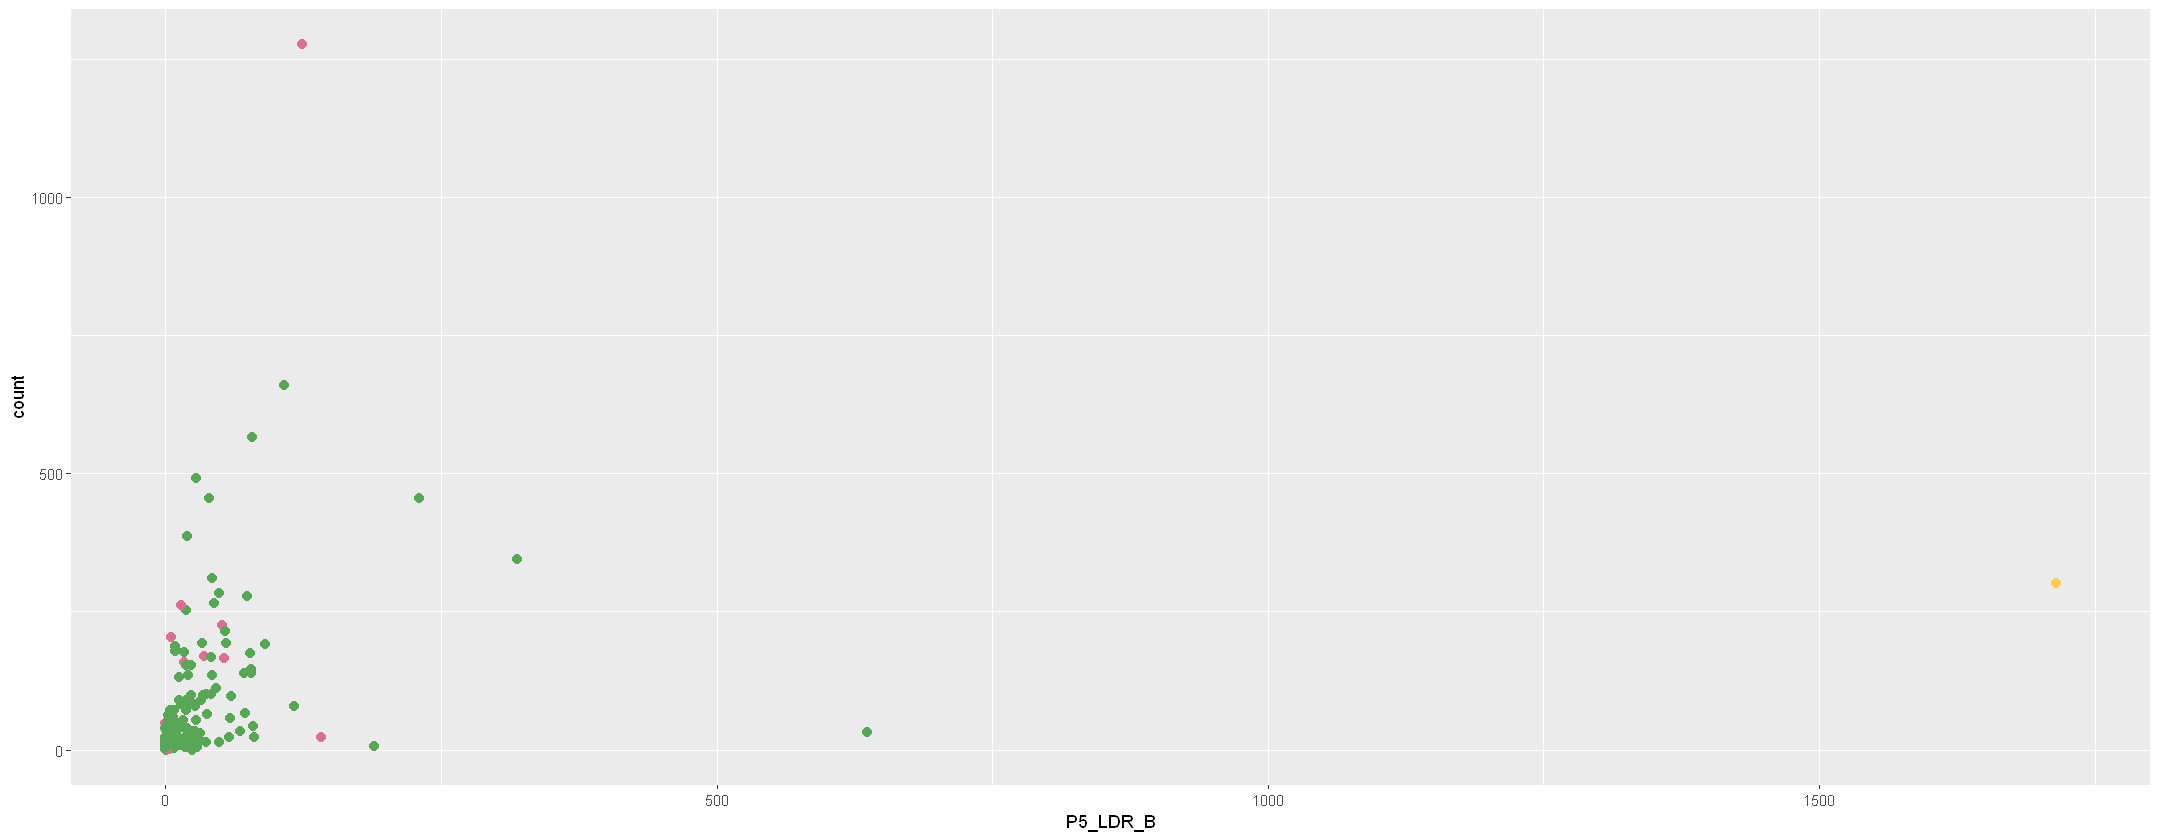

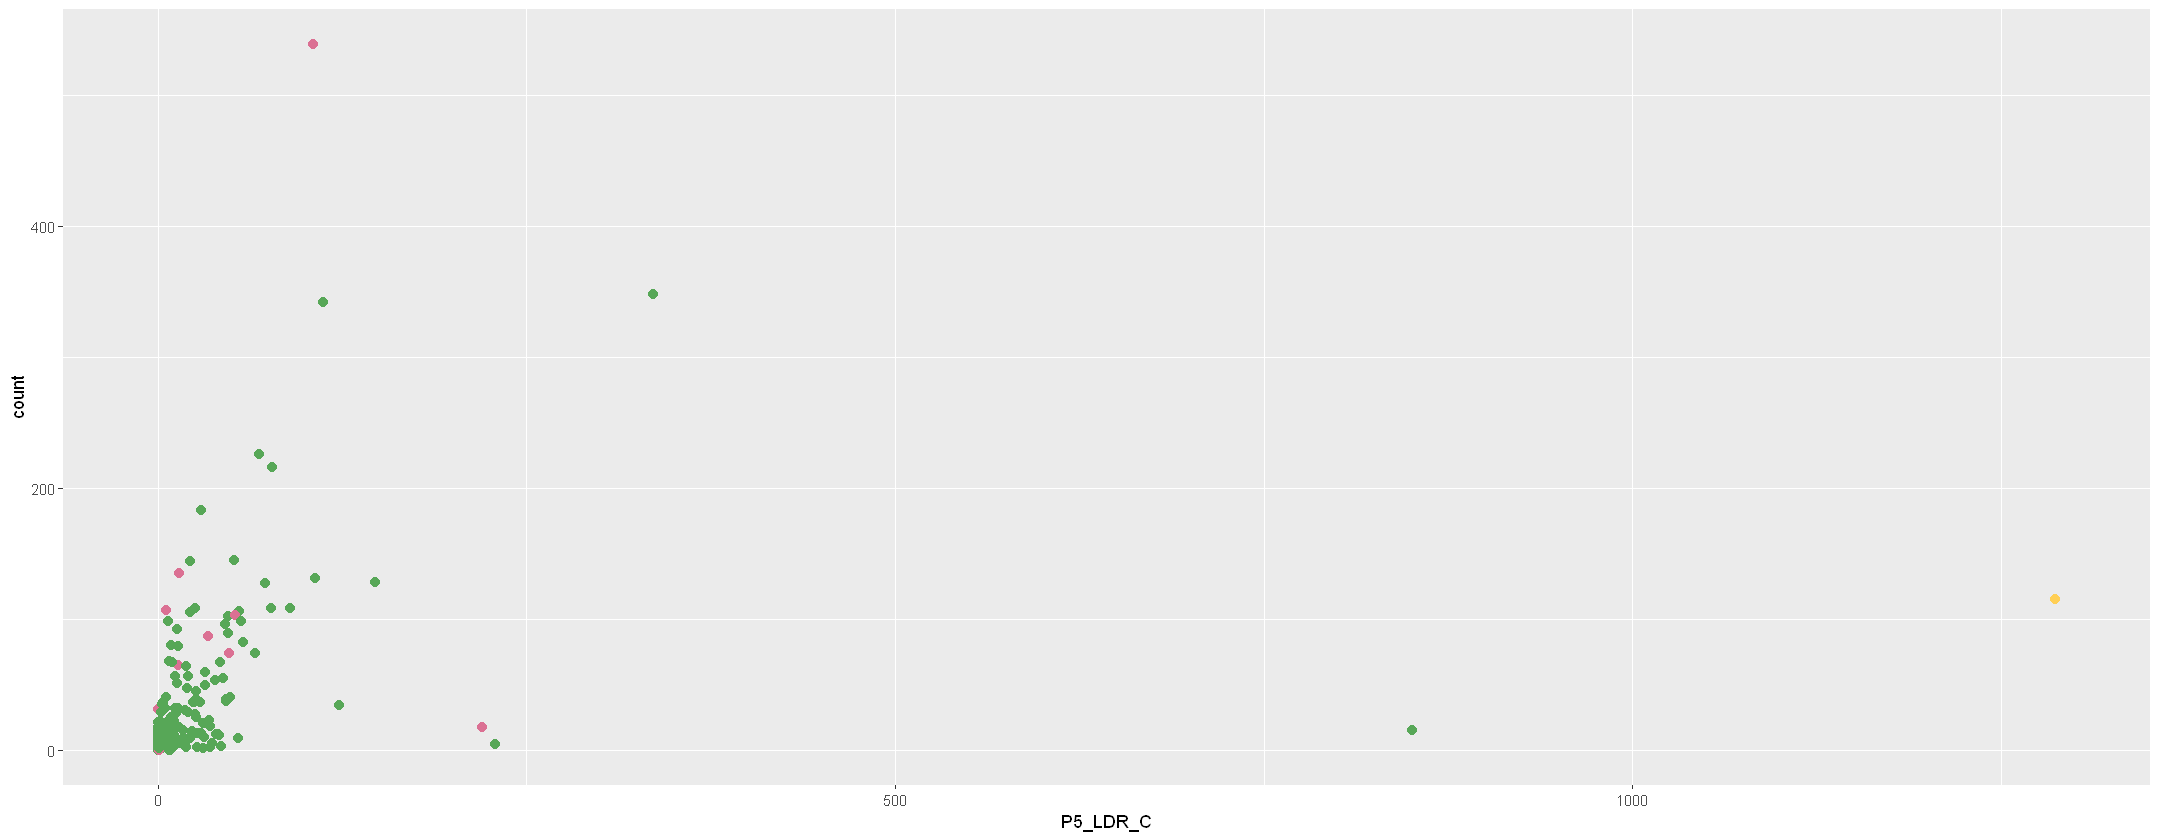

In [39]:
### Testing basal ROI
#####################

ROI_15B <- as.data.frame(t(read.csv("ROI_15B.csv", header=FALSE)))

ROI_15B <- ROI_15B[-1,]
colnames(ROI_15B) <- c("gene", "count")
rownames(ROI_15B) <- NULL
ROI_15B$count <- as.numeric(ROI_15B$count)

paragon_ROI_15B <- merge(paragon_panel, ROI_15B)

# dim(paragon_ROI_15B)
# head(paragon_ROI_15B)

cor.test(paragon_ROI_15B$P5_LDR_B, paragon_ROI_15B$count)
cor.test(paragon_ROI_15B$P5_LDR_B, paragon_ROI_15B$count, method="spearman")

ggplot(paragon_ROI_15B, aes(x=P5_LDR_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_15C <- as.data.frame(t(read.csv("ROI_15C.csv", header=FALSE)))

ROI_15C <- ROI_15C[-1,]
colnames(ROI_15C) <- c("gene", "count")
rownames(ROI_15C) <- NULL
ROI_15C$count <- as.numeric(ROI_15C$count)

paragon_ROI_15C <- merge(paragon_panel, ROI_15C)

# dim(paragon_ROI_15C)
# head(paragon_ROI_15C)

cor.test(paragon_ROI_15C$P5_LDR_C, paragon_ROI_15C$count)
cor.test(paragon_ROI_15C$P5_LDR_C, paragon_ROI_15C$count, method="spearman")

ggplot(paragon_ROI_15C, aes(x=P5_LDR_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_16


	Pearson's product-moment correlation

data:  paragon_ROI_16B$P5_LP_B and paragon_ROI_16B$count
t = 12.737, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5869850 0.7408392
sample estimates:
      cor 
0.6710744 


Warning message in cor.test.default(paragon_ROI_16B$P5_LP_B, paragon_ROI_16B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_16B$P5_LP_B and paragon_ROI_16B$count
S = 457141, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6571359 



	Pearson's product-moment correlation

data:  paragon_ROI_16C$P5_LP_C and paragon_ROI_16C$count
t = 4.1054, df = 198, p-value = 5.899e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1470555 0.4031569
sample estimates:
      cor 
0.2800821 


Warning message in cor.test.default(paragon_ROI_16C$P5_LP_C, paragon_ROI_16C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_16C$P5_LP_C and paragon_ROI_16C$count
S = 469586, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6478016 


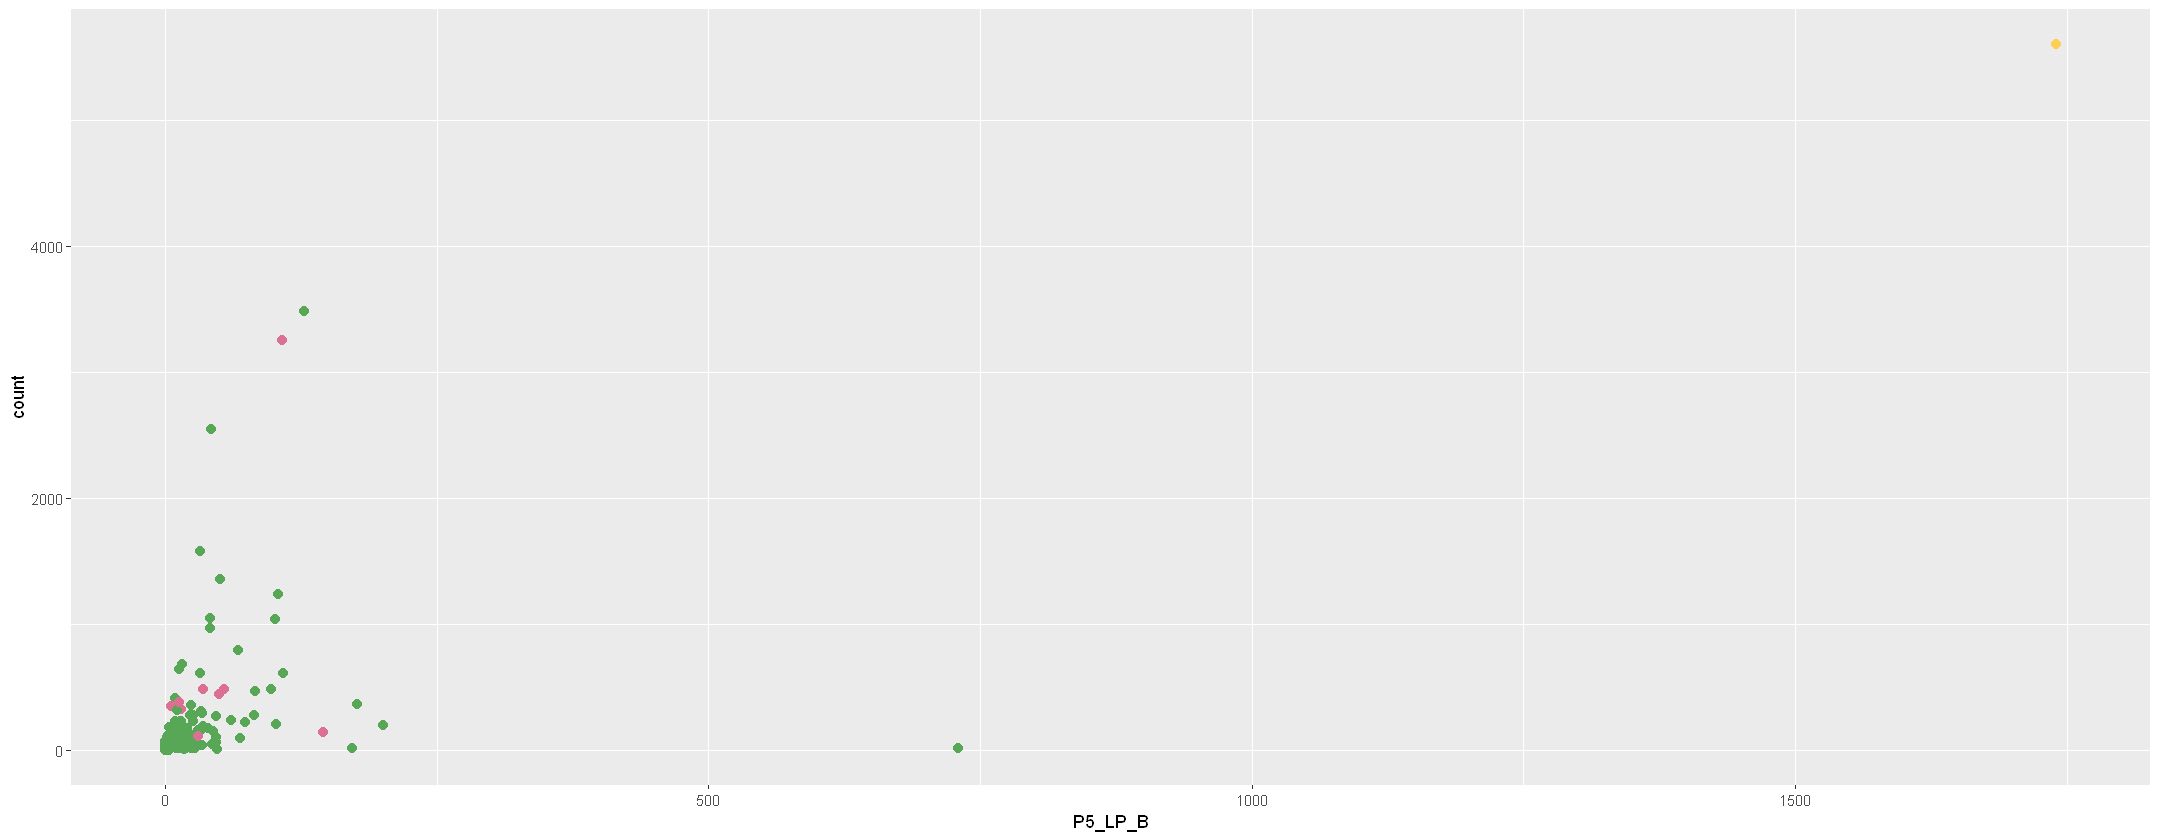

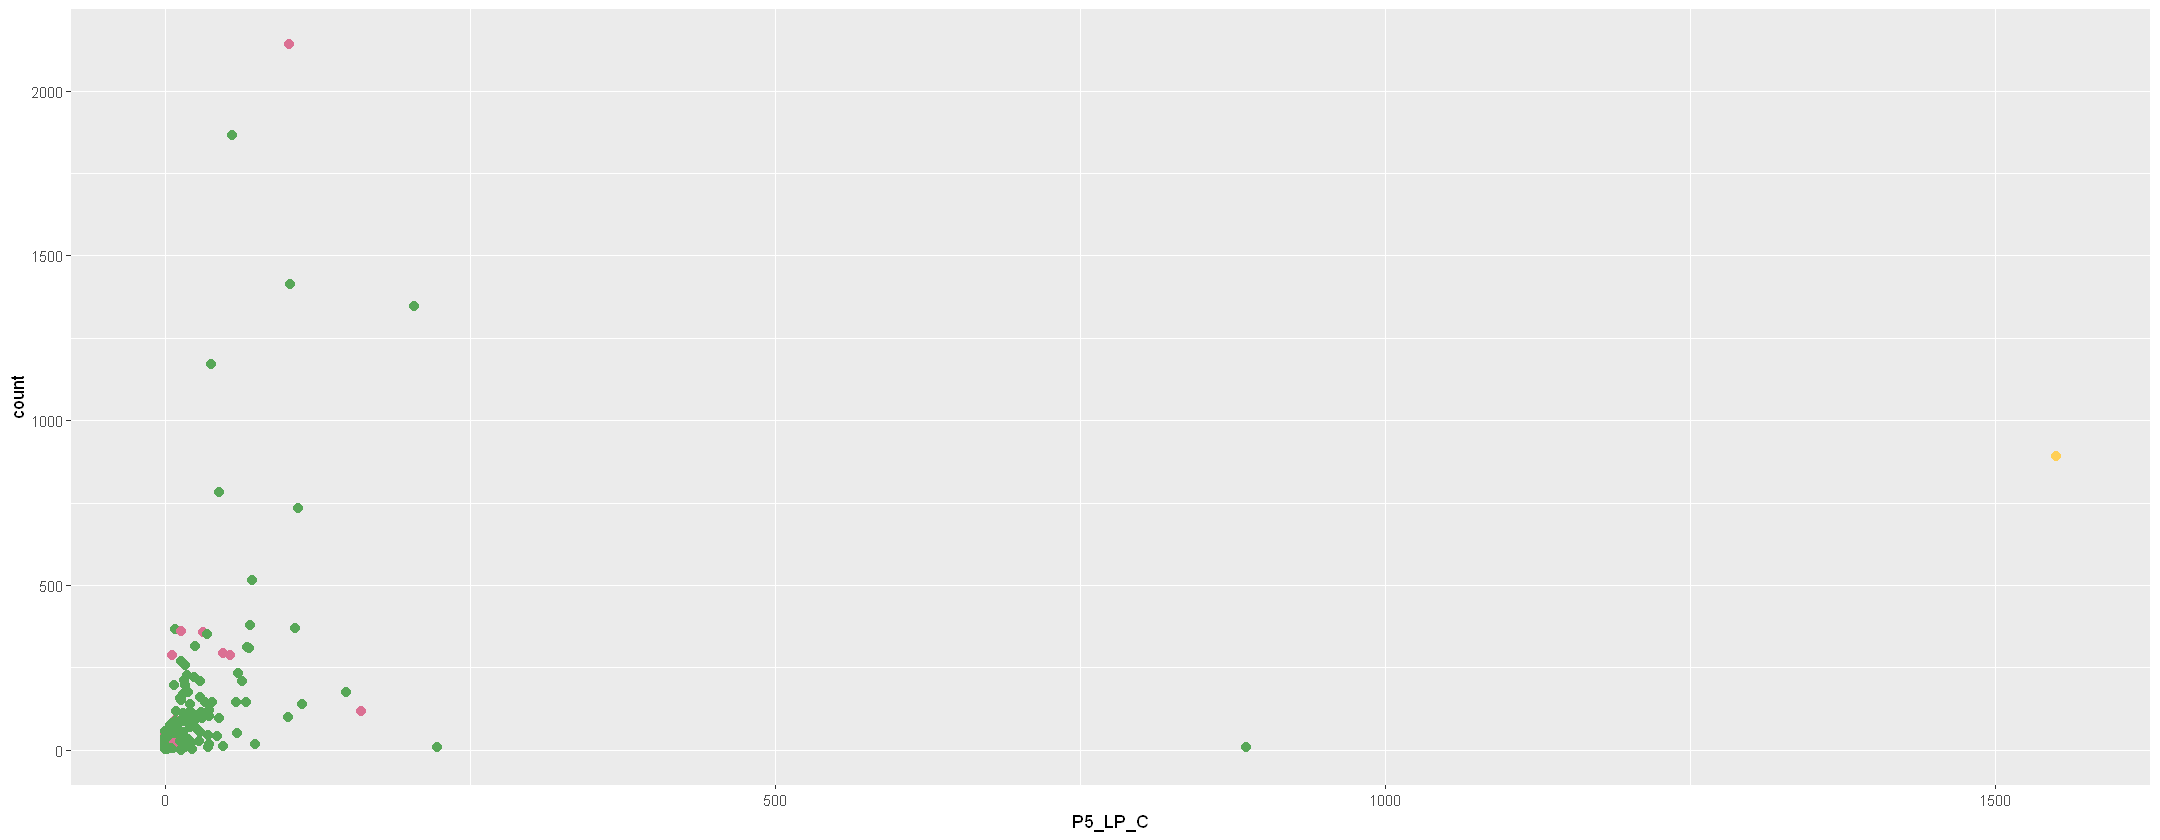

In [40]:
### Testing basal ROI
#####################

ROI_16B <- as.data.frame(t(read.csv("ROI_16B.csv", header=FALSE)))

ROI_16B <- ROI_16B[-1,]
colnames(ROI_16B) <- c("gene", "count")
rownames(ROI_16B) <- NULL
ROI_16B$count <- as.numeric(ROI_16B$count)

paragon_ROI_16B <- merge(paragon_panel, ROI_16B)

# dim(paragon_ROI_16B)
# head(paragon_ROI_16B)

cor.test(paragon_ROI_16B$P5_LP_B, paragon_ROI_16B$count)
cor.test(paragon_ROI_16B$P5_LP_B, paragon_ROI_16B$count, method="spearman")

ggplot(paragon_ROI_16B, aes(x=P5_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_16C <- as.data.frame(t(read.csv("ROI_16C.csv", header=FALSE)))

ROI_16C <- ROI_16C[-1,]
colnames(ROI_16C) <- c("gene", "count")
rownames(ROI_16C) <- NULL
ROI_16C$count <- as.numeric(ROI_16C$count)

paragon_ROI_16C <- merge(paragon_panel, ROI_16C)

# dim(paragon_ROI_16C)
# head(paragon_ROI_16C)

cor.test(paragon_ROI_16C$P5_LP_C, paragon_ROI_16C$count)
cor.test(paragon_ROI_16C$P5_LP_C, paragon_ROI_16C$count, method="spearman")

ggplot(paragon_ROI_16C, aes(x=P5_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_17


	Pearson's product-moment correlation

data:  paragon_ROI_17B$P5_LP_B and paragon_ROI_17B$count
t = 6.3444, df = 198, p-value = 1.488e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2887541 0.5201095
sample estimates:
      cor 
0.4110285 


Warning message in cor.test.default(paragon_ROI_17B$P5_LP_B, paragon_ROI_17B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_17B$P5_LP_B and paragon_ROI_17B$count
S = 537732, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.596691 



	Pearson's product-moment correlation

data:  paragon_ROI_17C$P5_LP_C and paragon_ROI_17C$count
t = 2.5189, df = 198, p-value = 0.01256
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03840666 0.30743380
sample estimates:
      cor 
0.1762087 


Warning message in cor.test.default(paragon_ROI_17C$P5_LP_C, paragon_ROI_17C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_17C$P5_LP_C and paragon_ROI_17C$count
S = 514517, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6141023 


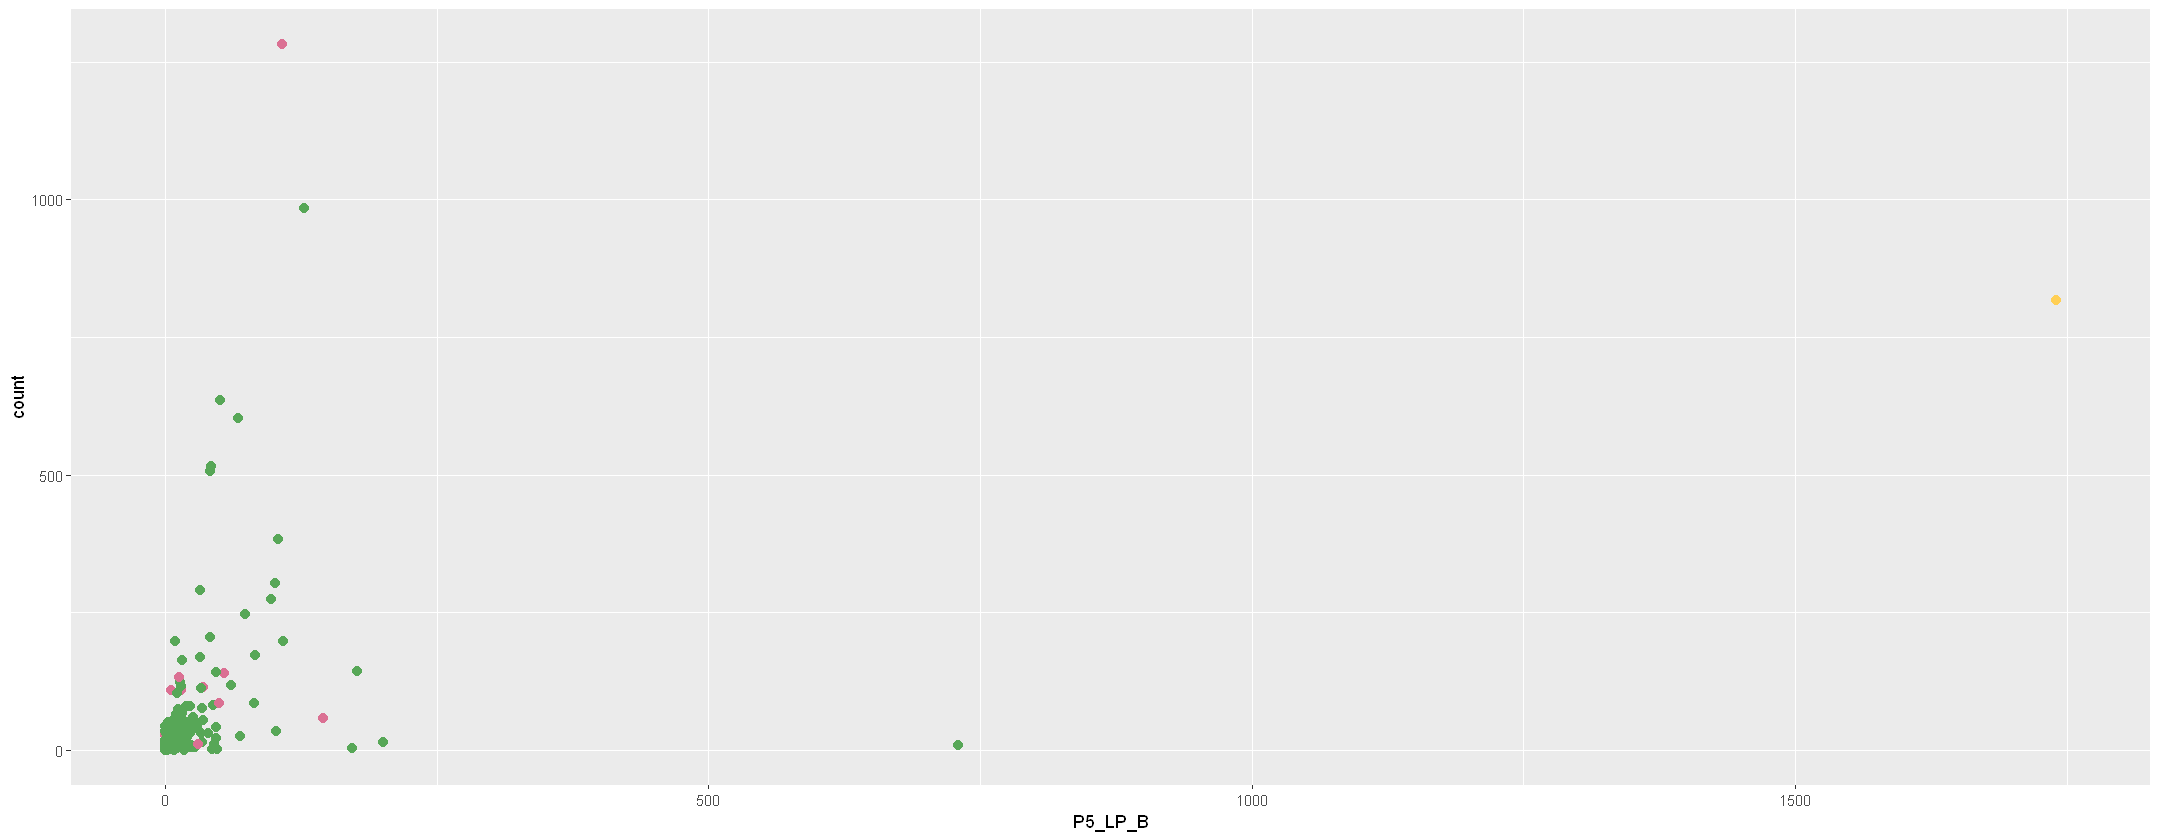

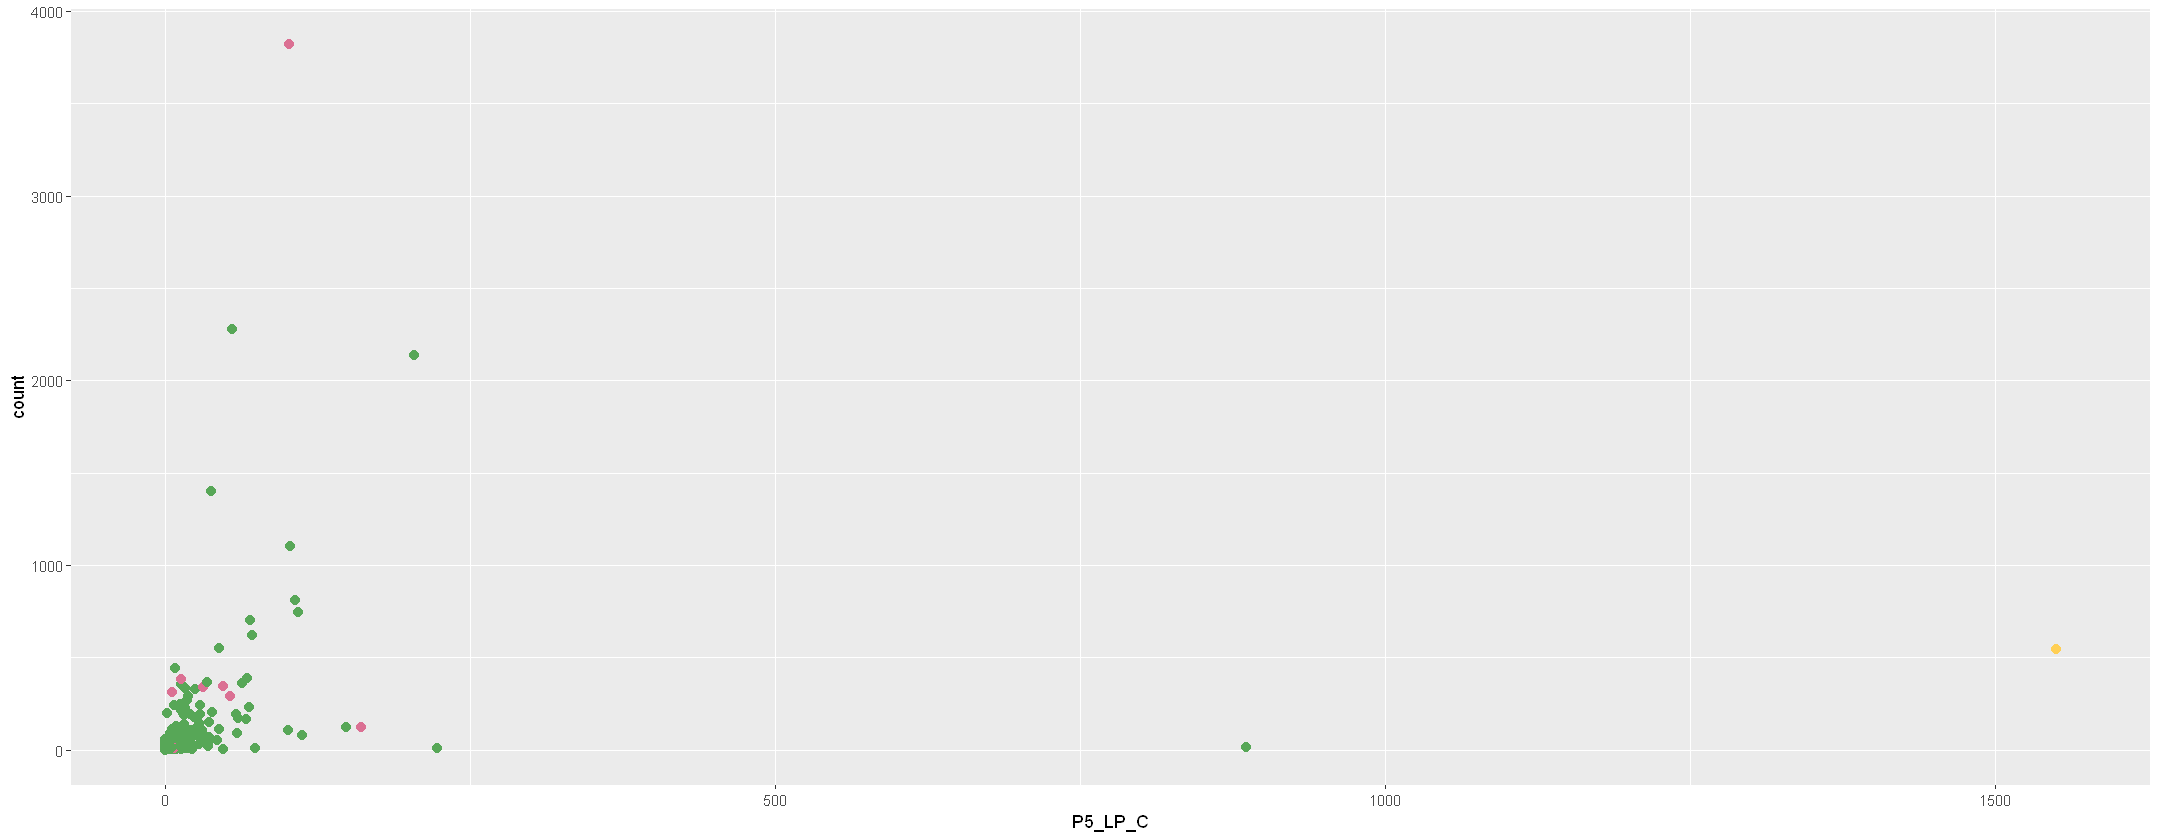

In [41]:
### Testing basal ROI
#####################

ROI_17B <- as.data.frame(t(read.csv("ROI_17B.csv", header=FALSE)))

ROI_17B <- ROI_17B[-1,]
colnames(ROI_17B) <- c("gene", "count")
rownames(ROI_17B) <- NULL
ROI_17B$count <- as.numeric(ROI_17B$count)

paragon_ROI_17B <- merge(paragon_panel, ROI_17B)

# dim(paragon_ROI_17B)
# head(paragon_ROI_17B)

cor.test(paragon_ROI_17B$P5_LP_B, paragon_ROI_17B$count)
cor.test(paragon_ROI_17B$P5_LP_B, paragon_ROI_17B$count, method="spearman")

ggplot(paragon_ROI_17B, aes(x=P5_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_17C <- as.data.frame(t(read.csv("ROI_17C.csv", header=FALSE)))

ROI_17C <- ROI_17C[-1,]
colnames(ROI_17C) <- c("gene", "count")
rownames(ROI_17C) <- NULL
ROI_17C$count <- as.numeric(ROI_17C$count)

paragon_ROI_17C <- merge(paragon_panel, ROI_17C)

# dim(paragon_ROI_17C)
# head(paragon_ROI_17C)

cor.test(paragon_ROI_17C$P5_LP_C, paragon_ROI_17C$count)
cor.test(paragon_ROI_17C$P5_LP_C, paragon_ROI_17C$count, method="spearman")

ggplot(paragon_ROI_17C, aes(x=P5_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_18


	Pearson's product-moment correlation

data:  paragon_ROI_18B$P5_LP_B and paragon_ROI_18B$count
t = 8.4599, df = 198, p-value = 5.871e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4055102 0.6103690
sample estimates:
      cor 
0.5152621 


Warning message in cor.test.default(paragon_ROI_18B$P5_LP_B, paragon_ROI_18B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_18B$P5_LP_B and paragon_ROI_18B$count
S = 455395, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.658445 



	Pearson's product-moment correlation

data:  paragon_ROI_18C$P5_LP_C and paragon_ROI_18C$count
t = 3.9972, df = 198, p-value = 9.042e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1398146 0.3969471
sample estimates:
     cor 
0.273255 


Warning message in cor.test.default(paragon_ROI_18C$P5_LP_C, paragon_ROI_18C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_18C$P5_LP_C and paragon_ROI_18C$count
S = 512890, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6153231 


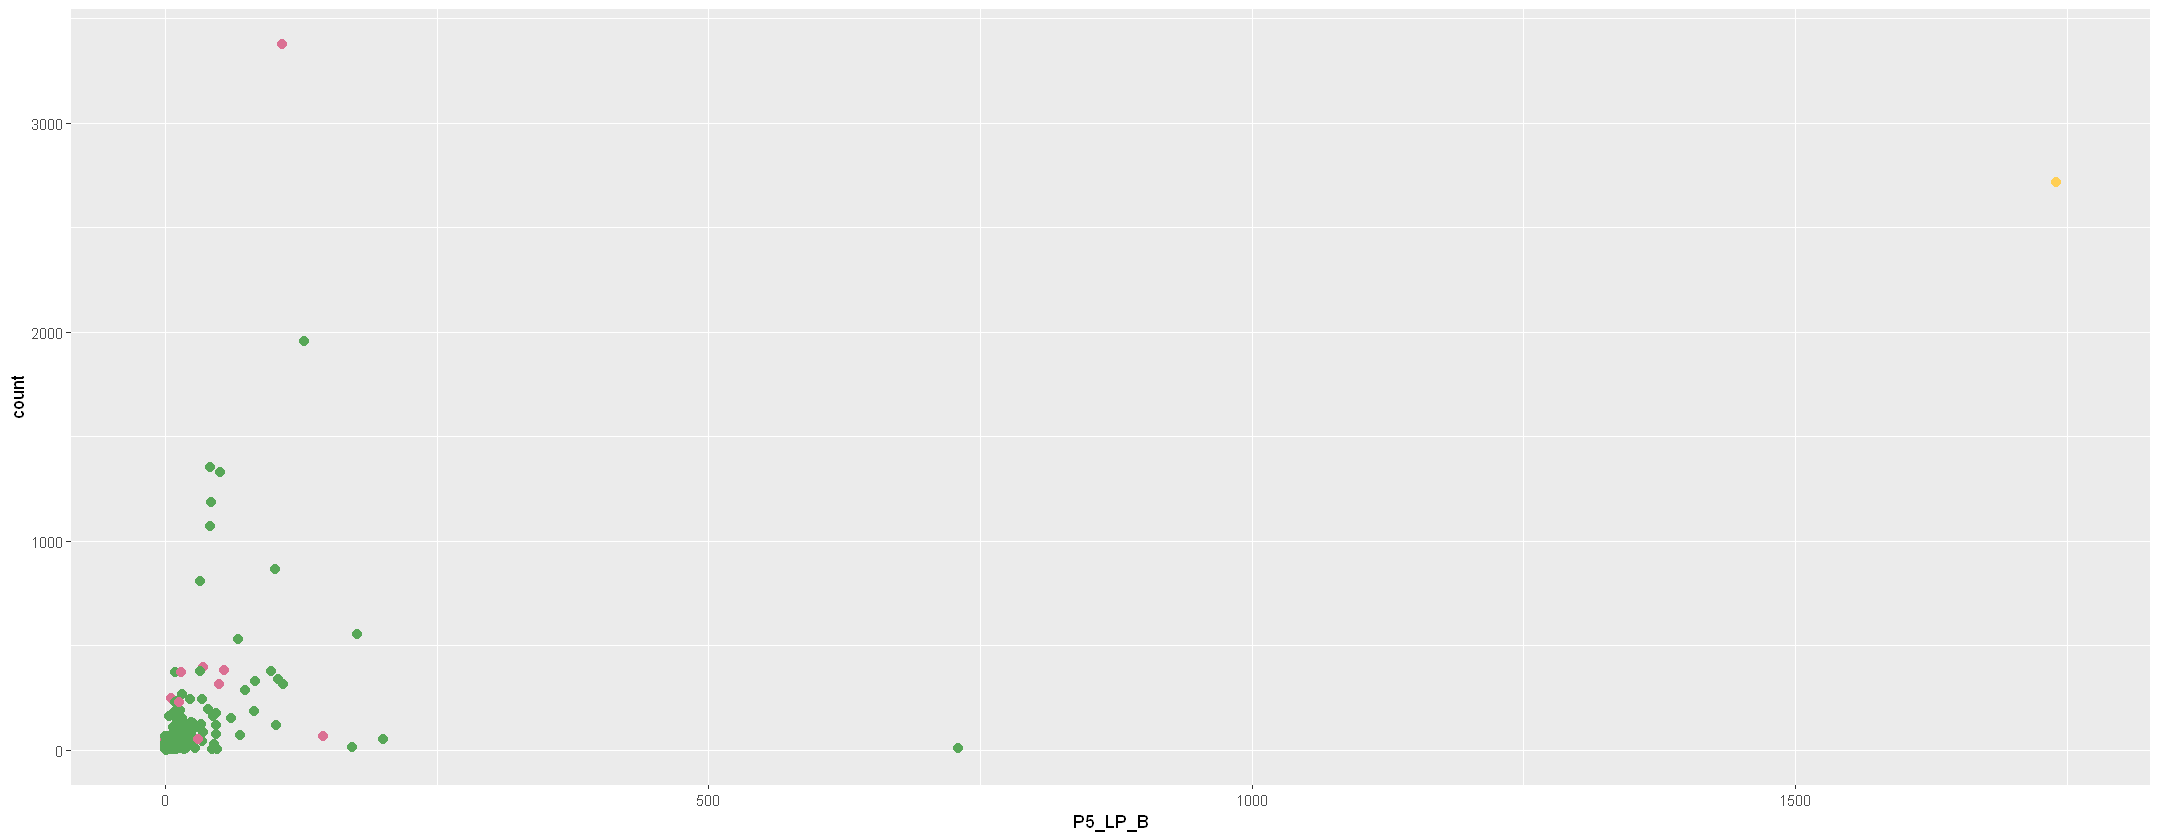

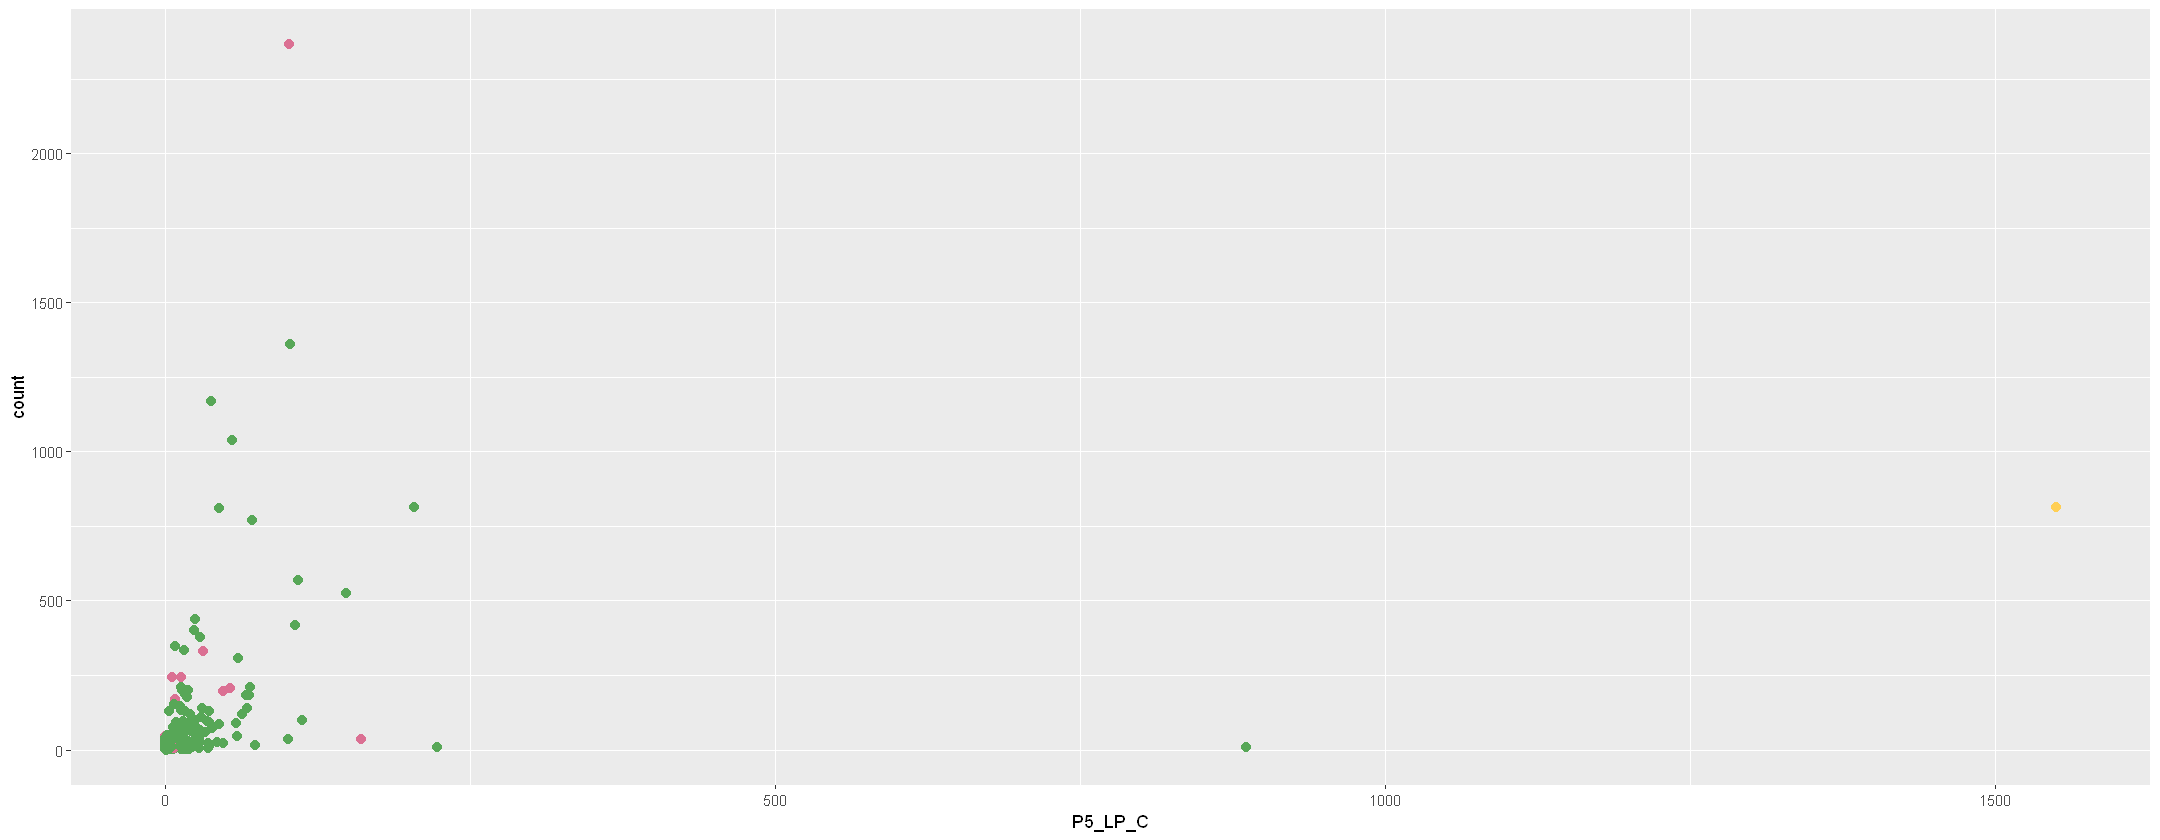

In [42]:
### Testing basal ROI
#####################

ROI_18B <- as.data.frame(t(read.csv("ROI_18B.csv", header=FALSE)))

ROI_18B <- ROI_18B[-1,]
colnames(ROI_18B) <- c("gene", "count")
rownames(ROI_18B) <- NULL
ROI_18B$count <- as.numeric(ROI_18B$count)

paragon_ROI_18B <- merge(paragon_panel, ROI_18B)

# dim(paragon_ROI_18B)
# head(paragon_ROI_18B)

cor.test(paragon_ROI_18B$P5_LP_B, paragon_ROI_18B$count)
cor.test(paragon_ROI_18B$P5_LP_B, paragon_ROI_18B$count, method="spearman")

ggplot(paragon_ROI_18B, aes(x=P5_LP_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_18C <- as.data.frame(t(read.csv("ROI_18C.csv", header=FALSE)))

ROI_18C <- ROI_18C[-1,]
colnames(ROI_18C) <- c("gene", "count")
rownames(ROI_18C) <- NULL
ROI_18C$count <- as.numeric(ROI_18C$count)

paragon_ROI_18C <- merge(paragon_panel, ROI_18C)

# dim(paragon_ROI_18C)
# head(paragon_ROI_18C)

cor.test(paragon_ROI_18C$P5_LP_C, paragon_ROI_18C$count)
cor.test(paragon_ROI_18C$P5_LP_C, paragon_ROI_18C$count, method="spearman")

ggplot(paragon_ROI_18C, aes(x=P5_LP_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_19


	Pearson's product-moment correlation

data:  paragon_ROI_19B$P5_TS_B and paragon_ROI_19B$count
t = 3.1776, df = 198, p-value = 0.001723
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08410772 0.34837245
sample estimates:
      cor 
0.2202783 


Warning message in cor.test.default(paragon_ROI_19B$P5_TS_B, paragon_ROI_19B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_19B$P5_TS_B and paragon_ROI_19B$count
S = 460414, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6546805 



	Pearson's product-moment correlation

data:  paragon_ROI_19C$P5_TS_C and paragon_ROI_19C$count
t = 3.1816, df = 198, p-value = 0.001701
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08438013 0.34861349
sample estimates:
      cor 
0.2205393 


Warning message in cor.test.default(paragon_ROI_19C$P5_TS_C, paragon_ROI_19C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_19C$P5_TS_C and paragon_ROI_19C$count
S = 486875, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6348343 


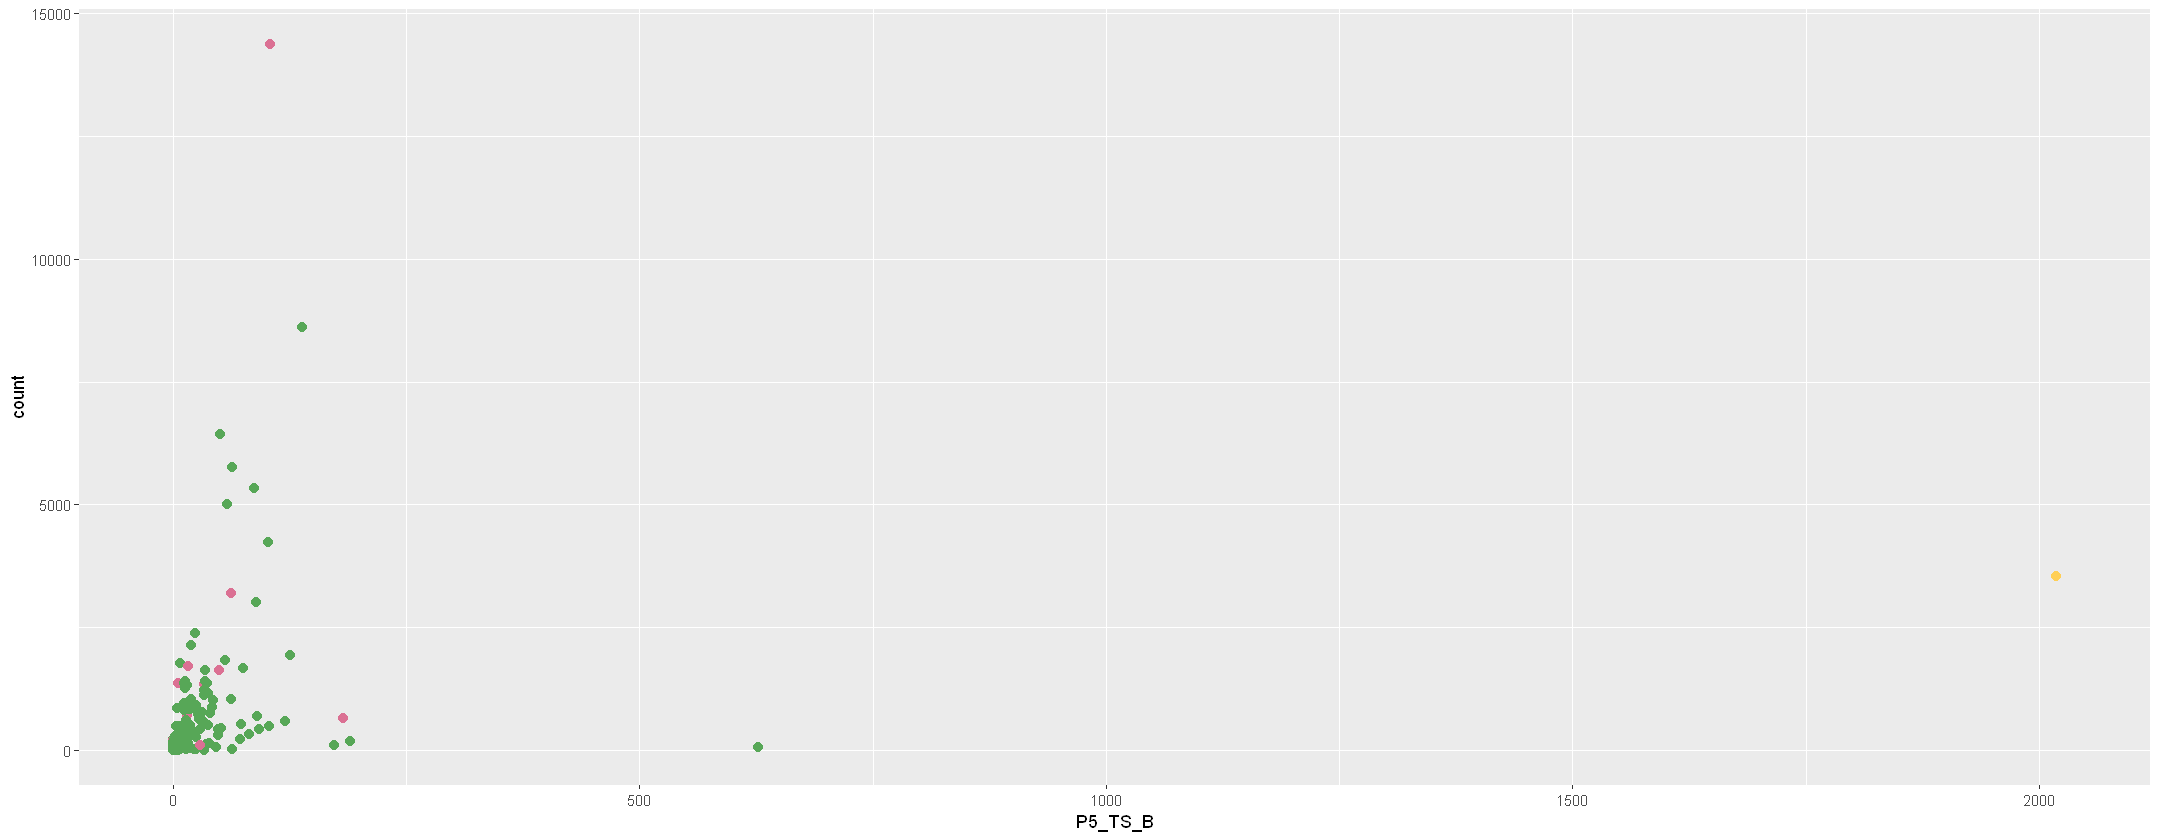

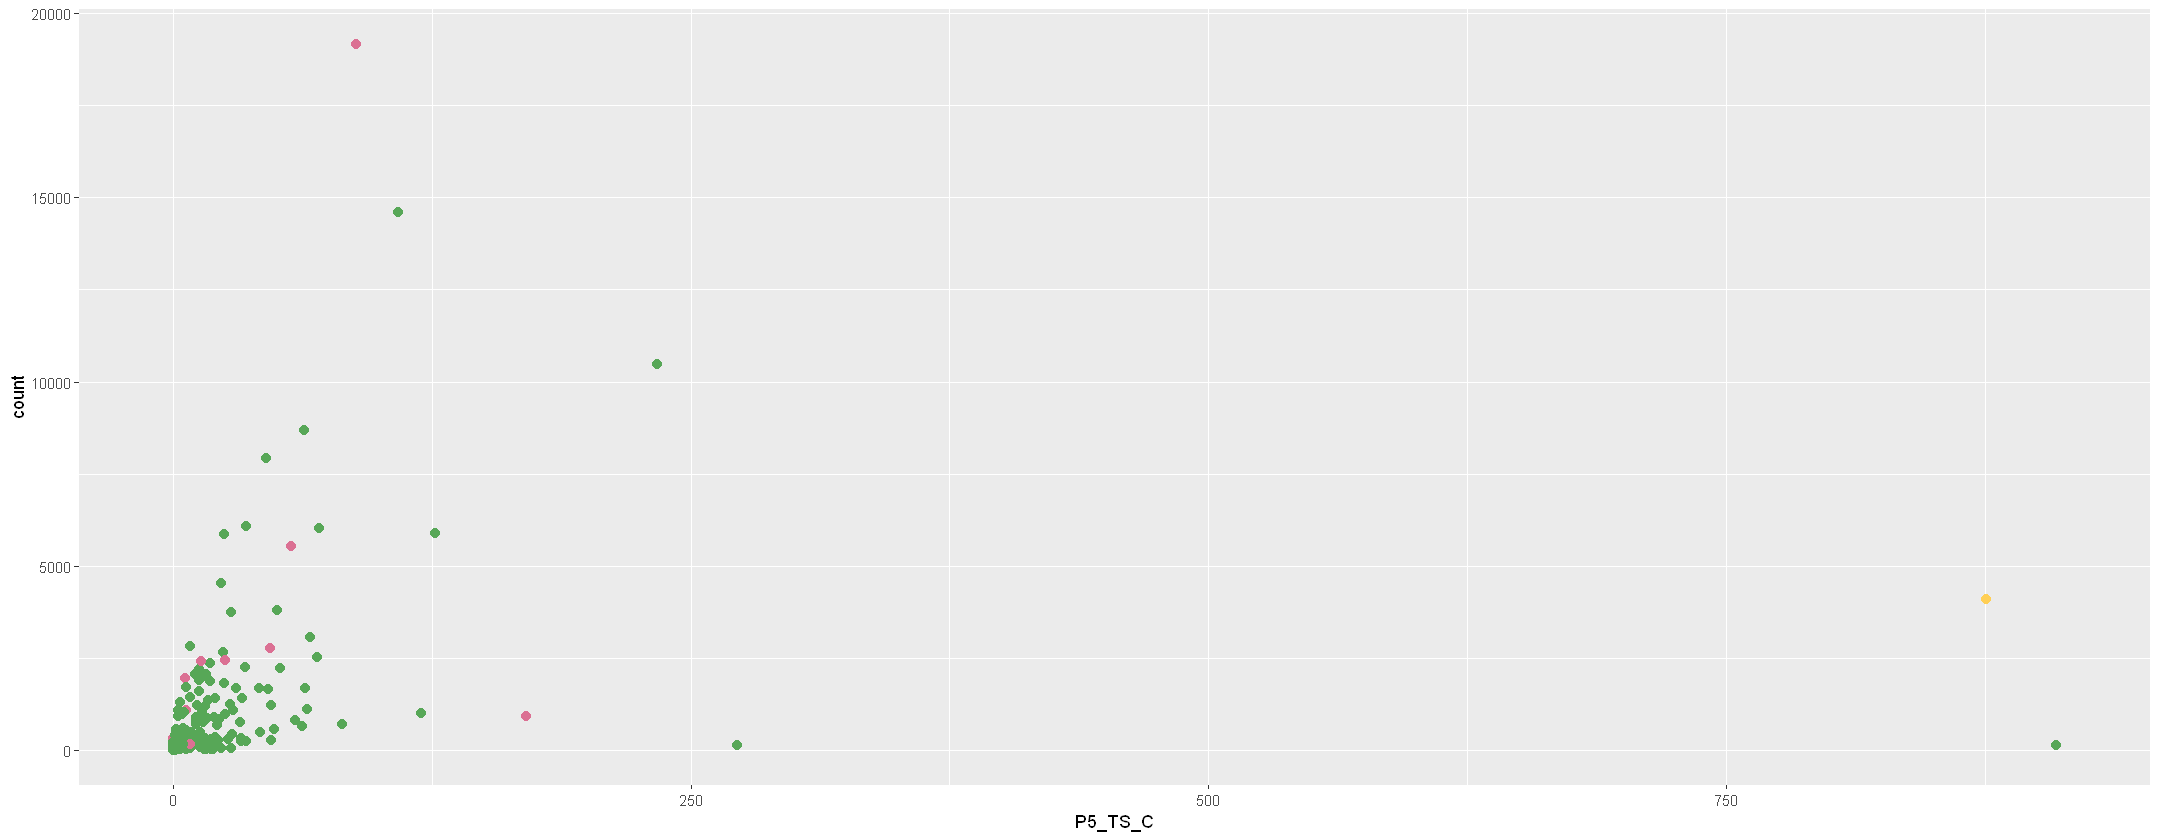

In [43]:
### Testing basal ROI
#####################

ROI_19B <- as.data.frame(t(read.csv("ROI_19B.csv", header=FALSE)))

ROI_19B <- ROI_19B[-1,]
colnames(ROI_19B) <- c("gene", "count")
rownames(ROI_19B) <- NULL
ROI_19B$count <- as.numeric(ROI_19B$count)

paragon_ROI_19B <- merge(paragon_panel, ROI_19B)

# dim(paragon_ROI_19B)
# head(paragon_ROI_19B)

cor.test(paragon_ROI_19B$P5_TS_B, paragon_ROI_19B$count)
cor.test(paragon_ROI_19B$P5_TS_B, paragon_ROI_19B$count, method="spearman")

ggplot(paragon_ROI_19B, aes(x=P5_TS_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_19C <- as.data.frame(t(read.csv("ROI_19C.csv", header=FALSE)))

ROI_19C <- ROI_19C[-1,]
colnames(ROI_19C) <- c("gene", "count")
rownames(ROI_19C) <- NULL
ROI_19C$count <- as.numeric(ROI_19C$count)

paragon_ROI_19C <- merge(paragon_panel, ROI_19C)

# dim(paragon_ROI_19C)
# head(paragon_ROI_19C)

cor.test(paragon_ROI_19C$P5_TS_C, paragon_ROI_19C$count)
cor.test(paragon_ROI_19C$P5_TS_C, paragon_ROI_19C$count, method="spearman")

ggplot(paragon_ROI_19C, aes(x=P5_TS_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_20


	Pearson's product-moment correlation

data:  paragon_ROI_20B$P5_LT_B and paragon_ROI_20B$count
t = 2.5605, df = 198, p-value = 0.0112
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04130969 0.31006427
sample estimates:
      cor 
0.1790246 


Warning message in cor.test.default(paragon_ROI_20B$P5_LT_B, paragon_ROI_20B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_20B$P5_LT_B and paragon_ROI_20B$count
S = 454577, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6590589 



	Pearson's product-moment correlation

data:  paragon_ROI_20C$P5_LT_C and paragon_ROI_20C$count
t = 1.8346, df = 198, p-value = 0.06806
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.009627226  0.263304510
sample estimates:
      cor 
0.1292865 


Warning message in cor.test.default(paragon_ROI_20C$P5_LT_C, paragon_ROI_20C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_20C$P5_LT_C and paragon_ROI_20C$count
S = 414085, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6894288 


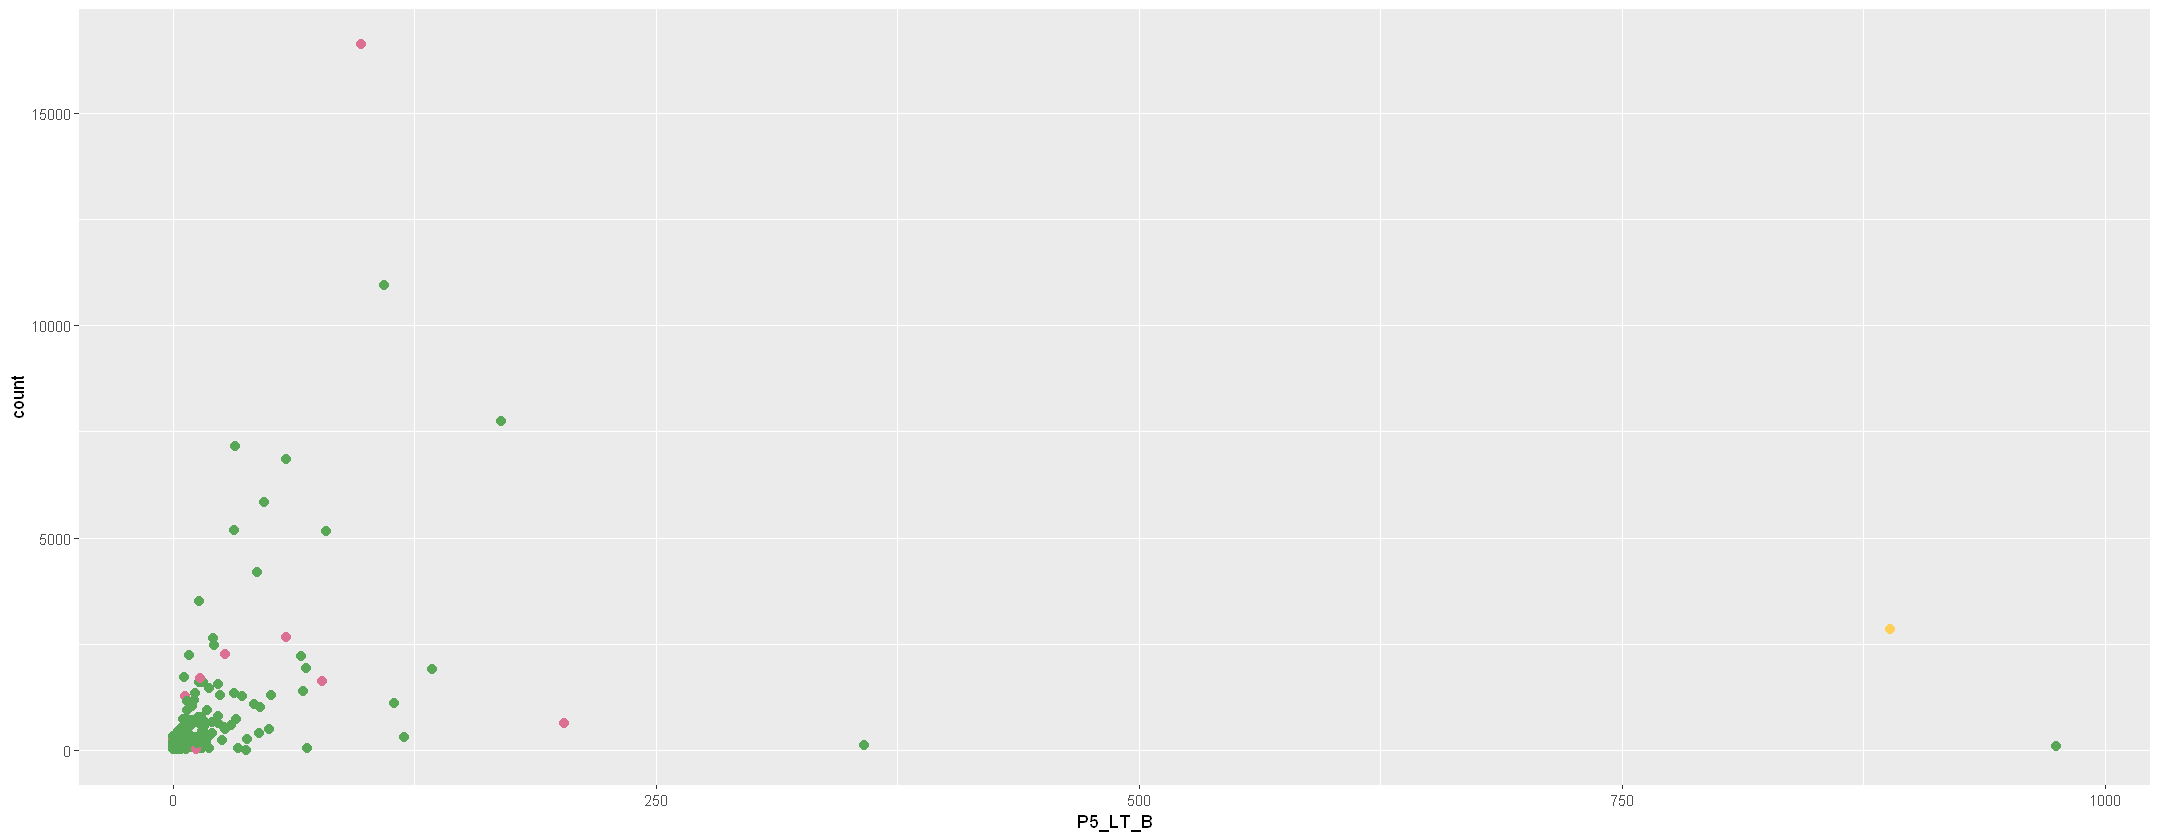

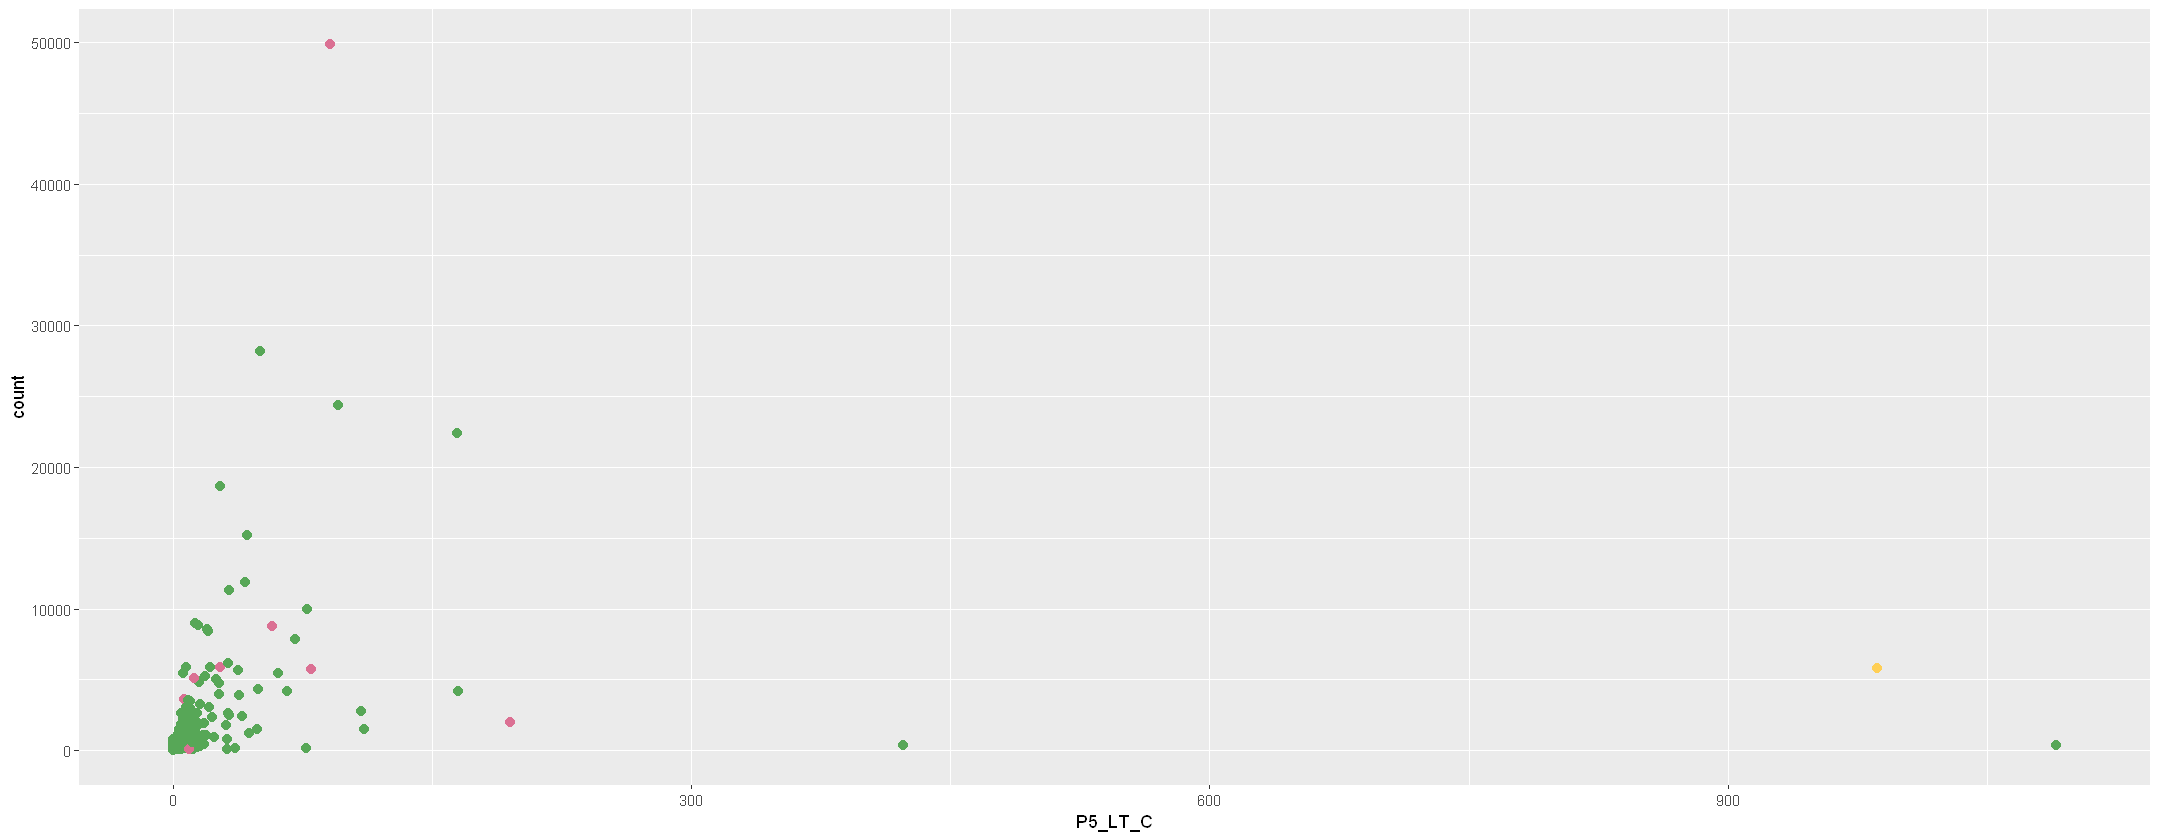

In [58]:
### Testing basal ROI
#####################

ROI_20B <- as.data.frame(t(read.csv("ROI_20B.csv", header=FALSE)))

ROI_20B <- ROI_20B[-1,]
colnames(ROI_20B) <- c("gene", "count")
rownames(ROI_20B) <- NULL
ROI_20B$count <- as.numeric(ROI_20B$count)

paragon_ROI_20B <- merge(paragon_panel, ROI_20B)

# dim(paragon_ROI_20B)
# head(paragon_ROI_20B)

cor.test(paragon_ROI_20B$P5_LT_B, paragon_ROI_20B$count)
cor.test(paragon_ROI_20B$P5_LT_B, paragon_ROI_20B$count, method="spearman")

ggplot(paragon_ROI_20B, aes(x=P5_LT_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_20C <- as.data.frame(t(read.csv("ROI_20C.csv", header=FALSE)))

ROI_20C <- ROI_20C[-1,]
colnames(ROI_20C) <- c("gene", "count")
rownames(ROI_20C) <- NULL
ROI_20C$count <- as.numeric(ROI_20C$count)

paragon_ROI_20C <- merge(paragon_panel, ROI_20C)

# dim(paragon_ROI_20C)
# head(paragon_ROI_20C)

cor.test(paragon_ROI_20C$P5_LT_C, paragon_ROI_20C$count)
cor.test(paragon_ROI_20C$P5_LT_C, paragon_ROI_20C$count, method="spearman")

ggplot(paragon_ROI_20C, aes(x=P5_LT_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing ROI_21


	Pearson's product-moment correlation

data:  paragon_ROI_21B$P5_LT_B and paragon_ROI_21B$count
t = 2.4439, df = 198, p-value = 0.01541
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03316481 0.30267365
sample estimates:
      cor 
0.1711185 


Warning message in cor.test.default(paragon_ROI_21B$P5_LT_B, paragon_ROI_21B$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_21B$P5_LT_B and paragon_ROI_21B$count
S = 428944, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.678284 



	Pearson's product-moment correlation

data:  paragon_ROI_21C$P5_LT_C and paragon_ROI_21C$count
t = 2.2601, df = 198, p-value = 0.0249
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0202923 0.2909267
sample estimates:
      cor 
0.1585868 


Warning message in cor.test.default(paragon_ROI_21C$P5_LT_C, paragon_ROI_21C$count, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_ROI_21C$P5_LT_C and paragon_ROI_21C$count
S = 412733, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6904427 


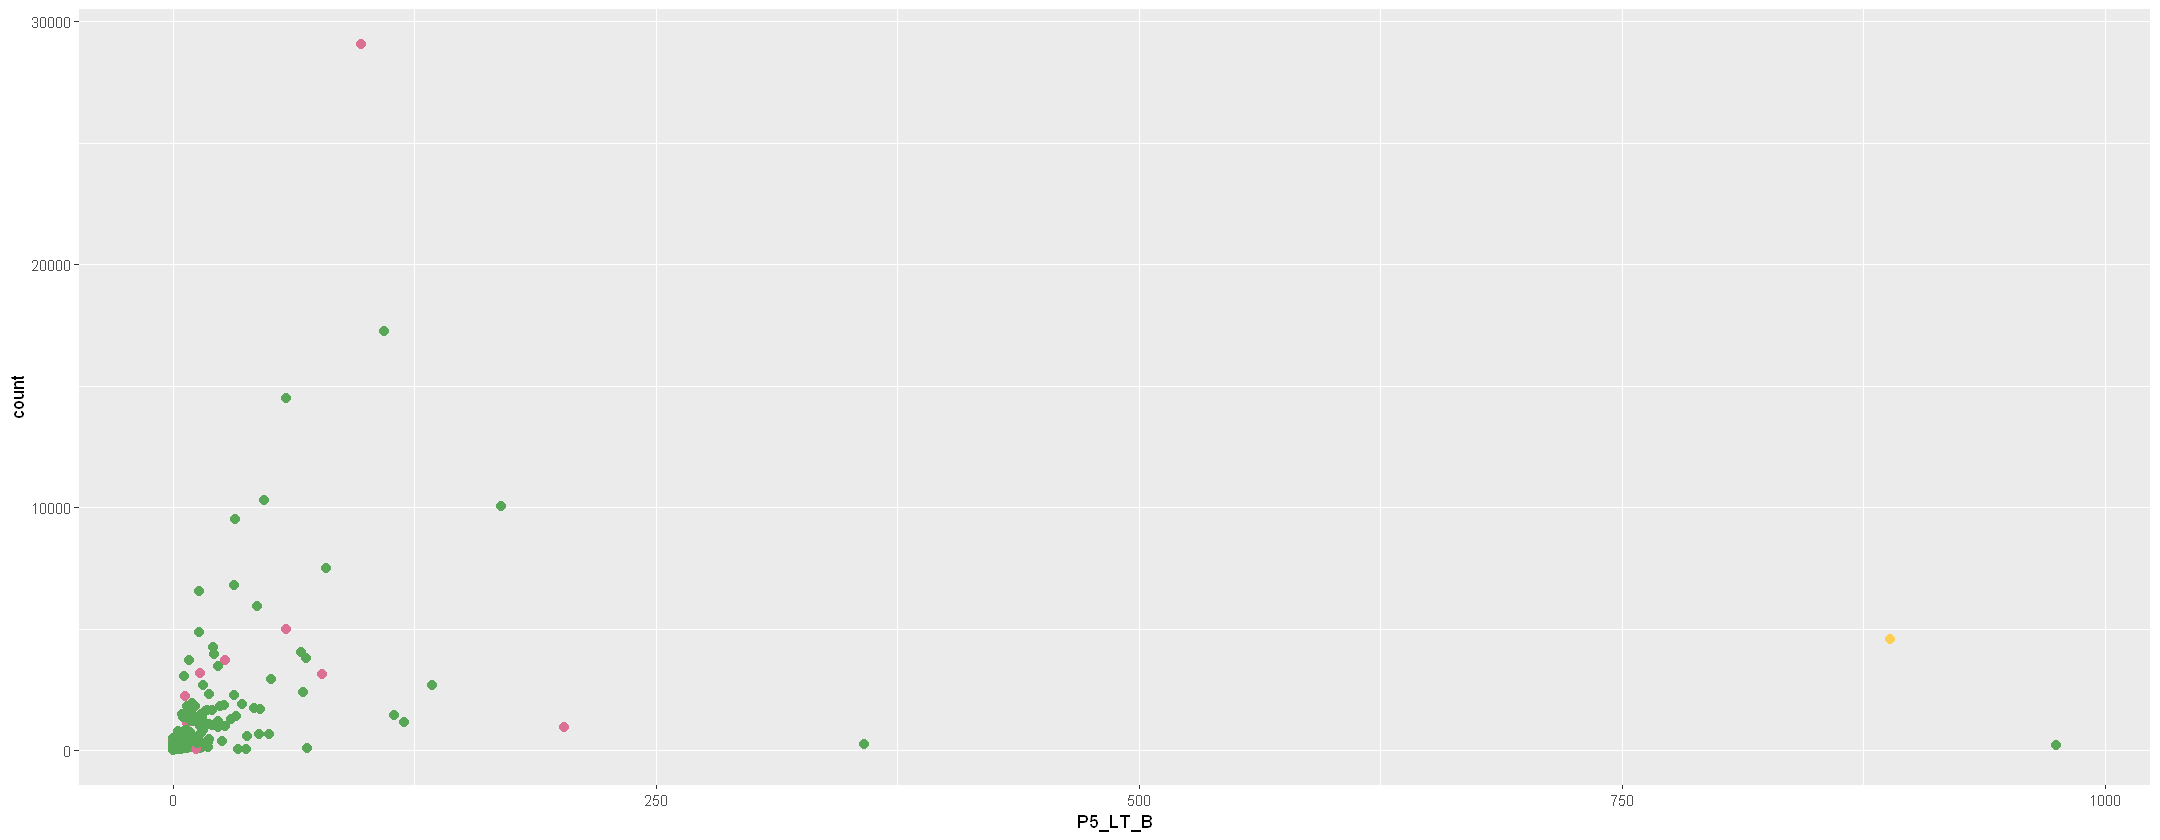

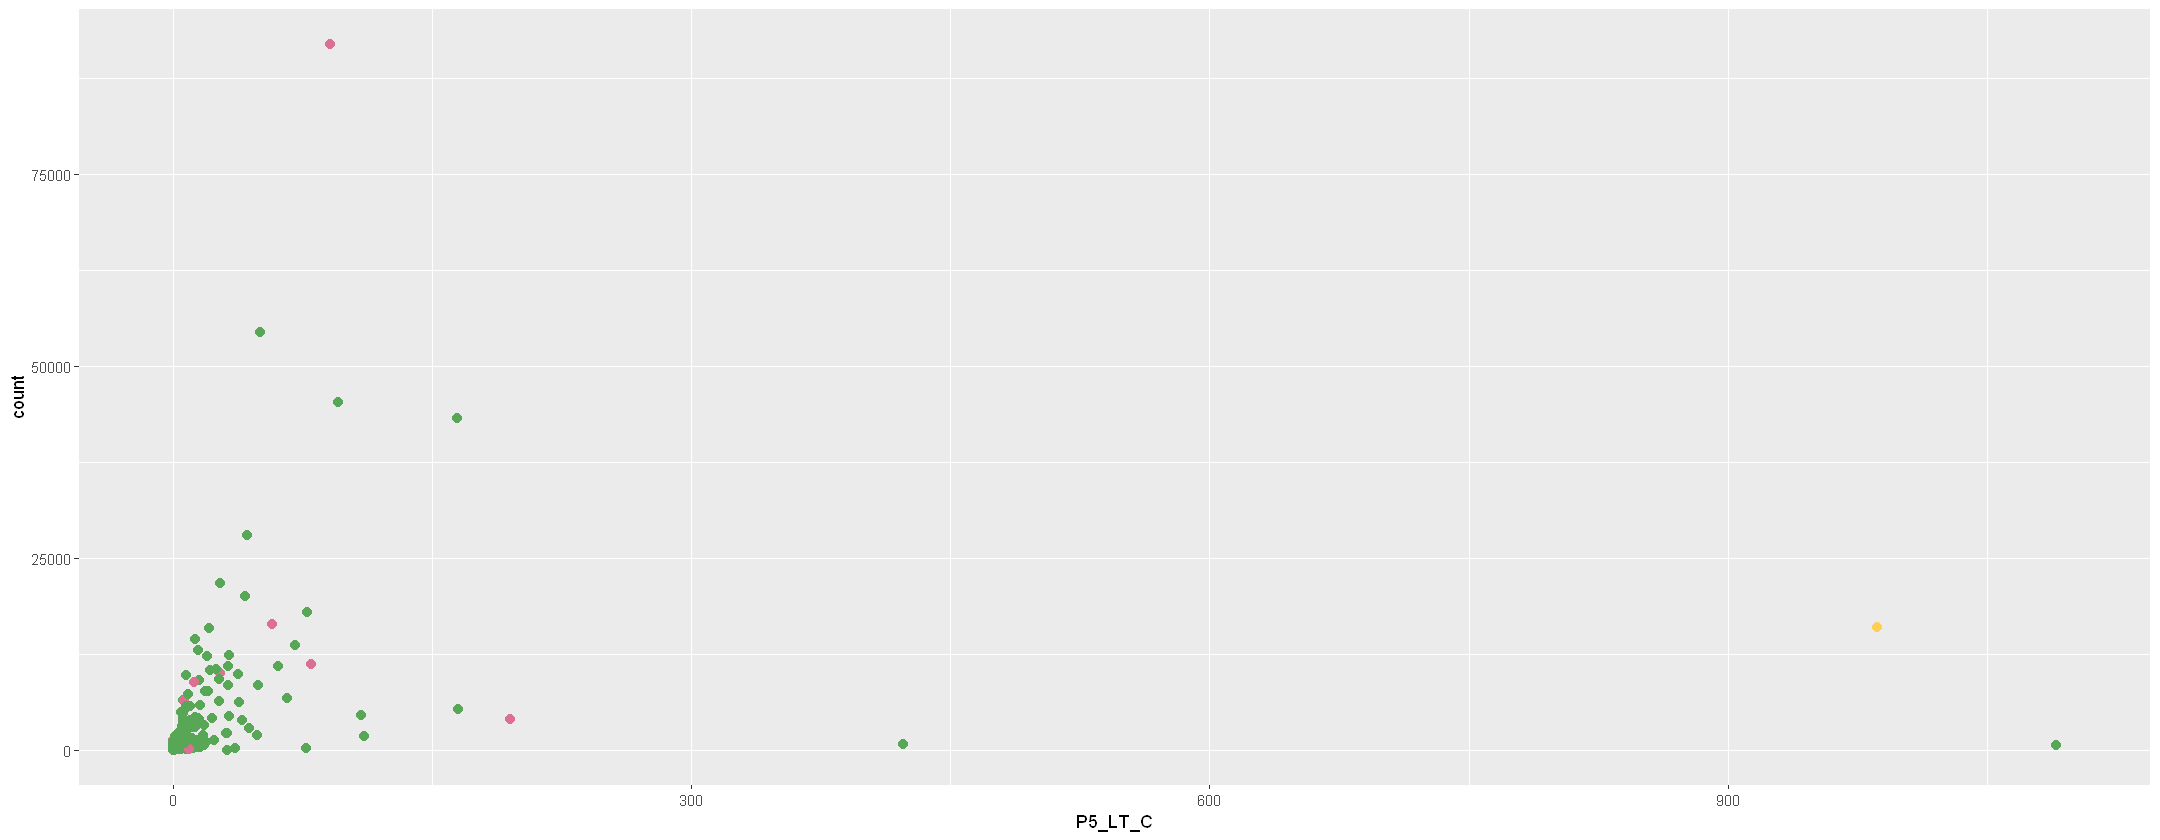

In [59]:
### Testing basal ROI
#####################

ROI_21B <- as.data.frame(t(read.csv("ROI_21B.csv", header=FALSE)))

ROI_21B <- ROI_21B[-1,]
colnames(ROI_21B) <- c("gene", "count")
rownames(ROI_21B) <- NULL
ROI_21B$count <- as.numeric(ROI_21B$count)

paragon_ROI_21B <- merge(paragon_panel, ROI_21B)

# dim(paragon_ROI_21B)
# head(paragon_ROI_21B)

cor.test(paragon_ROI_21B$P5_LT_B, paragon_ROI_21B$count)
cor.test(paragon_ROI_21B$P5_LT_B, paragon_ROI_21B$count, method="spearman")

ggplot(paragon_ROI_21B, aes(x=P5_LT_B, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

##############################################################################################################

### Testing central ROI
#######################

ROI_21C <- as.data.frame(t(read.csv("ROI_21C.csv", header=FALSE)))

ROI_21C <- ROI_21C[-1,]
colnames(ROI_21C) <- c("gene", "count")
rownames(ROI_21C) <- NULL
ROI_21C$count <- as.numeric(ROI_21C$count)

paragon_ROI_21C <- merge(paragon_panel, ROI_21C)

# dim(paragon_ROI_21C)
# head(paragon_ROI_21C)

cor.test(paragon_ROI_21C$P5_LT_C, paragon_ROI_21C$count)
cor.test(paragon_ROI_21C$P5_LT_C, paragon_ROI_21C$count, method="spearman")

ggplot(paragon_ROI_21C, aes(x=P5_LT_C, y=count, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

# Testing TPM correlations
I noticed that when I accidentally correlated VizGen LP samples against microdissected EDR samples the correlation was more or less the same as when I did the correct comparison. This worried me so I thought I'd check how the various microdissected samples correlate with each other. Given that these are generally very high between stages I'm more happy that the above result is expected.


	Pearson's product-moment correlation

data:  paragon_panel$P8_LDR_B and paragon_panel$P8_EDR_B
t = 129.45, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9922648 0.9955679
sample estimates:
      cor 
0.9941441 


Warning message in cor.test.default(paragon_panel$P8_LDR_B, paragon_panel$P8_EDR_B, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_LDR_B and paragon_panel$P8_EDR_B
S = 36902, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.972323 



	Pearson's product-moment correlation

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_EDR_C
t = 160.24, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9949347 0.9970993
sample estimates:
      cor 
0.9961666 


Warning message in cor.test.default(paragon_panel$P8_LDR_C, paragon_panel$P8_EDR_C, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_EDR_C
S = 35625, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9732804 


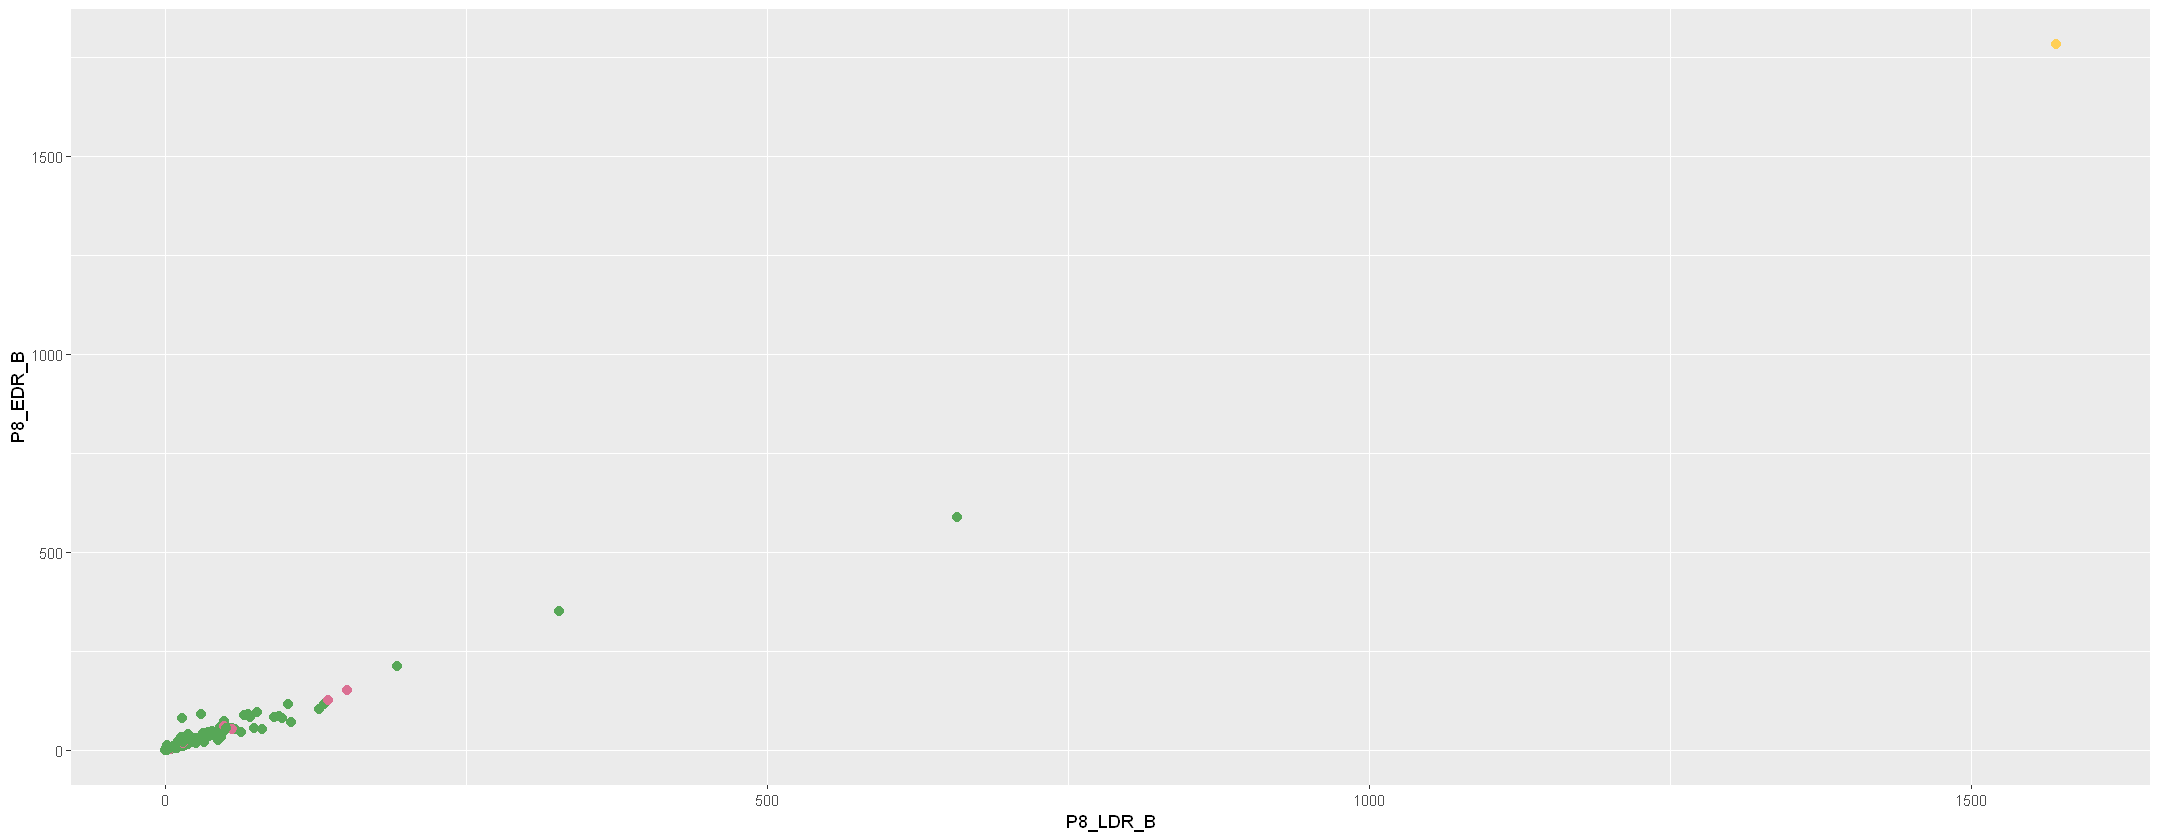

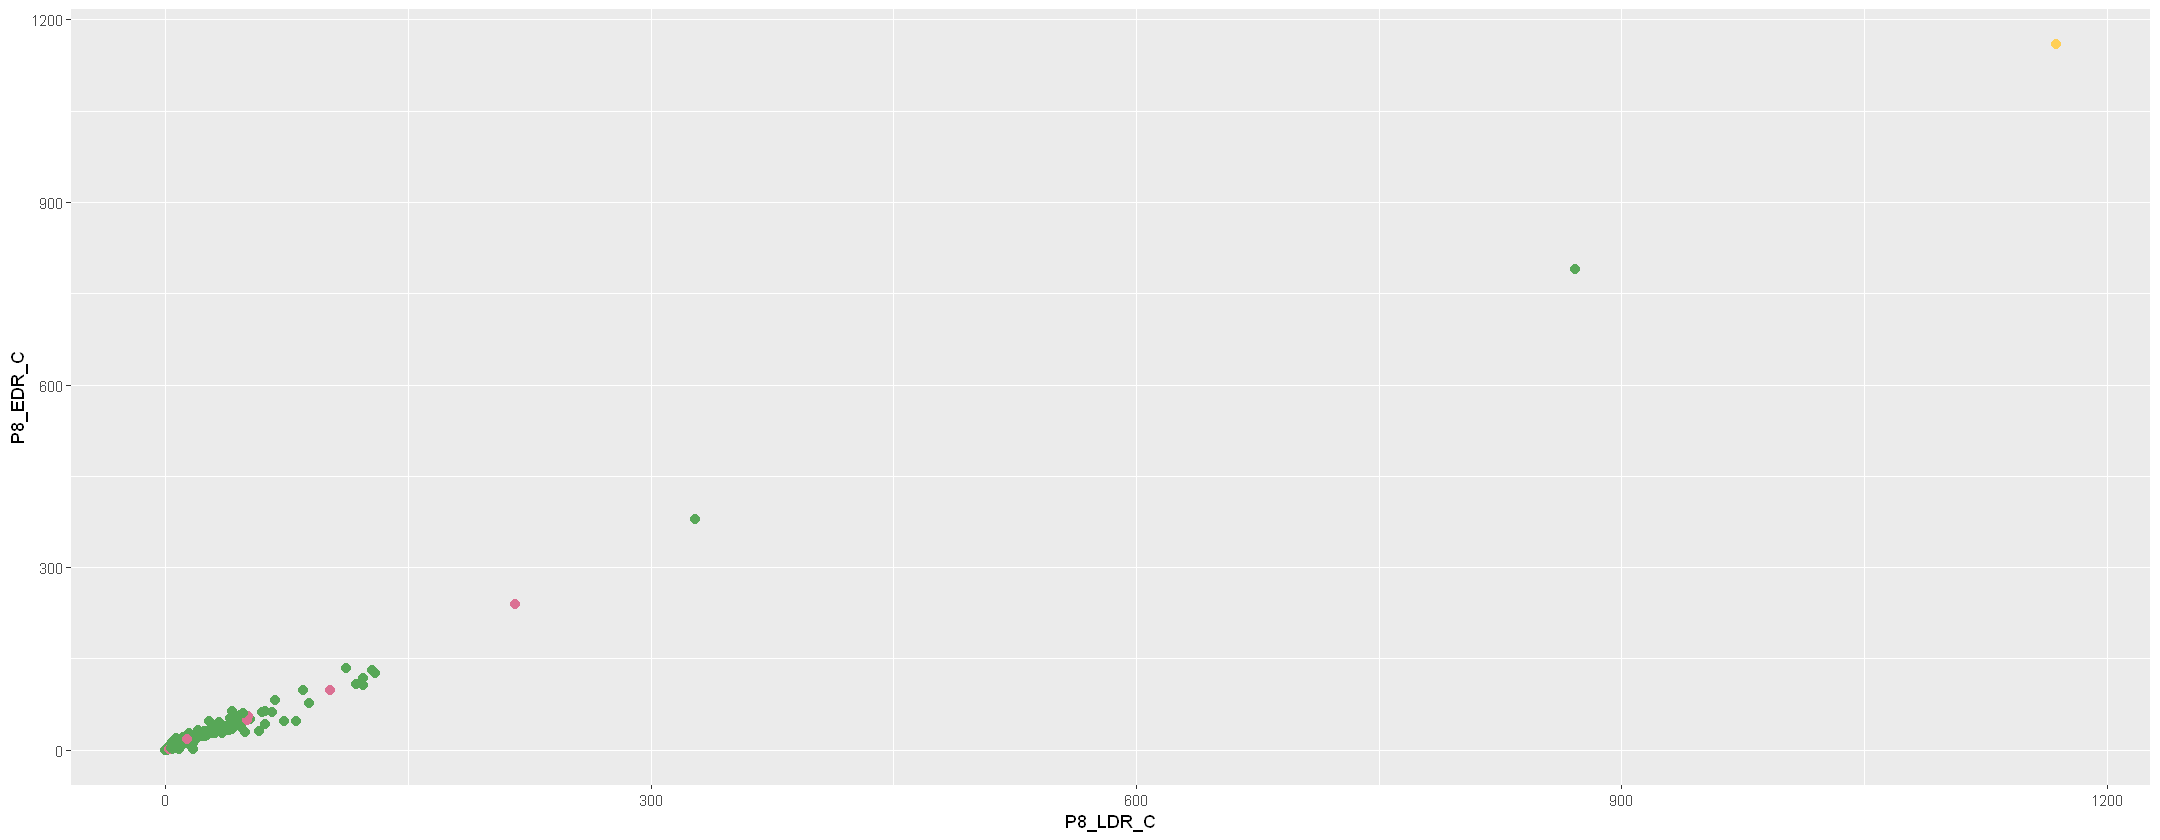

In [44]:
### Basal EDR vs basal LDR
cor.test(paragon_panel$P8_LDR_B, paragon_panel$P8_EDR_B)
cor.test(paragon_panel$P8_LDR_B, paragon_panel$P8_EDR_B, method="spearman")

ggplot(paragon_panel, aes(x=P8_LDR_B, y=P8_EDR_B, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

### Central EDR vs central LDR
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_EDR_C)
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_EDR_C, method="spearman")

ggplot(paragon_panel, aes(x=P8_LDR_C, y=P8_EDR_C, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")


	Pearson's product-moment correlation

data:  paragon_panel$P8_EDR_C and paragon_panel$P8_EDR_B
t = 42.357, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9331240 0.9611896
sample estimates:
      cor 
0.9490044 


Warning message in cor.test.default(paragon_panel$P8_EDR_C, paragon_panel$P8_EDR_B, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_EDR_C and paragon_panel$P8_EDR_B
S = 106632, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9200242 



	Pearson's product-moment correlation

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_LDR_B
t = 52.755, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9555791 0.9743462
sample estimates:
      cor 
0.9662205 


Warning message in cor.test.default(paragon_panel$P8_LDR_C, paragon_panel$P8_LDR_B, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_LDR_B
S = 73749, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9446871 


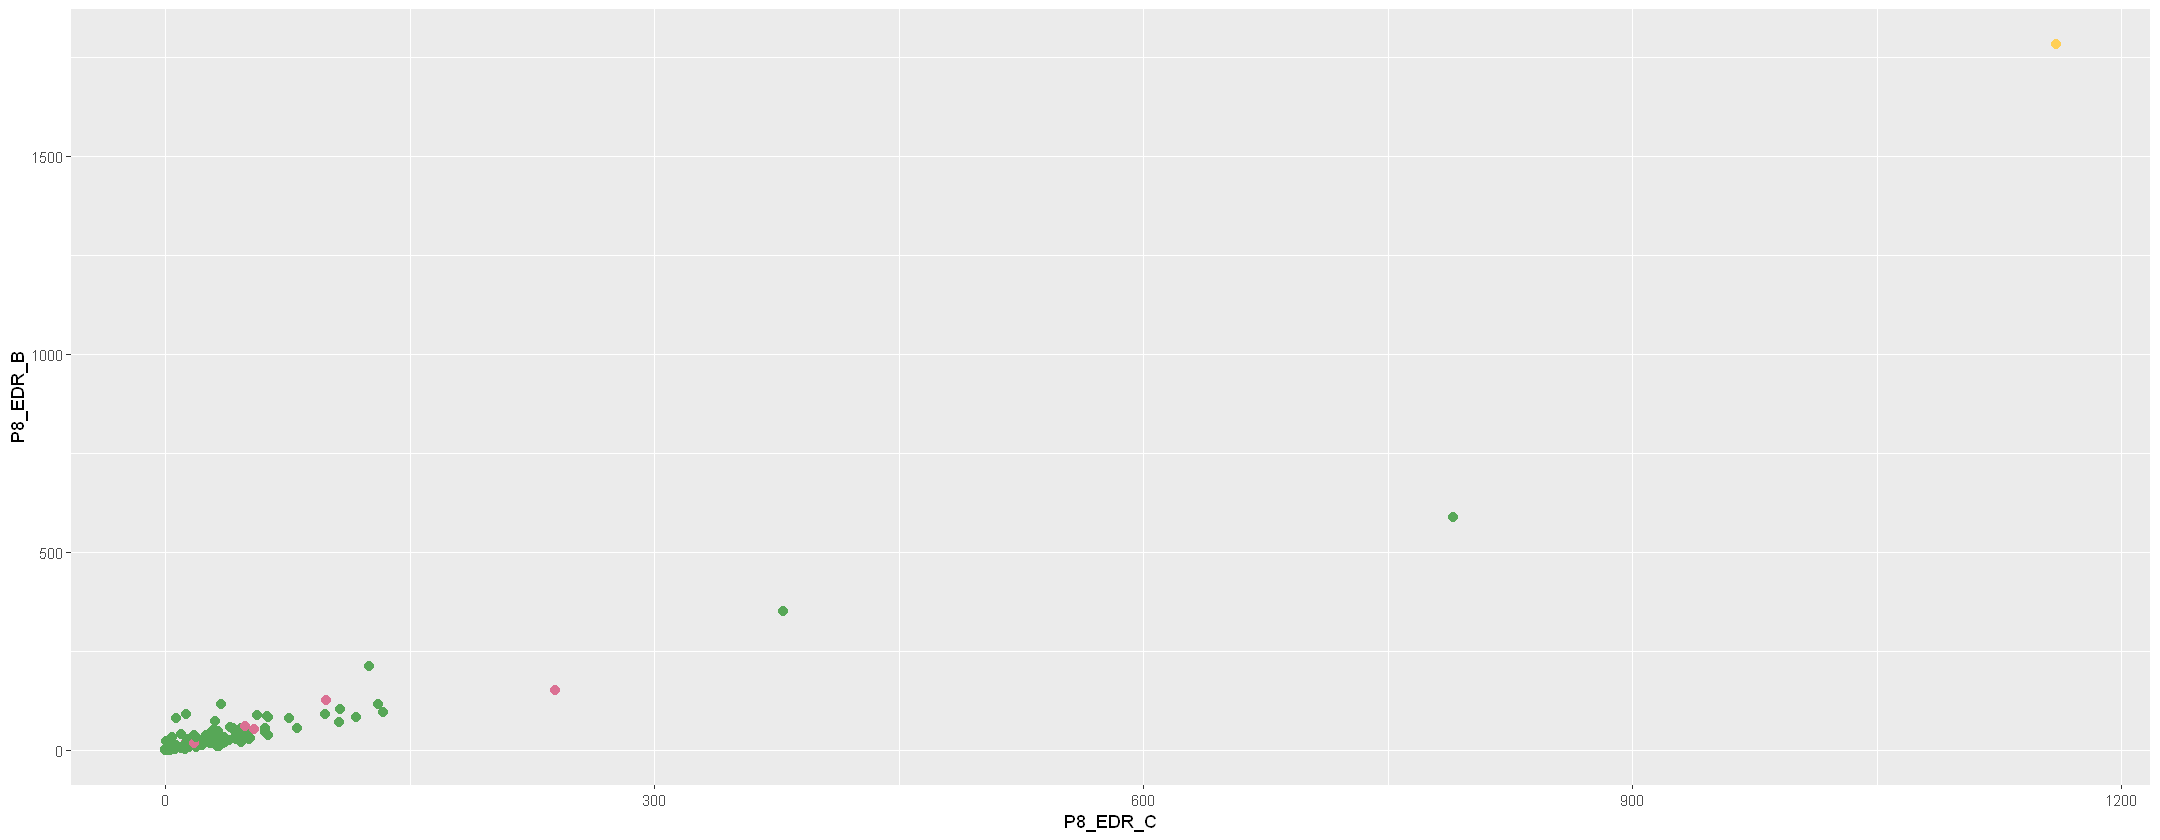

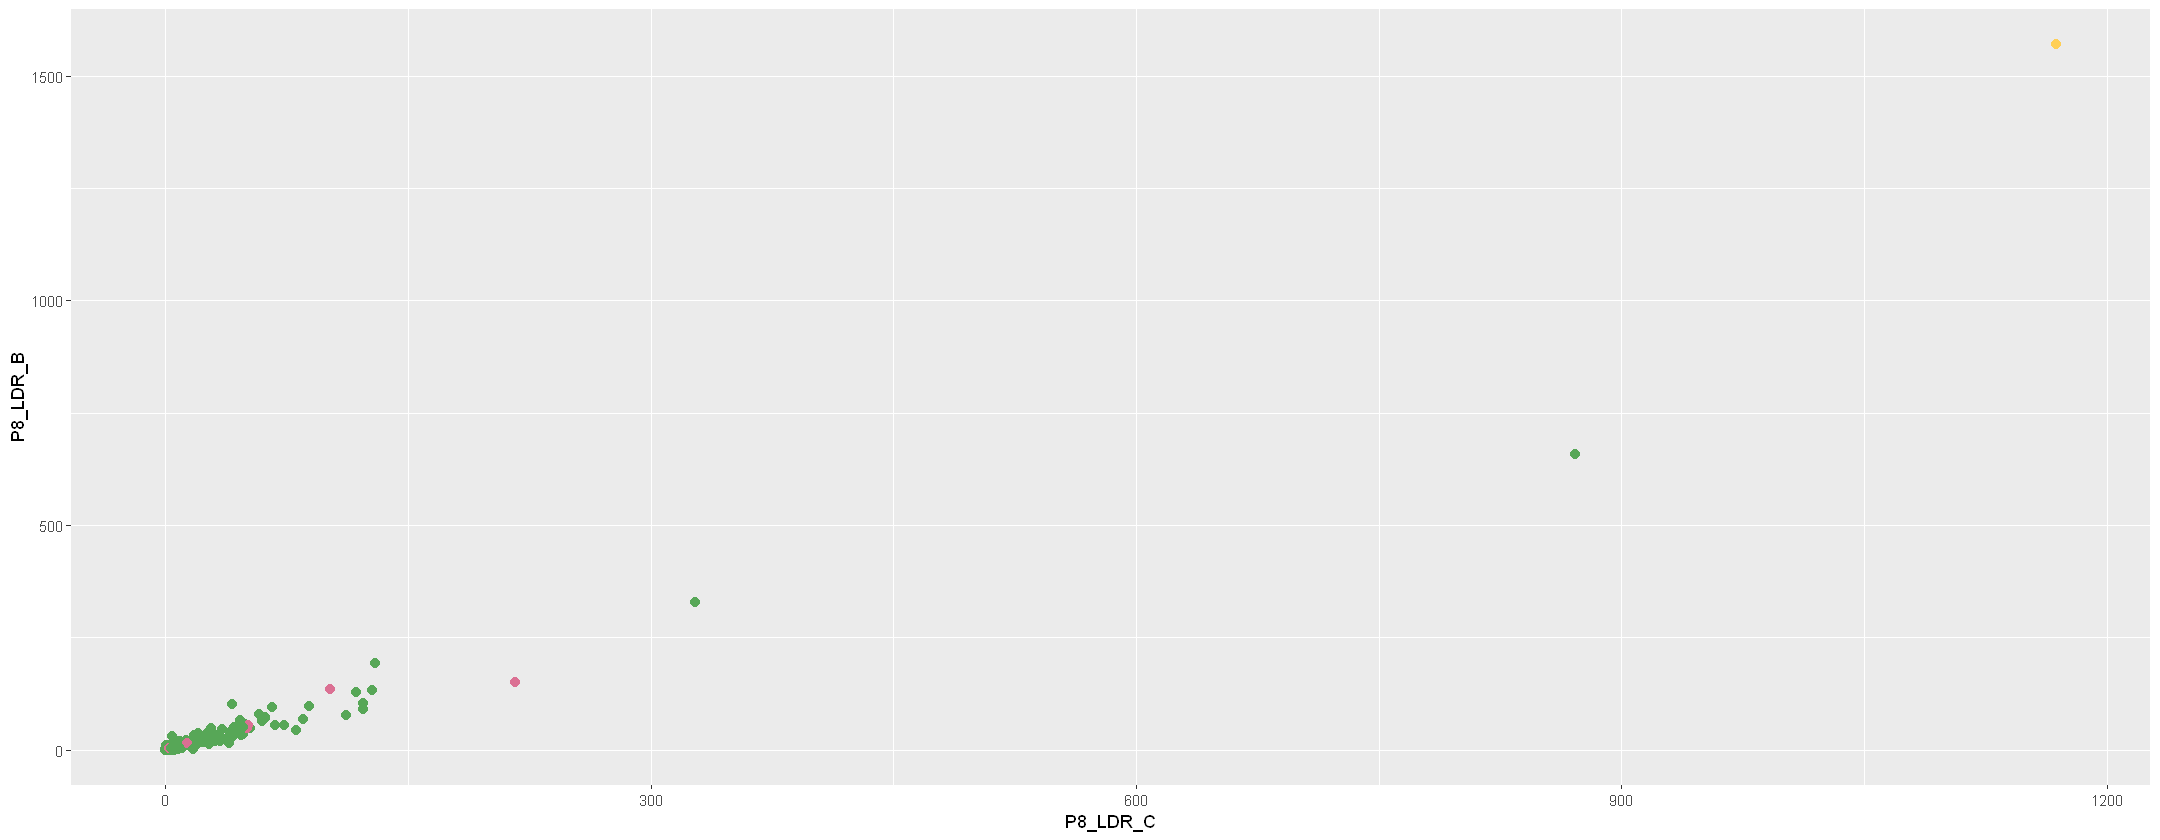

In [45]:
### Central EDR vs basal EDR
cor.test(paragon_panel$P8_EDR_C, paragon_panel$P8_EDR_B)
cor.test(paragon_panel$P8_EDR_C, paragon_panel$P8_EDR_B, method="spearman")

ggplot(paragon_panel, aes(x=P8_EDR_C, y=P8_EDR_B, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

### Central LDR vs basal LDR
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_LDR_B)
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_LDR_B, method="spearman")

ggplot(paragon_panel, aes(x=P8_LDR_C, y=P8_LDR_B, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")


	Pearson's product-moment correlation

data:  paragon_panel$P8_LDR_B and paragon_panel$P8_LP_B
t = 93.223, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9852175 0.9915171
sample estimates:
      cor 
0.9887994 


Warning message in cor.test.default(paragon_panel$P8_LDR_B, paragon_panel$P8_LP_B, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_LDR_B and paragon_panel$P8_LP_B
S = 74961, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9437775 



	Pearson's product-moment correlation

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_LP_C
t = 65.962, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9710080 0.9833122
sample estimates:
      cor 
0.9779948 


Warning message in cor.test.default(paragon_panel$P8_LDR_C, paragon_panel$P8_LP_C, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  paragon_panel$P8_LDR_C and paragon_panel$P8_LP_C
S = 129580, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9028126 


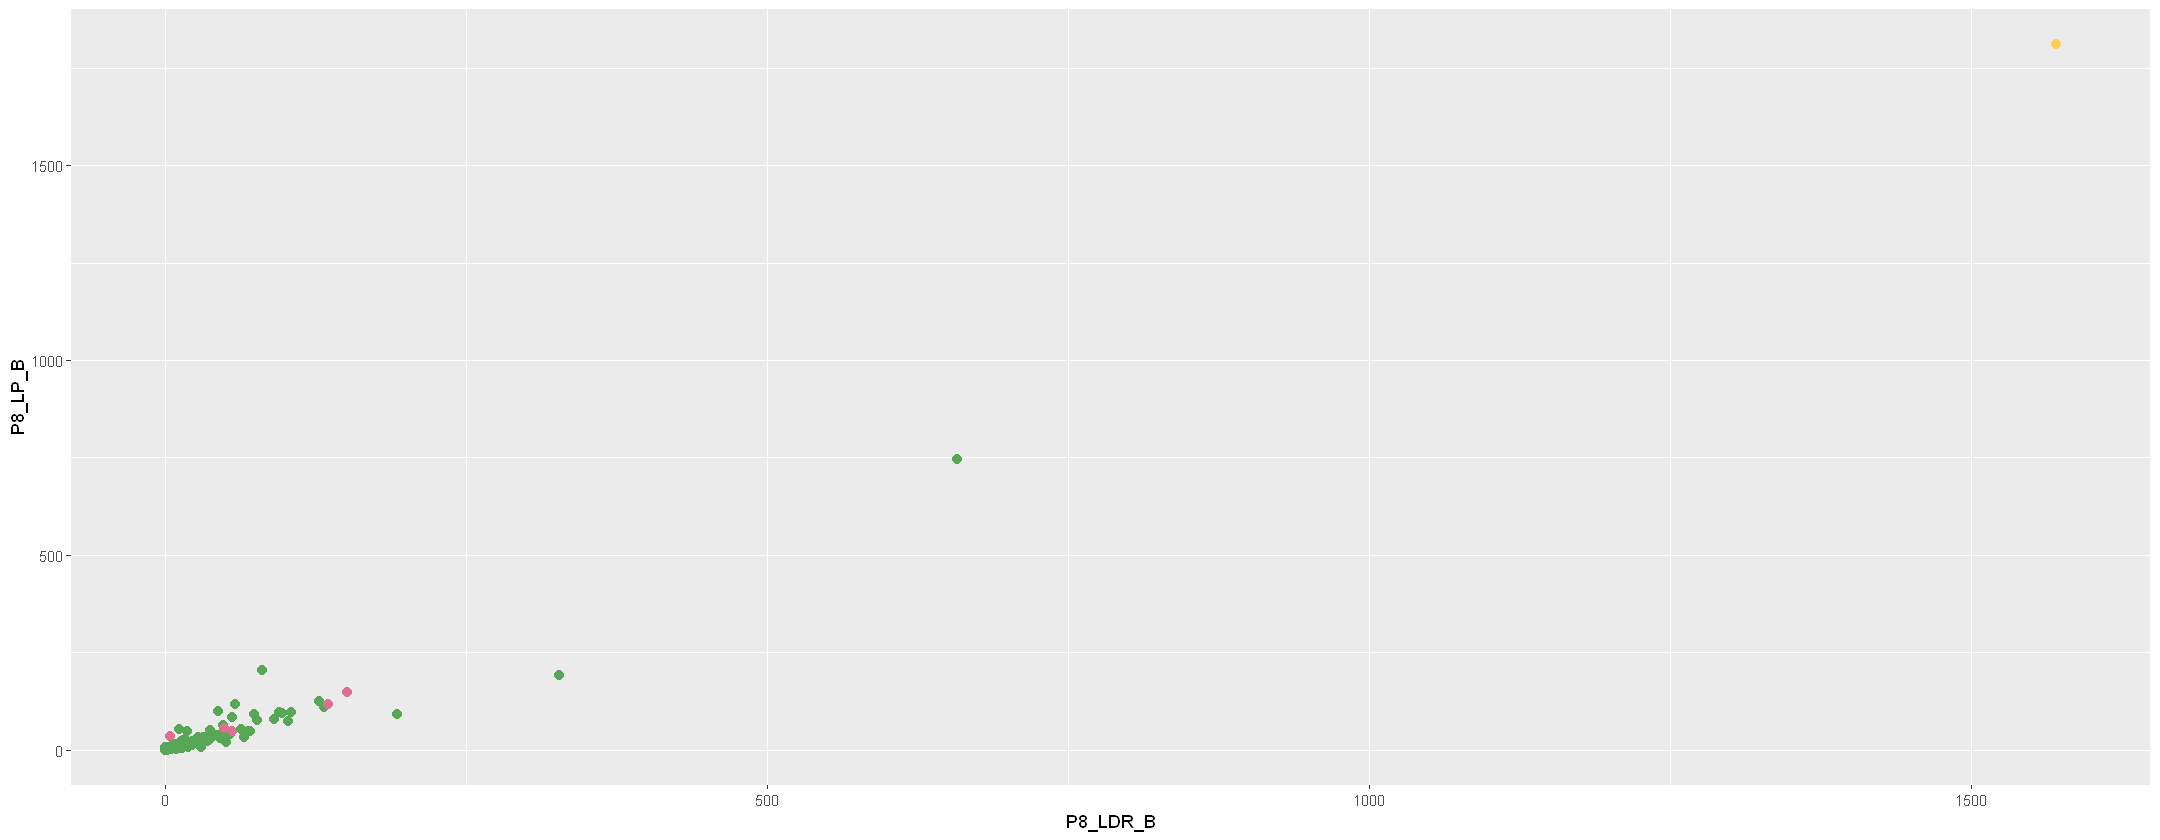

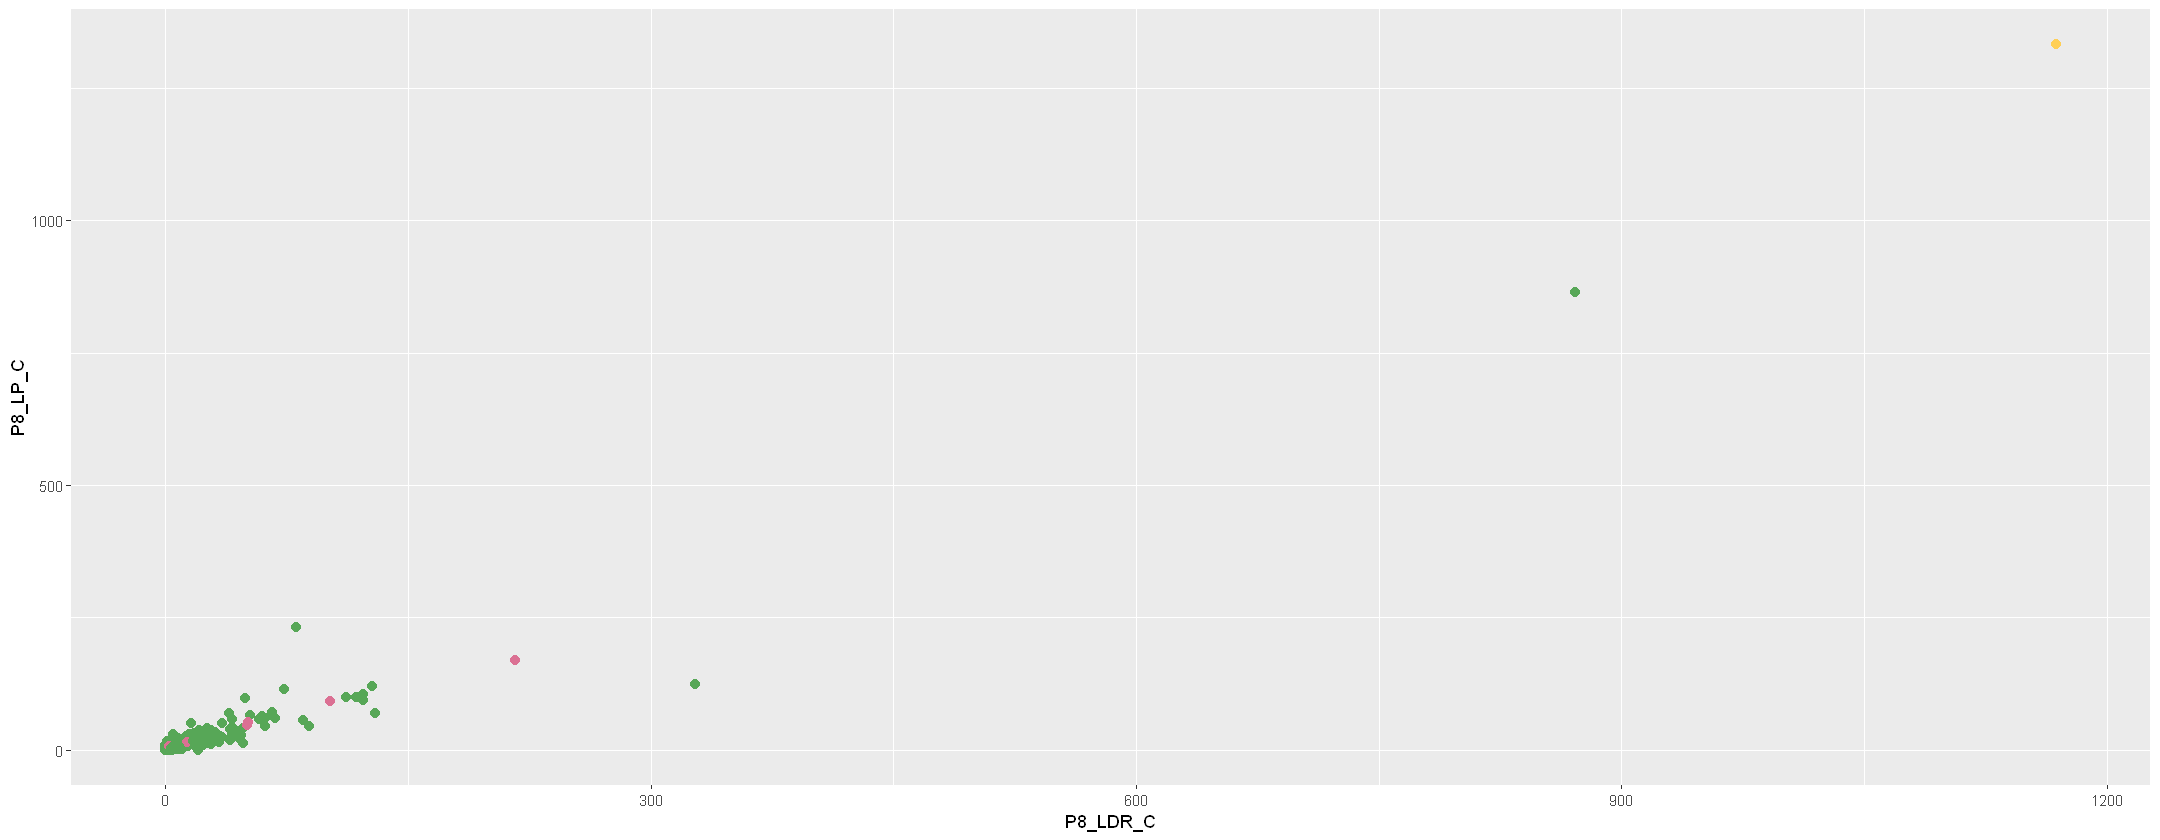

In [46]:
### Basal LDR vs basal LP
cor.test(paragon_panel$P8_LDR_B, paragon_panel$P8_LP_B)
cor.test(paragon_panel$P8_LDR_B, paragon_panel$P8_LP_B, method="spearman")

ggplot(paragon_panel, aes(x=P8_LDR_B, y=P8_LP_B, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")

### Central LDR vs central LP
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_LP_C)
cor.test(paragon_panel$P8_LDR_C, paragon_panel$P8_LP_C, method="spearman")

ggplot(paragon_panel, aes(x=P8_LDR_C, y=P8_LP_C, colour=target_tissue)) +
        geom_point(size=2.5, shape=16) +
        scale_color_manual(values=colours) +
        theme(legend.position = "none")